In [ ]:
import time
runtime_start = time.time()

#**Intro**

Το dataset που θα χρησιμοποιηθεί έχει προέλθει από καμπάνια μίας Πορτογαλικής τράπεζας για την προώθηση ενός τραπεζικού προϊόντος. Η καμπάνια πραγματοποιήθηκε τηλεφωνικά και είχε ως στόχο οι χρήστες να ανοίξουν μια τραπεζική προθεσμιακή κατάθεση.


Το dataset που είναι διαθέσιμο στη σελίδα https://archive.ics.uci.edu/dataset/222/bank+marketing ,  περιέχει 16 attributes που αντιστοιχούν στα εξής στοιχεία του ατόμου:

**Προσωπικά στοιχεία**

age: Ηλικία

job : Είδος εργασίας

marital : Οικογενειακή κατάσταση

education : Μορφωτικό επίπεδο

default: Υπάρχει πιστωτική αθέτηση;

balance: Τραπεζικό υπόλοιπο

housing: Έχει στην ιδιοκτησία του σπίτι;

loan: Έχει λάβει προσωπικό δάνειο που αποπληρώνει;

**Στοιχεία σχετικά με την τελευταία επικοινωνία:**

contact: Μέσο που χρησιμοποιήθηκε στην τελευταία επικοινωνία

day: Ημέρα τελευταίας επικοινωνίας

month: Μήνας τελευταίας επικοινωνίας

duration: Διάρκεια τελευταίας επικοινωνίας σε δευτερόλεπτα

**Λοιπά στοιχεία:**

campaign: Αριθμός επικοινωνιών που έχουν πραγματοποιηθεί στην τρέχουσα καμπάνια

pdays: Αριθμός των ημερών που έχουν παρέλθει από την τελευταία επικοινωνία για την προώθηση της προηγούμενης καμπάνιας  (το 999 σημαίνει ότι δεν υπάρχει προγενέστερη επικοινωνία με τον πελάτη)

previous: Αριθμός επικοινωνιών που έχουν πραγματοποιηθεί στην προηγούμενη καμπάνια

poutcome: Αποτέλεσμα της προηγούμενης καμπάνιας

**Αποτέλεσμα:**

y: Ο πελάτης άνοιξε την τραπεζική προθεσμιακή κατάθεση

Το σενάριο που θα μελετηθεί είναι να εκπαιδευτεί ένα μοντέλο μηχανικής μάθησης στα δεδομένα αυτά, ώστε να προβλέπει ποιός πελάτης είναι πιθανό να ανοίξει μια νέα προθεσμιακή κατάθεση και θα εξεταστεί αν το μοντέλο περιέχει κάποιο είδος bias. Εφόσον αποδεχτεί αυτό, θα γίνει εξάλειψη του bias με διαφορετικούς τρόπους για να αναδειχθεί η πιό αποτελεσματική προσέγγιση για την μείωση του bias σε σχέση με την απόδοση του αλγορίθμου.

Για την απόδοση του μοντέλου θα χρησιμοποιηθουν οι μετρικές:


*   Balanced accuracy
*   Accuracy

ενώ για την μέτρηση του bias οι μετρικές:


*   Disparate impact (DI)
*   Statistical parity difference (SPD)
*   Average odds difference (AOD)
*   Equal opportunity difference(EOD)
*   Theil index


Σε κάθε πρόβλημα η μετρική που θα χρησιμοποιηθεί για την μέτρηση του bias καθώς και τα όρια των τιμών του που θα υποδηλώνουν fairness ή μη , αποτελούν ζητούμενο ως domain expert.

Για τις ανάγκες που τρέχουσας εργασίας θα υπολογίζονται και οι πέντε μετρικές κάθε φορά και ως όρια των τιμών τους, θα χρησιμοποιηθούν τα όρια που έχουν ορισθεί στη web demo version του AIF360 (https://aif360.mybluemix.net/).

Για τις μετρικές Statistical parity difference, Average odds difference και Equal opportunity difference  η βέλτιστη τιμή θα είναι το 0.0 . Μια τιμή < 0 θα υποδηλώνει ότι υπάρχει μεροληψία υπέρ του privileged group, ενώ μια τιμή >0 θα υποδηλώνει ότι υπάρχει μεροληψία υπέρ του unprivileged group. Η ύπαρξη Fairness θα υφίσταται όταν η τιμή τους  είναι μεταξύ -0.1 και 0.1.

Για την μετρική Theil index η τιμή 0 θα αποτελεί την τιμή για το μέγιστο fairness. Όταν η τιμή της θα ξεπεράσει το 0.25 τότε θα υπάρχει bias.

Για την μετρική Disparate impact βέλτιστη τιμή θα είναι το 1.0 . Μια τιμή < 1 θα υποδηλώνει ότι υπάρχει μεροληψία υπέρ του privileged group, ενώ μια τιμή >1 θα υποδηλώνει ότι υπάρχει μεροληψία υπέρ του unprivileged group. Η ύπαρξη Fairness σύμφωνα με αυτή την μετρική υπάρχει όταν η τιμή της είναι μεταξύ 0.8 and 1.20 .


# **Install AIF360 and Import all the required libraries**

Αρχικά θα γίνει εγκατάσταση του AIF360 καθώς και τον απαραίτητων βιβλιοθηκών

In [ ]:
!pip install aif360

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import aif360
import numpy as np
import pandas as pd
# import lime
# import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from IPython.display import Markdown, display
from tqdm import tqdm
from aif360.metrics import ClassificationMetric
from aif360.datasets import BinaryLabelDataset
from aif360.metrics.binary_label_dataset_metric import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult
from aif360.algorithms.preprocessing.reweighing import Reweighing
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.algorithms.preprocessing.lfr import LFR
from aif360.datasets.lime_encoder import LimeEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import sklearn.model_selection
import sklearn.metrics
import sklearn.datasets
import sklearn.ensemble
import sklearn.preprocessing
from matplotlib.ticker import FormatStrFormatter

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


# **Functions**

Ο υπολογισμός των διαφόρων μετρικών καθώς η δημιουργία γραφημάτων θα γίνεται με την βοήθεια των κάτωθι συναρτήσεων

In [ ]:
metrics=['Balanced accuracy', 'Accuracy' ,'Disparate impact' , 'Statistical parity difference','Average odds difference', 'Equal opportunity difference', 'Theil index']

bounds = {'Disparate impact': ([0.8,1.2]),
          'Statistical parity difference':([-0.1,0.1]),
          'Average odds difference': ([-0.1,0.1]),
          'Equal opportunity difference':([-0.1,0.1]),
          'Theil index':([0,0.25])}



# Υπολογίζει και επιστρέφει ως OrderedDict τις τιμές των metrics
# Παρέχεται από το AIF360 ως έτοιμη συνάρτηση
# και χρησιμοποιείται ευρέως από τους χρήστες του συγκεκριμένου framework
# Υπήρξε πρόβλημα όταν καλούνταν με την μέθοδο import,
# και για την απόδοση του μοντέλου  υπολόγιζε μόνο την μετρική Balanced accuracy.
# Για την αποφυγή του σκοπέλου έγινε η αντιγραφή του κώδικα στο notebook και τροποποιήθηκε κατάλληλα ώστε να υπολογίζει και την μετρική accuracy.
# https://github.com/Trusted-AI/AIF360/blob/master/examples/common_utils.py
def compute_metrics(dataset_true, dataset_pred,
                    unprivileged_groups, privileged_groups,
                    disp = True):
    classified_metric_pred = ClassificationMetric(dataset_true,
                                                 dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    metrics_dict = OrderedDict()
    metrics_dict[metrics[0]] = 0.5*(classified_metric_pred.true_positive_rate()+
                                             classified_metric_pred.true_negative_rate())
    metrics_dict[metrics[1]] = classified_metric_pred.accuracy()
    metrics_dict[metrics[2]] = classified_metric_pred.disparate_impact()
    metrics_dict[metrics[3]] = classified_metric_pred.statistical_parity_difference()
    metrics_dict[metrics[4]] = classified_metric_pred.average_odds_difference()
    metrics_dict[metrics[5]] = classified_metric_pred.equal_opportunity_difference()
    metrics_dict[metrics[6]] = classified_metric_pred.theil_index()


    if disp:
        for k in metrics_dict:
            print("%s = %.4f" % (k, metrics_dict[k]))
    return metrics_dict


# Παρουσιάζει με bar plot την τιμή του κάθε metric
# αρχικά και μετά την εφαρμογή της μεθόδου για την μείωση του bias.
# Επιπλέον στα bias metrics εμφανίζει και τα fairness bounds για το κάθε metric.
# Στο τέλος εμφανίζει και υπολογίζει πόσα bias metrics είναι εκτός των ορίων του fairness
# και το πόσο έχει μεταβληθεί η Balanced accuracy
def barplot_metrics(metrics_orig, metrics_pred, method):
    fig, ax = plt.subplots(figsize = (20,4), layout="constrained")

    fig.suptitle("Bias mitigation with "+method, fontsize=30 )

    color = ['#A3A3A8', '#7eb54e']
    name = ['Original', 'Migrated']

    xlabel_font_size=10

    for i in range(0,len(metrics)):
       plt.subplot(1, len(metrics), i+1)
       metric_var = metrics[i]
       value = [metrics_orig[i], metrics_pred[i]]
       plt.bar(name, value, color=color )
       plt.xlabel(metric_var, fontsize = xlabel_font_size)
       plt.text(0, value[0] , round(value[0], 3) , fontsize=10, ha='center')
       plt.text(1, value[1] , round(value[1], 3) , fontsize=10, ha='center')
       if i > 1:
         plt.axhline(0, color='k', linestyle='-')
         plt.axhline(bounds[metric_var][0], color='r', linestyle=':')
         plt.axhline(bounds[metric_var][1], color='r', linestyle=':')

    plt.show()

    display(Markdown("#### For method %s :" % method ))
    check = [bounds[metrics[i]][0] < metrics_pred[i] < bounds[metrics[i]][1] for i in range(2,7)]
    display(Markdown("Bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))
    display(Markdown("Balanced accuracy variation **%.3f** "%(metrics_pred[0] - metrics_orig[0])))


# Παρουσιάζει ένα ξεχωριστό διάγραμμα για την εξέλιξη της τιμής του bias metric
# σε σχέση με την τιμή της Balanced accuracy
def plot_metric(thresh_arr, thresh_nam, thresh_arr_best_ind , acc_arr, acc_nam, metric_arr, metric_nam ):



  fig, ax1 = plt.subplots(figsize=(10,7))
  ax1.plot(thresh_arr, acc_arr, color='r')
  ax1.set_xlabel(thresh_nam, fontsize=16, fontweight='bold')
  ax1.set_ylabel(acc_nam, color='r', fontsize=16, fontweight='bold')
  ax1.xaxis.set_tick_params(labelsize=14)
  ax1.yaxis.set_tick_params(labelsize=14)


  ax2 = ax1.twinx()
  ax2.plot(thresh_arr, np.array(metric_arr), color='b')
  ax2.set_ylabel(metric_nam, color='b', fontsize=16, fontweight='bold')
  ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind],
              color='k', linestyle=':')
  ax2.yaxis.set_tick_params(labelsize=14)
  ax2.axhline(0, color='k', linestyle='-')
  ax2.axhline(bounds[metric_nam][0], color='r', linestyle=':')
  ax2.axhline(bounds[metric_nam][1], color='r', linestyle=':')
  ax2.grid(True)




# Παρουσιάζει ένα συγκεντρωτικό  διάγραμμα για την εξέλιξη της τιμής όλων των  bias metrics
# σε σχέση με την τιμή της Balanced accuracy
# Για να επιτευχθεί καλύτερη απεικόνιση των μετρικών, οι τιμές της μετρικής Disparate impact έχουν μειωθεί κατά 1 ( x = x-1 )
# και συνεπώς η βέλτιστη τιμή της είναι 0.0
def plot_all_metrics(stat_par_arr, avg_odds_arr, eq_opp_arr, disp_imp_arr, theil_ind_arr, acc_arr, thresh_arr, thresh_arr_best_ind, x_min, x_max, x_points, threshold_name ):

    r = []
    for i in np.linspace(x_min, x_max, x_points):
      r.append(int(i))

    disp_imp_arr0 = [i - 1 for i in disp_imp_arr]

    metrics_plot = {'statistical parity': ('x', stat_par_arr, 'g'), 'average odds difference': ('o', avg_odds_arr, 'y'),\
              'equal opportunity': ('s', eq_opp_arr, "b" ), 'disparate impact': ('p', disp_imp_arr0, 'm'),\
              'theil index': ('*', theil_ind_arr, 'c')}




    display(Markdown("### Plot of balanced accuracy and output fairness vs %s" % threshold_name))

    display(Markdown("#### The graph illustrates the affect on fairness metrics for various values of %s" % threshold_name))
    title = 'Accuracy and bias metrics vs  ' + threshold_name

    fig, ax1 = plt.subplots(figsize=(15,8))
    ax1.plot(thresh_arr, acc_arr, color='r')
    ax1.set_title(title, fontsize=16, fontweight='bold')
    ax1.set_xlabel(threshold_name, fontsize=16, fontweight='bold')
    ax1.set_ylabel('Balanced accuracy', color='r', fontsize=16, fontweight='bold')
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)


    for i in r:
        label = "{:.3f}".format(acc_arr[i])

        plt.annotate(label,
                    (i, acc_arr[i],),
                    textcoords="offset points",
                    xytext=(0,-18),
                    ha='center')

    ax2 = ax1.twinx()
    ax2.plot(thresh_arr,  stat_par_arr, color='g')
    ax2.plot(thresh_arr,  eq_opp_arr, color='b')
    ax2.plot(thresh_arr,  avg_odds_arr, color='y')
    ax2.plot(thresh_arr,  disp_imp_arr0, color='m')
    ax2.plot(thresh_arr,  theil_ind_arr, color='c')
    i = 0
    for metric in metrics_plot:
        for m in metrics_plot[metric][1]:
            if i in r:
                plt.plot(thresh_arr[i], m, marker=metrics_plot[metric][0], color=metrics_plot[metric][2]  , label=metric if i == 1 else "")
                if i == 0:
                    plt.text(thresh_arr[i] * (1 + 0.01), m * (1 + 0.3) , round(m, 3), fontsize=12)
                else:
                    plt.text(thresh_arr[i] * (1 + 0.01), m * (1 + 0.01) , round(m, 3), fontsize=12)
                plt.legend( bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0 )
            i = i + 1
        i = 0
    ax2.set_ylabel('closer to 0 is better', color='b', fontsize=16, fontweight='bold')
    ax2.yaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    plt.rcParams.update({'font.size': 12})
    plt.legend()
    yabs_max = abs(max(ax2.get_ylim(), key=abs))
    ax2.set_ylim(ymin=-yabs_max, ymax=yabs_max)
    ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], color='k', linestyle=':')
    ax2.grid(True)

#**Load & Examine Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Datasets/bank/'
df=pd.read_csv(path+'bank-full.csv', sep=';')

Mounted at /content/drive


##Missing Values##

To dataset έχει 45211 rows και από την ανάλυση του φαίνεται πως δεν περιέχει κενές τιμές. Παρατηρείται όμως ότι στα attributes job, education, contact και poutcome υπάρχει η τιμή ‘unknown’  όπου πιθανότατα είναι η τιμή που έχουν λάβει οι κενές τιμές.  Τα αντικείμενα που έχουν τιμή ‘unknown’ σε κάποιο από τα attributes θα παραμείνουν ως έχουν.

In [ ]:
for c in df.columns:
  display(Markdown("#### %s" % c))
  print(np.array(sorted(pd.unique(df[c]))))

#### age

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 94 95]


#### job

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


#### marital

['divorced' 'married' 'single']


#### education

['primary' 'secondary' 'tertiary' 'unknown']


#### default

['no' 'yes']


#### balance

[ -8019  -6847  -4057 ...  81204  98417 102127]


#### housing

['no' 'yes']


#### loan

['no' 'yes']


#### contact

['cellular' 'telephone' 'unknown']


#### day

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


#### month

['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


#### duration

[   0    1    2 ... 3785 3881 4918]


#### campaign

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 43 44 46 50 51 55 58 63]


#### pdays

[ -1   1   2   3   4   5   6   7   8   9  10  12  13  14  15  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 24

#### previous

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  32  35  37  38  40
  41  51  55  58 275]


#### poutcome

['failure' 'other' 'success' 'unknown']


#### y

['no' 'yes']


In [ ]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
df.describe(include = 'all')

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

##Calculate Dataset Statistics##

Από τον διαχωρισμό των αντικειμένων βάση του ‘y’ , φαίνεται πως το dataset είναι imbalanced .

Από τις συνολικά 45211 εγγραφές οι 39922 (88,30%) έχουν τιμή ‘no’ και υπόλοιπες 5289 (11,70%) έχουν τιμή ‘yes’

In [ ]:
df_val = df["y"].value_counts()
df_val

no     39922
yes     5289
Name: y, dtype: int64

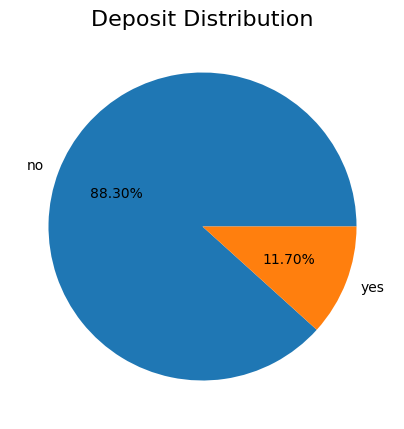

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(
    x=df_val,
    labels=['no', 'yes'],
    autopct='%1.2f%%',
    textprops={'fontsize':10},
    colors=['#1F77B4',"#FF7F0E"]
)
plt.title(
    label='Deposit Distribution',
    fontdict={"fontsize":16},
)
plt.show()

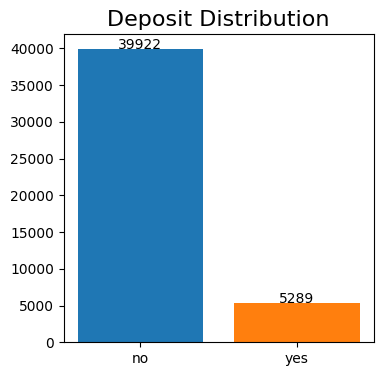

In [ ]:
plt.figure(figsize=(4,4))
plt.bar(
    x=['no', 'yes'],
    height=df_val,
    color=['#1F77B4',"#FF7F0E"]
)
plt.title(
    label='Deposit Distribution',
    fontdict={"fontsize":16},
)
plt.text(0,
         df_val[0] ,
         df_val[0] ,
         fontsize=10,
         ha='center')
plt.text(1,
         df_val[1] ,
         df_val[1] ,
         fontsize=10,
         ha='center')
plt.show()

In [ ]:
# Build a function to show categorical values disribution
def plot_bar_col(column):
    df_temp = pd.DataFrame()
    df_temp['Deposit_No'] = df[df['y'] == 'no'][column].value_counts()
    df_temp['Deposit_Yes'] = df[df['y'] == 'yes'][column].value_counts()
    df_temp.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

Για την κατανόηση του dataset θα γίνει η γραφική απεικόνιση κάποιων attributes σε σχέση με το αποτέλεσμα ‘y’

Απο τα διαγράμματα γίνεται φανερό πως το τραπεζικό ίδρυμα προσπάθησε να προσεγγίσει πελάτες οι οποίοι δεν είχαν λάβει κάποιο δάνειο (‘loan’) , ενώ τυχόν πιστωτική αθέτηση (‘default’) κατά το παρελθόν  αποτελούσε αρνητικό παράγοντα ακόμα και για την ύπαρξη επικοινωνίας. Επίσης διαπιστώνεται ότι το τραπεζικό Ίδρυμα προτιμούσε πελάτες όπου είχαν στην κατοχή τους σπίτι (‘housing’), αλλά εντούτοις οι πελάτες που έδειξαν μεγαλύτερο ενδιαφέρον για το προϊόν ήταν όσοι δεν είχαν σπίτι.

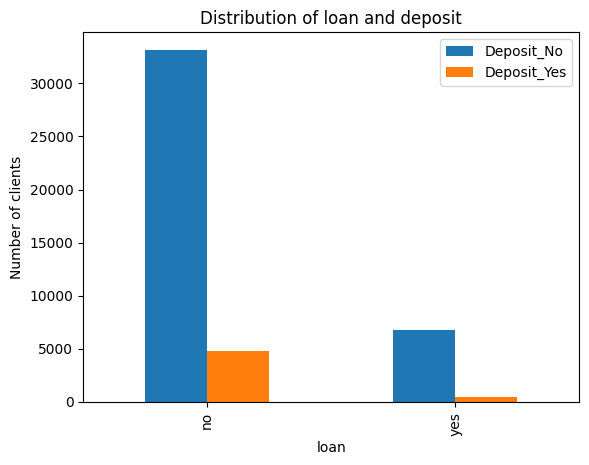

In [ ]:
plot_bar_col('loan')

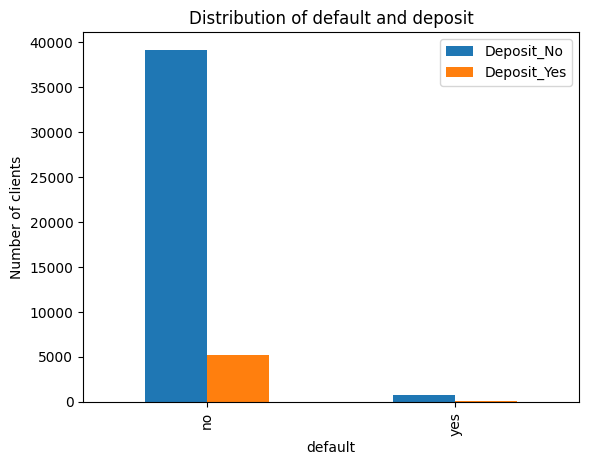

In [ ]:
plot_bar_col('default')

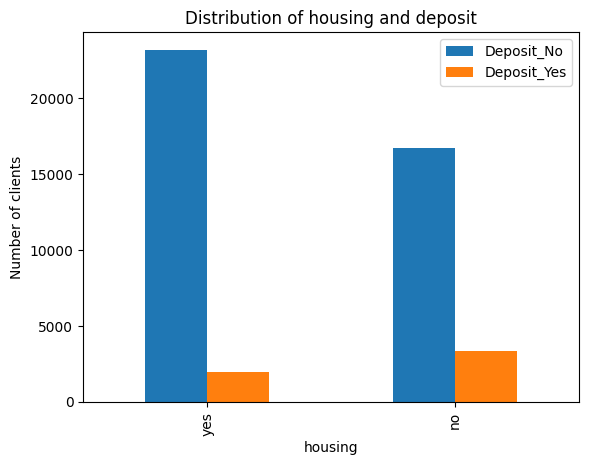

In [ ]:
plot_bar_col('housing')

Όσον αφορά την οικογενειακή κατάσταση και το επάγγελμα,   διαπιστώνεται και εκεί μια ξεκάθαρη προτίμηση από το Τραπεζικό Ίδρυμα να προσσεγγίσει πελάτες οι οποίοι είτε ήταν παντρεμένοι (‘marital’) είτε ασχολούνταν με χειρωνακτικές εργασίες και που το επίπεδο σπουδών τους ήταν η δευτεροβάθμια εκπαίδευση.

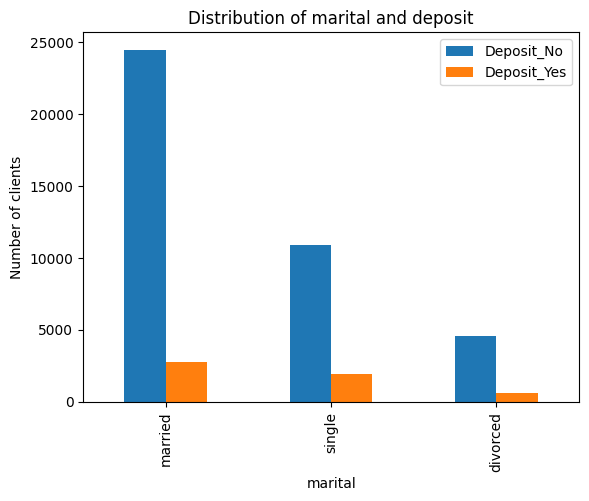

In [ ]:
plot_bar_col('marital')

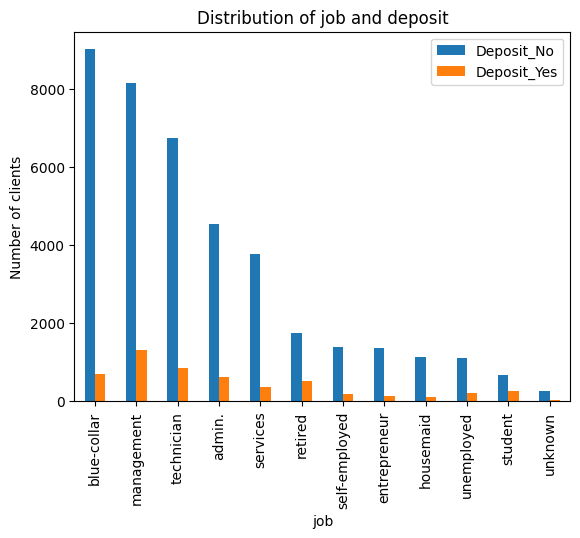

In [ ]:
plot_bar_col('job')

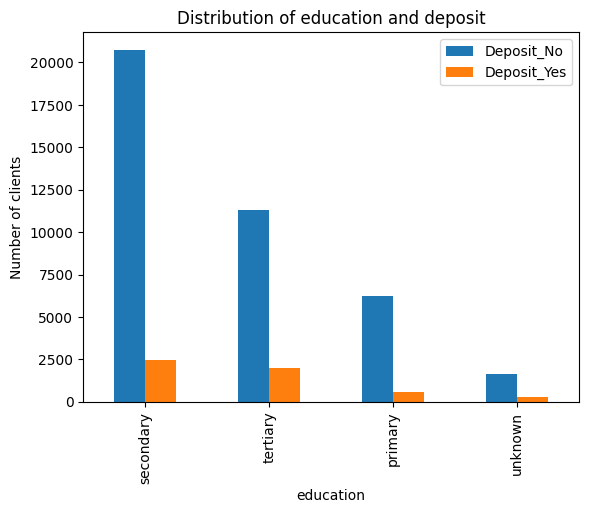

In [ ]:
plot_bar_col('education')

Τέλος για την ανάλυση της ηλικίας των πελατών διαπιστώνεται ότι η γραφική απεικόνιση της ηλικίας ως διακριτός αριθμός δεν αποτελεί ένα ιδανικό τρόπο απεικόνισης , οπότε η ηλικία θα μετατραπεί σε ηλικιακές ομάδες

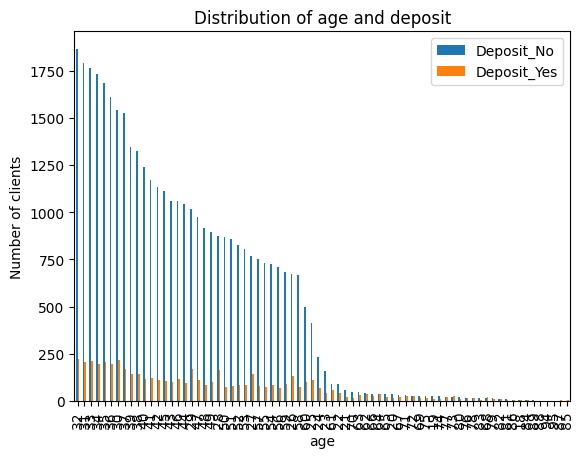

In [ ]:
plot_bar_col('age')

In [ ]:
df['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [ ]:
bins=np.arange(20,100,step=5)
df['ageGroup'] = pd.cut(df['age'], bins=bins )

Από το διάγραμμα των ηλικιακών ομάδων είναι πασιφανές πως το Τραπεζικό Ίδρυμα προτιμούσε να προωθήσει το προϊόν του σε πελάτες ηλικίας μικρότερης των 50 ετών, χωρίς όμως να έχει την αναμενόμενη απήχηση. Εντούτοις στις ηλικίες άνω των 60 ετών το προϊόν είχε πολύ μεγάλη ζήτηση καθώς περίπου οι μισές από τις επικοινωνίες οδηγούσαν σε άνοιγμα μιας νέας προθεσμιακής κατάθεσης. Το γεγονός μπορεί να οφείλεται στους όρους του προσφερόμενου προϊόντος και συνεπώς δεν μπορεί να γενικευθεί και να εξαχθεί το συμπέρασμα ότι οι ηλικίες κάτω των 60 ετών δεν προτιμούν τις προθεσμιακές καταθέσεις και επομένως θα πρέπει να αποκλειστούν απο τις μελλοντικές καμπάνιες του Ιδρύματος.

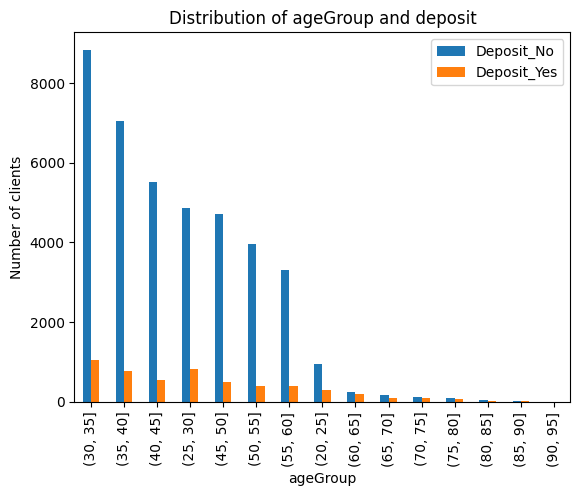

In [ ]:
plot_bar_col('ageGroup')

<Axes: ylabel='y'>

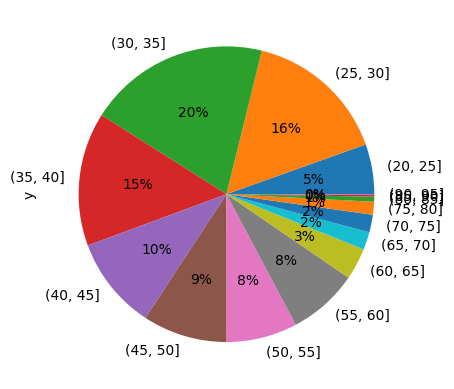

In [ ]:
df.loc[df['y'] == 'yes'].groupby(['ageGroup']).count().plot(kind='pie', y='y', autopct='%1.0f%%', legend=False )

In [ ]:
df.loc[df['y'] == 'yes'].groupby(['ageGroup']).count()['y']

ageGroup
(20, 25]     287
(25, 30]     825
(30, 35]    1044
(35, 40]     768
(40, 45]     533
(45, 50]     486
(50, 55]     407
(55, 60]     404
(60, 65]     182
(65, 70]     102
(70, 75]     101
(75, 80]      74
(80, 85]      29
(85, 90]       9
(90, 95]       5
Name: y, dtype: int64

<Axes: ylabel='y'>

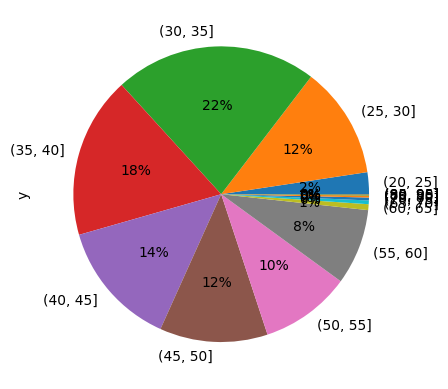

In [ ]:
df.loc[df['y'] == 'no'].groupby(['ageGroup']).count().plot(kind='pie', y='y', autopct='%1.0f%%', legend=False)

Λοιπά διαγράμματα που δεν χρησιμοποιήθηκαν

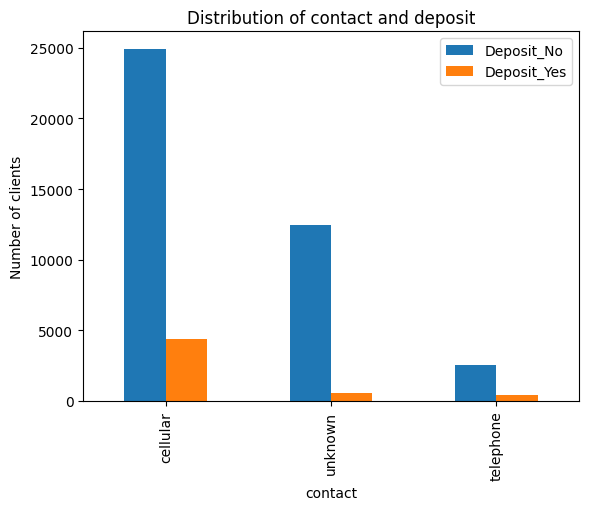

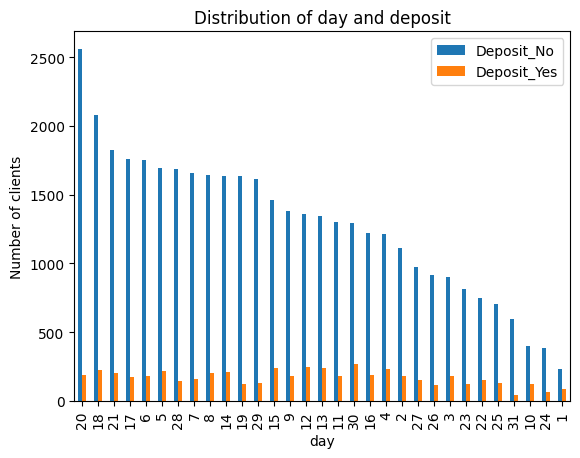

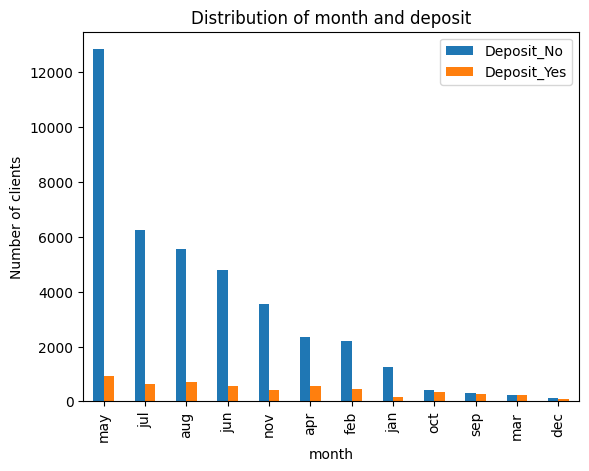

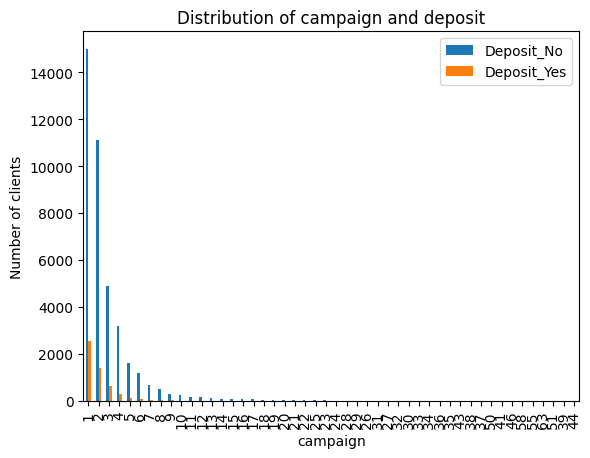

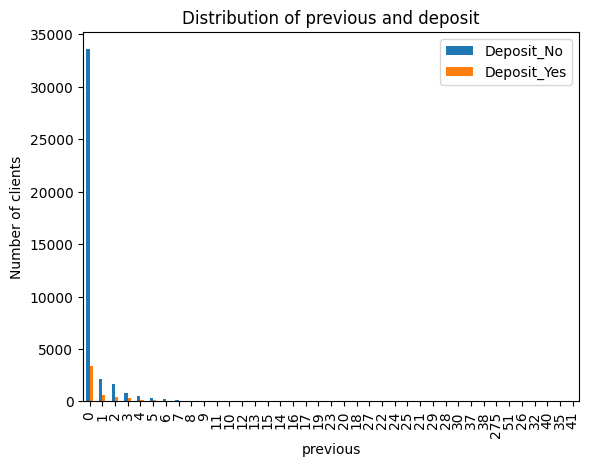

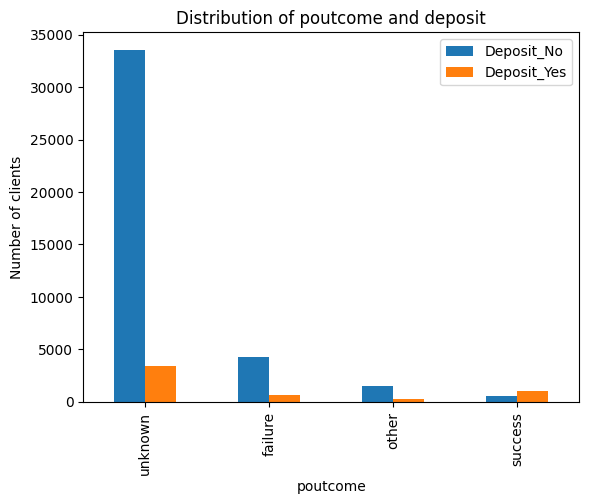

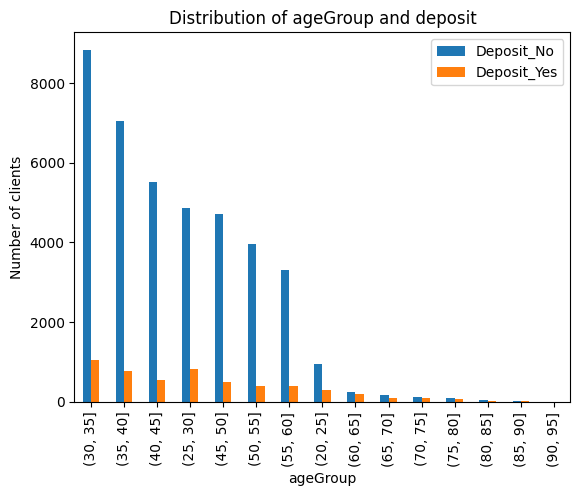

In [ ]:
for col in df.columns:
  if col in ['y', 'balance', 'duration', 'pdays', 'age', 'education', 'job', 'marital', 'default', 'loan', 'housing' ]:
    continue
  plot_bar_col(col)

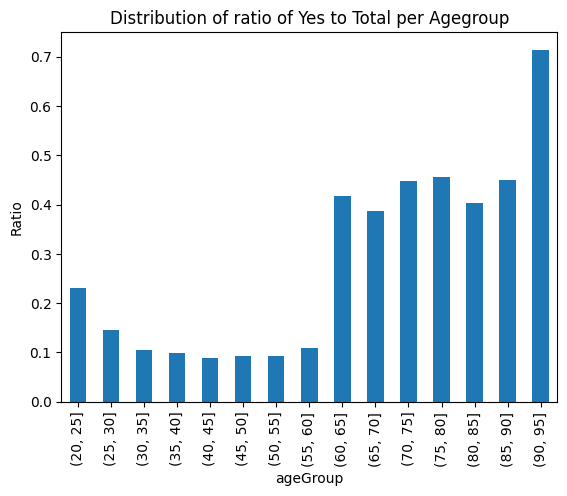

In [ ]:
df_temp = pd.DataFrame()
df_temp['Deposit_Yes'] = df.loc[df['y'] == 'yes'].groupby(['ageGroup']).count()['y']
df_temp['Deposit_Total'] = df.groupby(['ageGroup']).count()['y']
df_temp['ratio']=df_temp['Deposit_Yes']/df_temp['Deposit_Total']
df_temp['ratio'].plot(kind='bar')
plt.ylabel('Ratio')
plt.title('Distribution of ratio of Yes to Total per Agegroup')
plt.show()

##Values Conversation##

Για να εξεταστεί το κατά πόσο η εκπαίδευση ενός μοντέλου μηχανικής μάθησης με το συγκεκριμένο dataset μπορεί να δημιουργήσει bias στο μοντέλο,  θα γίνει χρήση του framework AIF360 ορίζοντας ως protected attribute την ηλικία και ως unprivileged group την ηλικία 35-50.

Βασικές προϋποθέσεις για την χρήση του AIF360  είναι όλα τα κατηγορικά attributes να μετατραπούν σε αριθμητικά και επίσης το protected attribute να είναι binary.

Για τους λόγους αυτούς, για τα attributes month και education που είναι Ordinal η μετατροπή των τιμών τους θα γίνει με τη χρήση map , ενώ τα υπόλοιπα κατηγορίκα attributes θα μετατραπούν σε αριθμητικά με την χρήση του LabelEncoder. Καθώς το attribute ‘age’ θα πρέπει γίνει binary, τα αντικείμενα που είναι στο διάστημα 35-50 θα πάρουν τιμή 0 ενώ στις άλλες περιπτώσεις θα πάρουν την τιμή 1.

Τέλος το attribute 'ageGroup', που δημιουργήθηκε για την δημιουργία διαγραμμάτων, θα διαγραφεί.

In [ ]:
df.drop(['ageGroup'], axis=1, inplace=True)

In [ ]:
df['month'] = df['month'].map(
                   {'jan':1,
                    'feb':2,
                    'mar':3,
                    'apr':4,
                    'may':5,
                    'jun':6,
                    'jul':7,
                    'aug':8,
                    'sep':9,
                    'oct':10,
                    'nov':11,
                    'dec':12
                     })

In [ ]:
pd.unique(df['education'])

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df['education'] = df['education'].map(
                   {'unknown':0,
                    'primary':1,
                    'secondary':2,
                    'tertiary':3
                    })

In [ ]:
cols = df.columns
numerical_col = df._get_numeric_data().columns
categorical_col = list(set(cols) - set(numerical_col))
categorical_col

['contact', 'housing', 'y', 'loan', 'default', 'poutcome', 'marital', 'job']

In [ ]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
for col in categorical_col:
  df[col] = lab_enc.fit_transform(df[col])
  le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
  display(Markdown("#### %s" % col))
  print('mapping', le_name_mapping)

#### contact

mapping {'cellular': 0, 'telephone': 1, 'unknown': 2}


#### housing

mapping {'no': 0, 'yes': 1}


#### y

mapping {'no': 0, 'yes': 1}


#### loan

mapping {'no': 0, 'yes': 1}


#### default

mapping {'no': 0, 'yes': 1}


#### poutcome

mapping {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}


#### marital

mapping {'divorced': 0, 'married': 1, 'single': 2}


#### job

mapping {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}


In [ ]:
df.age = df.age.apply(lambda x: 0 if 35 < x < 50 else 1)

# **Split the dataset, set variables and calculate statistics**

Θα γίνει μετατροπή του dataset σε ένα instance του StandardDataset του AIF360. Η ενέργεια αυτή δεν είναι απαραίτητη αλλά είναι αρκετά βολική κατά την χρήση του AIF360.

Για την μετατροπή θα πρέπει να ορισθεί ποιό attribute του dataset είναι:

*   το αποτέλεσμα που θα πρέπει να προβλέπει το μοντέλο (label_name)  και ποιά τιμή είναι η θετική τιμή του (favorable_classes)
*   το protected attribute και ποιά τιμή έχει το privileged group

In [ ]:
from aif360.datasets import StandardDataset
dataset_orig = StandardDataset(df,
                          label_name='y',
                          favorable_classes=[1],
                          protected_attribute_names=['age'],
                          privileged_classes=[[1]])

Ακολούθως το dataset θα χωρισθεί σε τρία μέρη με αναλογία 70%-15%-15%. Το πρώτο μέρος (dataset_orig_train) θα χρησιμοποιηθεί για την εκπαίδευση του μοντελου, το δεύτερο μέρος (dataset_orig_valid) για την εύρεση της βέλτιστής τιμής τυχόν παραμέτρον (fine tunning) και το τρίτο μέρος (dataset_orig_valid) για την αξιολόγηση του μοντέλου.

In [ ]:
dataset_orig_train, dataset_orig_vt = dataset_orig.split([0.7], shuffle=True, seed=1)
dataset_orig_valid, dataset_orig_test = dataset_orig_vt.split([0.5], shuffle=True, seed=1)

In [ ]:
protected_attr = dataset_orig_train.protected_attribute_names[0]
sens_idx = dataset_orig_train.protected_attribute_names.index(protected_attr)
privileged_groups =  [{protected_attr:dataset_orig_train.privileged_protected_attributes[sens_idx][0]}]
unprivileged_groups = [{protected_attr:dataset_orig_train.unprivileged_protected_attributes[sens_idx][0]}]
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

display(Markdown("#### Training Dataset shape"))
print(dataset_orig_train.features.shape)
display(Markdown("#### Validating Dataset shape"))
print(dataset_orig_valid.features.shape)
display(Markdown("#### Testing Dataset shape"))
print(dataset_orig_test.features.shape)
display(Markdown("#### Favorable and unfavorable labels"))
print(dataset_orig_train.favorable_label, dataset_orig_train.unfavorable_label)
display(Markdown("#### Protected attribute names"))
print(dataset_orig_train.protected_attribute_names[0])
display(Markdown("#### Privileged and unprivileged groups"))
print("privileged_groups :"+ str(privileged_groups),
      "unprivileged_groups :"+str(unprivileged_groups))
display(Markdown("#### Dataset feature names"))

print(dataset_orig_train.feature_names)

#### Training Dataset shape

(31647, 16)


#### Validating Dataset shape

(6782, 16)


#### Testing Dataset shape

(6782, 16)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

age


#### Privileged and unprivileged groups

privileged_groups :[{'age': 1.0}] unprivileged_groups :[{'age': 0.0}]


#### Dataset feature names

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


Ένα από τα σημαντικά πλεονεκτήματα του framework είναι ότι μπορεί να μετρηθεί το bias σε αρκετά στάδια της εκπαίδευσης ενός μοντέλου. Οι μετρικές Disparate Impact  και Statical Parity Difference μπορεί να χρησιμοποιηθούν και στο στάδιο αυτό για την  αξιολόγηση  του επιπέδου του bias στο dataset.

Υπολογίζοντας τις μετρικές τόσο στο αρχικό dataset όσο και στα τρία μέρη που προέκυψαν κατά το διαχωρισμό του, διαπιστώνεται για αρχή ότι το bias είναι σχεδόν ίδιο και στα τέσσερα dataset. Στη συνέχεια μελετώντας τις τιμές τους, φαίνεται ότι μόνο η μετρική Disparate Impact έχει εντοπίσει bias υπέρ του privileged group ενώ η Statical Parity Difference θεωρεί ότι το bias είναι σε ανεκτά πλαίσια.

In [ ]:
datasets=[ 'dataset_orig', 'dataset_orig_train', 'dataset_orig_valid',   'dataset_orig_test']
display(Markdown("#### Disparate impact outcomes between unprivileged and privileged groups"))
for dt in datasets:
  dataset_metric = BinaryLabelDatasetMetric( locals()['%s' % dt] ,  unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
  print("%s = %f" % (dt, dataset_metric.disparate_impact()))
display(Markdown("#### Statical Parity Difference (Difference in mean) outcomes between unprivileged and privileged groups"))
for dt in datasets:
  dataset_metric = BinaryLabelDatasetMetric( locals()['%s' % dt] ,  unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
  print("%s = %f" % (dt, dataset_metric.mean_difference()))

#### Disparate impact outcomes between unprivileged and privileged groups

dataset_orig = 0.718086
dataset_orig_train = 0.719844
dataset_orig_valid = 0.714250
dataset_orig_test = 0.714652


#### Statical Parity Difference (Difference in mean) outcomes between unprivileged and privileged groups

dataset_orig = -0.037178
dataset_orig_train = -0.036885
dataset_orig_valid = -0.035983
dataset_orig_test = -0.039601


# **Applying Logistic Regression on Original Training Dataset**

Για να γίνει μια πιο ενδελεχής μελέτη του bias θα εκπαιδευτεί ένα μοντέλο Logistic Regression και θα εξεταστεί η υπάρξη bias στα αποτελέσματα του.  

Για να επιτευχθεί η βέλτιστη απόδοση του μοντέλου, θα ζητηθεί από το μοντέλο να υπολογίσει την πιθανότητα να ανήκει ένα αντικείμενο στην favorable class και έπειτα θα επιλεγεί το classification threshold που αποδίδει την μέγιστη balanced accuracy του μοντέλου.

In [ ]:
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(dataset_orig_train.features)
y_train = dataset_orig_train.labels.ravel()

LR = LogisticRegression()
LR.fit(X_train, y_train, sample_weight=dataset_orig_train.instance_weights)
fav_idx = int(dataset_orig_train.favorable_label)

In [ ]:
#Test model on validation dataset and find threshold for best balanced accuracy

dataset_orig_valid_pred = dataset_orig_valid.copy(deepcopy=True)
X_valid = scale_orig.transform(dataset_orig_valid_pred.features)
y_valid = dataset_orig_valid_pred.labels
dataset_orig_valid_pred.scores = LR.predict_proba(X_valid)[:,fav_idx].reshape(-1,1)

steps = 19
thresh_arr = np.linspace(0.05, 0.95, steps)

bal_acc_arr = []
acc_arr = []
disp_imp_arr = []
stat_par_diff_arr = []
avg_odds_diff_arr = []
eq_opp_diff_arr = []
theil_ind_arr = []


for thresh in tqdm(thresh_arr):

    dataset_orig_valid_pred.labels = (dataset_orig_valid_pred.scores > thresh).astype(np.double)

    metric_valid = compute_metrics(dataset_orig_valid, dataset_orig_valid_pred,
                                      unprivileged_groups, privileged_groups,
                                      disp = False)

    bal_acc_arr.append(metric_valid["Balanced accuracy"])
    acc_arr.append(metric_valid["Accuracy"])
    disp_imp_arr.append(metric_valid["Disparate impact"])
    stat_par_diff_arr.append(metric_valid["Statistical parity difference"])
    avg_odds_diff_arr.append(metric_valid["Average odds difference"])
    eq_opp_diff_arr.append(metric_valid["Equal opportunity difference"])
    theil_ind_arr.append(metric_valid["Theil index"])

thresh_arr_best_ind = np.where(bal_acc_arr == np.max(bal_acc_arr))[0][0]
thresh_arr_best = np.array(thresh_arr)[thresh_arr_best_ind]

# best_bal_acc = bal_acc_arr[thresh_arr_best_ind]

print(".")
print("Best balanced accuracy = %.4f" % bal_acc_arr[thresh_arr_best_ind])
print("Optimal classification threshold = %.4f" % thresh_arr_best)
print("Accuracy = %.4f" % acc_arr[thresh_arr_best_ind])
print("Disparate impact = %.4f" % disp_imp_arr[thresh_arr_best_ind])
print("Statistical parity difference = %.4f" % stat_par_diff_arr[thresh_arr_best_ind])
print("Average odds difference = %.4f" % avg_odds_diff_arr[thresh_arr_best_ind])
print("Equal opportunity difference = %.4f" % eq_opp_diff_arr[thresh_arr_best_ind])
print("Theil index = %.4f" % theil_ind_arr[thresh_arr_best_ind])


100%|██████████| 19/19 [00:00<00:00, 102.73it/s]

.
Best balanced accuracy = 0.7863
Optimal classification threshold = 0.1000
Accuracy = 0.7395
Disparate impact = 0.6093
Statistical parity difference = -0.1566
Average odds difference = -0.1038
Equal opportunity difference = -0.0628
Theil index = 0.0712


Από τα διαγράμματα φαίνεται πως η μέγιστη τιμή της balanced accuracy επιτευχθεί όταν το threshold είχε την τιμή 0.10. Από το σημείο αυτό και μετά η balanced accuracy μειωνώταν δραματικά ενώ εντούτοις αυξάνονταν το fairness

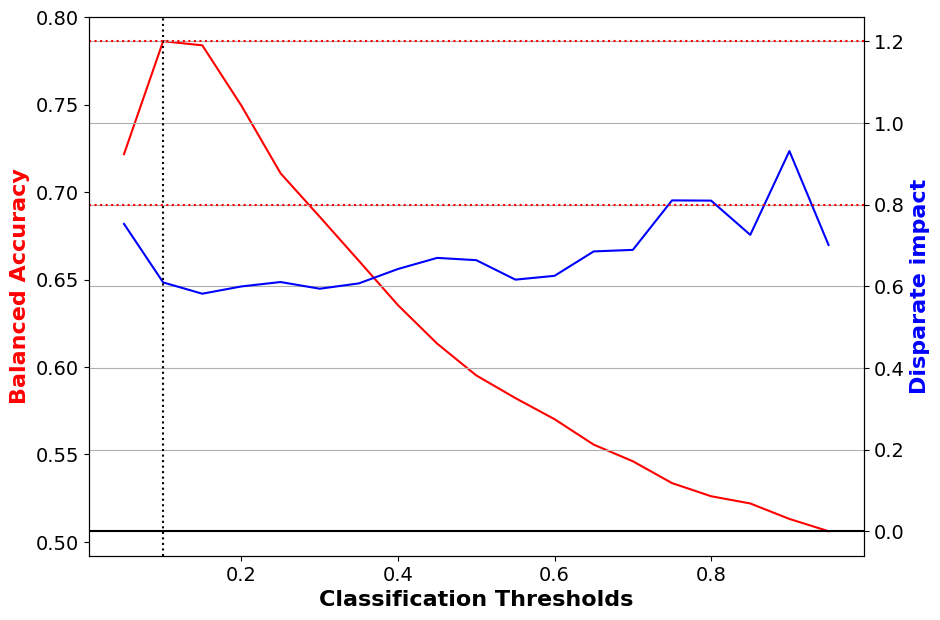

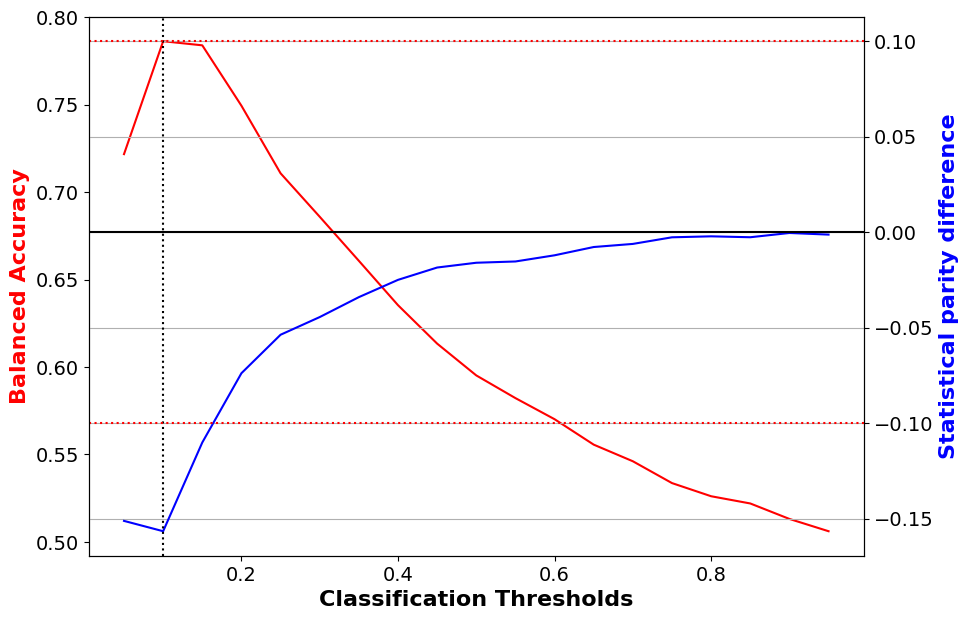

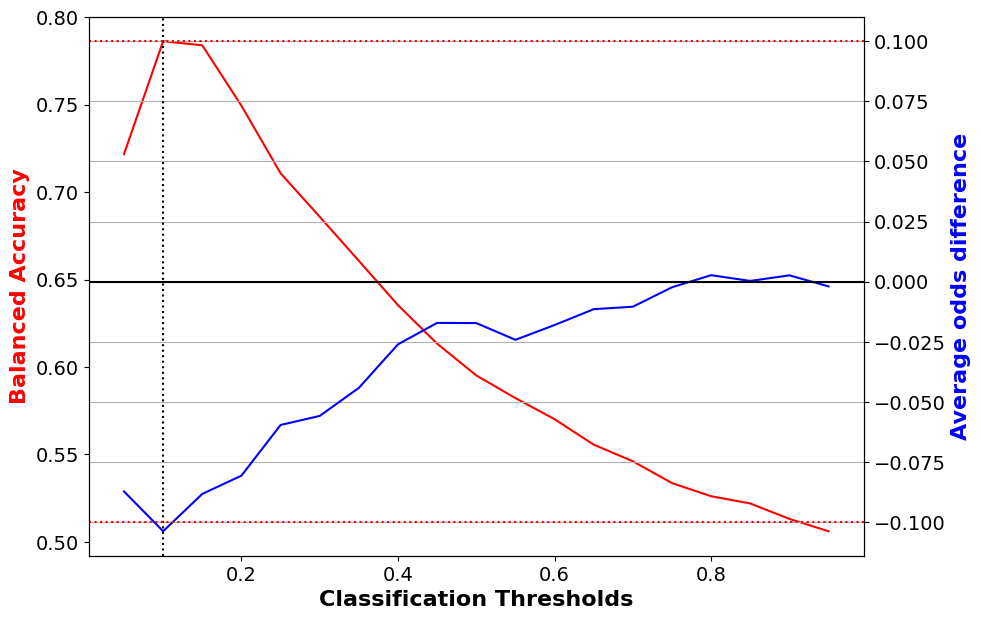

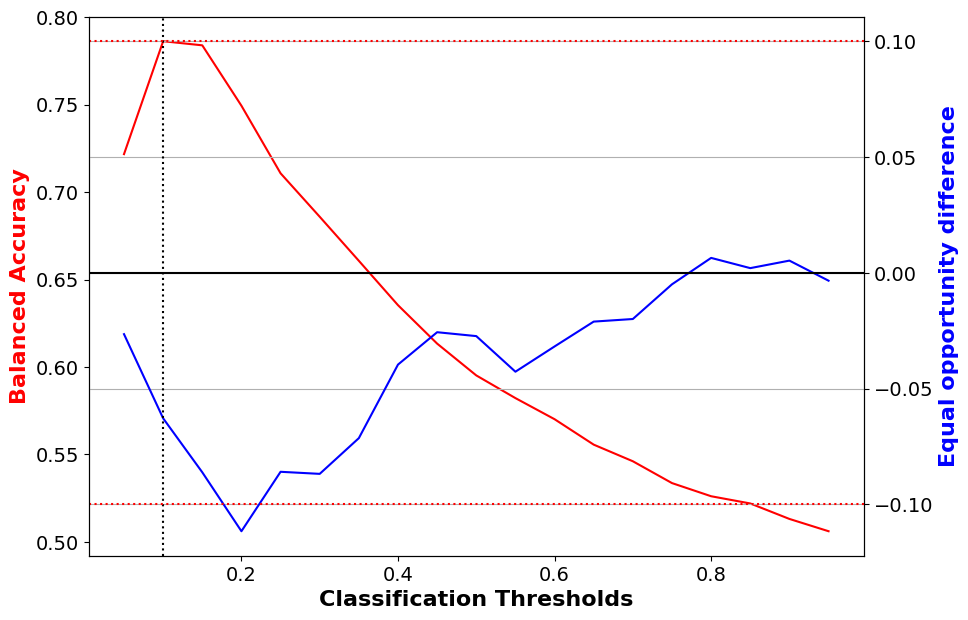

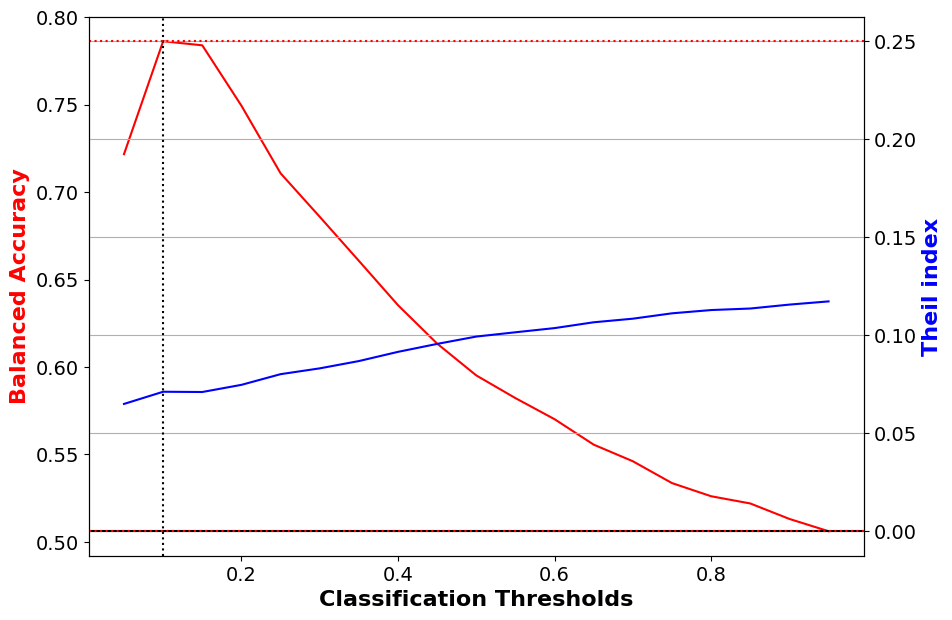

In [ ]:
arr=[disp_imp_arr, stat_par_diff_arr, avg_odds_diff_arr, eq_opp_diff_arr, theil_ind_arr]

for i in range(2,len(metrics)):
  plot_metric(thresh_arr, 'Classification Thresholds', thresh_arr_best_ind, bal_acc_arr, 'Balanced Accuracy', arr[i-2] , metrics[i] )

Μετά την εύρεση και τον ορισμό του optimal classification threshold, θα αποθηκευτούν οι τιμές των metrics σε μία λίστα και οι προβλέψεις του μοντέλου σε ένα νέο dataset ώστε να αποτελέσουν την βάση συγκρίσης για το υπόλοιπο πείραμα.

### Plot of balanced accuracy and output fairness vs threshold

#### The graph illustrates the affect on fairness metrics for various values of threshold

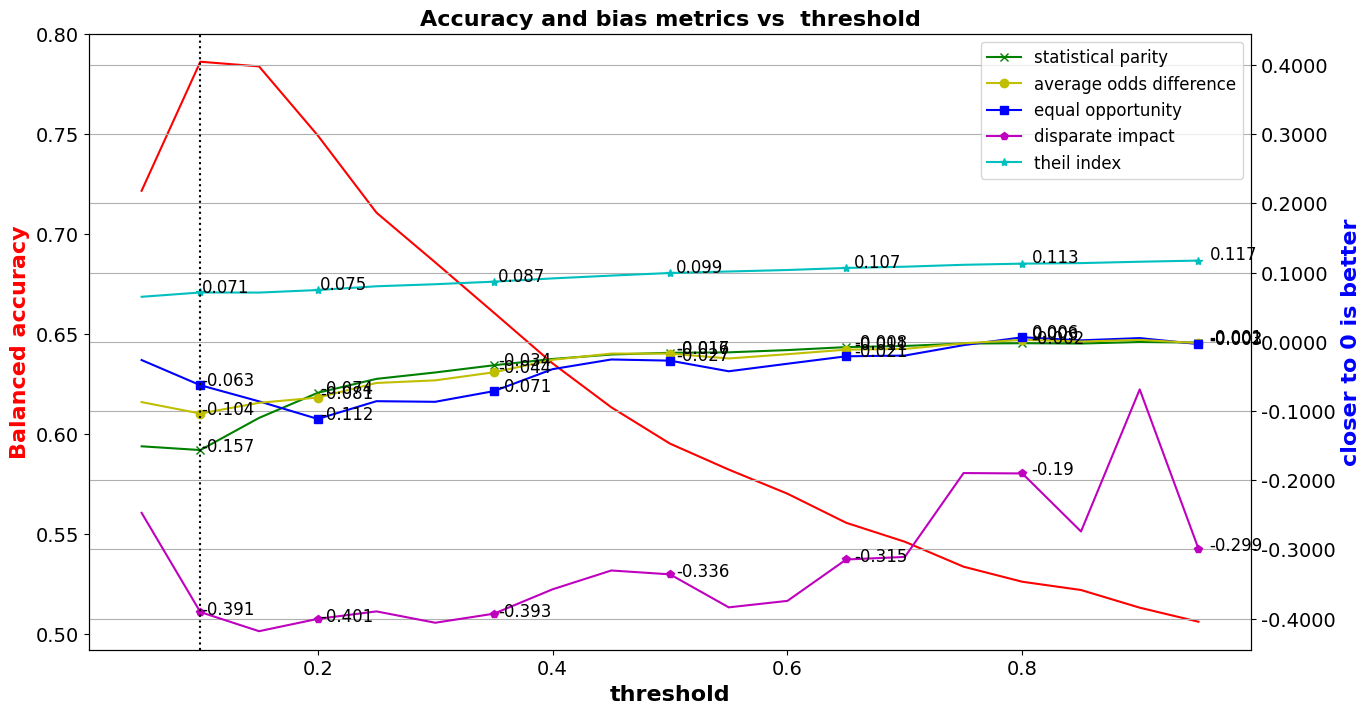

In [ ]:
plot_all_metrics(stat_par_diff_arr, avg_odds_diff_arr, eq_opp_diff_arr, disp_imp_arr, theil_ind_arr, bal_acc_arr, thresh_arr, thresh_arr_best_ind, 1 , 18 , 7, 'threshold'  )

In [ ]:
dataset_orig_valid_pred = dataset_orig_valid.copy(deepcopy=True)
X_valid = scale_orig.transform(dataset_orig_valid_pred.features)
y_valid = dataset_orig_valid_pred.labels
dataset_orig_valid_pred.scores = LR.predict_proba(X_valid)[:,fav_idx].reshape(-1,1)
dataset_orig_valid_pred.labels = (dataset_orig_valid_pred.scores > thresh_arr_best).astype(np.double)

In [ ]:
dataset_orig_test_pred = dataset_orig_test.copy(deepcopy=True)
X_test = scale_orig.transform(dataset_orig_test_pred.features)
y_test = dataset_orig_test_pred.labels
dataset_orig_test_pred.scores = LR.predict_proba(X_test)[:,fav_idx].reshape(-1,1)
dataset_orig_test_pred.labels = (dataset_orig_test_pred.scores > thresh_arr_best).astype(np.double)

In [ ]:
OR_metric_test = compute_metrics(dataset_orig_test, dataset_orig_test_pred,
                unprivileged_groups, privileged_groups)

Balanced accuracy = 0.7927
Accuracy = 0.7402
Disparate impact = 0.6393
Statistical parity difference = -0.1468
Average odds difference = -0.1141
Equal opportunity difference = -0.1013
Theil index = 0.0710


In [ ]:
OR_metrics=[]
for m in metrics:
  OR_metrics.append(OR_metric_test.get(m))

<ipython-input-48-3f98e1f1729d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(metrics), i+1)


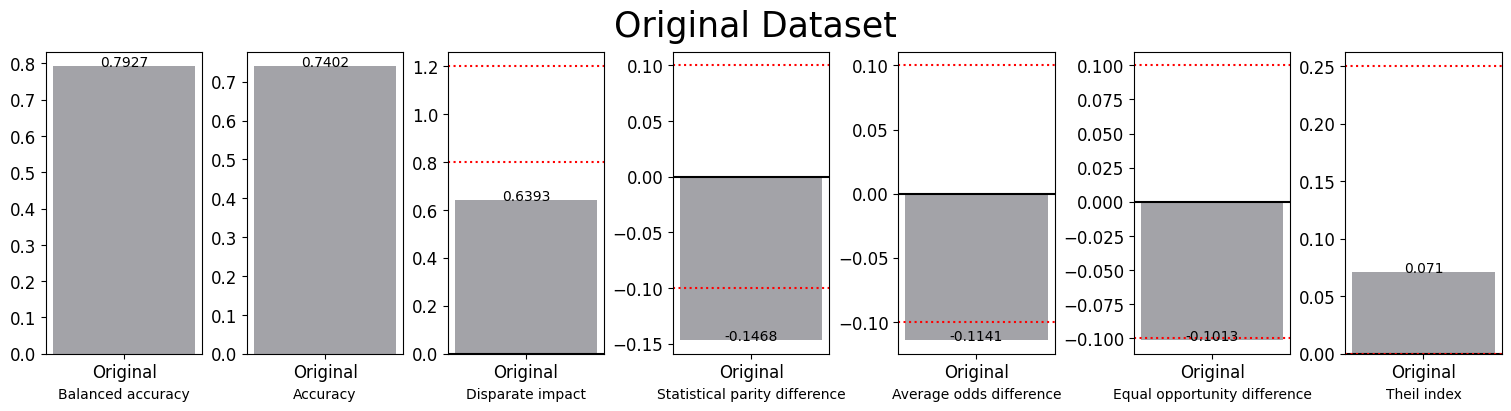

#### In Original Dataset

Bias against unprivileged group detected in **4** out of 5 metrics

In [ ]:
fig, ax = plt.subplots(figsize = (15,4), layout="constrained")

fig.suptitle("Original Dataset", fontsize=25 )

color = ['#A3A3A8']
name = ['Original']


xlabel_font_size=10

for i in range(0,len(metrics)):
    plt.subplot(1, len(metrics), i+1)
    metric_var = metrics[i]
    value = [OR_metrics[i]]
    plt.bar(name, value, color=color, )
    plt.xlabel(metric_var, fontsize = xlabel_font_size)
    plt.text(0, value[0] , round(value[0], 4) , fontsize=10, ha='center')
    if i > 1:
      plt.axhline(0, color='k', linestyle='-')
      plt.axhline(bounds[metric_var][0], color='r', linestyle=':')
      plt.axhline(bounds[metric_var][1], color='r', linestyle=':')

plt.show()

display(Markdown("#### In Original Dataset" ))
check = [bounds[metrics[i]][0] < OR_metrics[i] < bounds[metrics[i]][1] for i in range(2,7)]
display(Markdown("Bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

Μετά από την εκπαίδευση του μοντέλου και τον υπολογισμό και των πέντε bias metrics διαπιστώνεται πως σύμφωνα με  τέσσερα εξ αυτών υπάρχει bias στα αποτελέσματα του μοντέλου.

Αξίζει να σημειωθεί πως οι τιμές των μετρικών Disparate Impact και Statical Parity Difference έχουν μεταβληθεί κατά πολύ σε σχέση με τον υπολογισμό τους στο αρχικό dataset και δείχνουν πλέον ξεκάθαρα ότι υπάρχει bias.

# **Pre-Processing**

Καθώς οι Pre-Processing μέθοδοι για την μείωση του bias, τροποποιούν το training dataset, θα δημιουργηθεί ένα νέο training dataset από την κάθε μέθοδο και βάση των νέων training datasets θα εκπαιδευτούν αντίστοιχα μοντέλα Logistic Regression.


Έπειτα από το κάθε μοντέλο θα ζητηθεί να προβλέψει τα αποτελέσματα στο ίδιο testing dataset ώστε στο τέλος θα υπολογιστούν οι μετρικές για την αξιολόγηση τους.

Ως classification threshold θα ορισθεί το threshold του μοντέλου που εκπαιδεύτηκε με το αρχικό dataset

##Reweighing (RW)

Η μέθοδος Reweighing δεν έχει παραμέτρους που θα πρέπει να ορισθούν από τον χρήστη, οπότε θα εφαρμοστεί απευθείας στο training dataset και έπειτα θα υπολογιστούν οι μετρικές Statical Parity Difference και Disparate Impact.


Από τα αποτελέσματα των μετρικών διαπιστώνεται πως το Reweighing έχει εξαλείψει πλήρως το bias στο νέο training dataset.

Με το νέο training dataset θα εκπαιδευτεί ένα νέο μοντέλο και θα εξετασθεί επιπλέον αν το classification threshold είναι ακόμη το βέλτιστο.

Πηγή: https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_reweighing_preproc.ipynb

In [ ]:
RW_dataset_orig_train = dataset_orig_train.copy(deepcopy=True)
RW_dataset_orig_valid = dataset_orig_valid.copy(deepcopy=True)
RW_dataset_orig_test = dataset_orig_test.copy(deepcopy=True)
RW = Reweighing(unprivileged_groups=unprivileged_groups,
               privileged_groups=privileged_groups)
RW.fit(RW_dataset_orig_train)
RW_dataset_transf_train = RW.transform(RW_dataset_orig_train)

In [ ]:
datasets=[ 'RW_dataset_orig_train', 'RW_dataset_transf_train' ]
display(Markdown("#### Statical Parity Difference (Difference in mean) outcomes between unprivileged and privileged groups"))
for dt in datasets:
  dataset_metric = BinaryLabelDatasetMetric( locals()['%s' % dt] ,  unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
  print("%s = %f" % (dt, dataset_metric.mean_difference()))
display(Markdown("#### Disparate Ιmpact outcomes between unprivileged and privileged groups"))
for dt in datasets:
  dataset_metric = BinaryLabelDatasetMetric( locals()['%s' % dt] ,  unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
  print("%s = %f" % (dt, dataset_metric.disparate_impact()))

#### Statical Parity Difference (Difference in mean) outcomes between unprivileged and privileged groups

RW_dataset_orig_train = -0.036885
RW_dataset_transf_train = -0.000000


#### Disparate Ιmpact outcomes between unprivileged and privileged groups

RW_dataset_orig_train = 0.719844
RW_dataset_transf_train = 1.000000


In [ ]:
scale = StandardScaler().fit(RW_dataset_transf_train.features)
X_train = scale.transform(RW_dataset_transf_train.features)
y_train = RW_dataset_transf_train.labels.ravel()

LR_RW = LogisticRegression()
LR_RW.fit(X_train, y_train, sample_weight=RW_dataset_transf_train.instance_weights)
fav_idx = int(RW_dataset_transf_train.favorable_label)

In [ ]:
RW_dataset_valid_pred = dataset_orig_valid.copy(deepcopy=True)
X_test = scale.transform(RW_dataset_valid_pred.features)
y_test = RW_dataset_valid_pred.labels
RW_dataset_valid_pred.scores = LR_RW.predict_proba(X_test)[:,fav_idx].reshape(-1,1)

RW_steps = 19
RW_thresh_arr = np.linspace(0.05, 0.95, RW_steps)


RW_bal_acc_arr = []
RW_acc_arr = []
RW_disp_imp_arr = []
RW_stat_par_diff_arr = []
RW_avg_odds_diff_arr = []
RW_eq_opp_diff_arr = []
RW_theil_ind_arr = []


for thresh in tqdm(RW_thresh_arr):

    RW_dataset_valid_pred.labels = (RW_dataset_valid_pred.scores > thresh).astype(np.double)

    RW_metric_test = compute_metrics(dataset_orig_valid, RW_dataset_valid_pred,
                                      unprivileged_groups, privileged_groups,
                                      disp = False)

    RW_bal_acc_arr.append(RW_metric_test["Balanced accuracy"])
    RW_acc_arr.append(RW_metric_test["Accuracy"])
    RW_disp_imp_arr.append(RW_metric_test["Disparate impact"])
    RW_stat_par_diff_arr.append(RW_metric_test["Statistical parity difference"])
    RW_avg_odds_diff_arr.append(RW_metric_test["Average odds difference"])
    RW_eq_opp_diff_arr.append(RW_metric_test["Equal opportunity difference"])
    RW_theil_ind_arr.append(RW_metric_test["Theil index"])

RW_thresh_arr_best_ind = np.where(RW_bal_acc_arr == np.max(RW_bal_acc_arr))[0][0]
RW_thresh_arr_best = np.array(RW_thresh_arr)[RW_thresh_arr_best_ind]

RW_best_bal_acc = RW_bal_acc_arr[RW_thresh_arr_best_ind]

print(".")
print("Best balanced accuracy = %.4f" % RW_best_bal_acc)
print("Optimal classification threshold = %.4f" % RW_thresh_arr[RW_thresh_arr_best_ind])
print("Accuracy = %.4f" % RW_acc_arr[RW_thresh_arr_best_ind])
print("Disparate impact = %.4f" % RW_disp_imp_arr[RW_thresh_arr_best_ind])
print("Statistical parity difference = %.4f" % RW_stat_par_diff_arr[RW_thresh_arr_best_ind])
print("Average odds difference = %.4f" % RW_avg_odds_diff_arr[RW_thresh_arr_best_ind])
print("Equal opportunity difference = %.4f" % RW_eq_opp_diff_arr[RW_thresh_arr_best_ind])
print("Theil index = %.4f" % RW_theil_ind_arr[RW_thresh_arr_best_ind])

100%|██████████| 19/19 [00:00<00:00, 119.24it/s]

.
Best balanced accuracy = 0.7851
Optimal classification threshold = 0.1000
Accuracy = 0.7426
Disparate impact = 0.8746
Statistical parity difference = -0.0440
Average odds difference = -0.0072
Equal opportunity difference = 0.0134
Theil index = 0.0716


Το νέο μοντέλο παρουσιάζει και αυτό την μέγιστη balanced accuracy όταν η τιμή του classification threshold είναι 0,10 , οπότε το optimal classification threshold παραμένει το ίδιο και μετά την εφαρμογή του Reweighing.

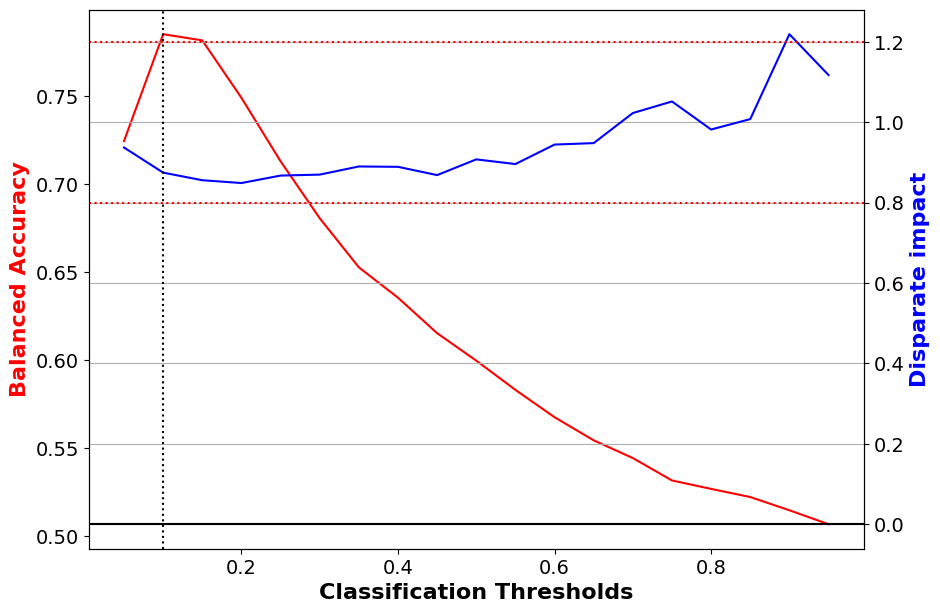

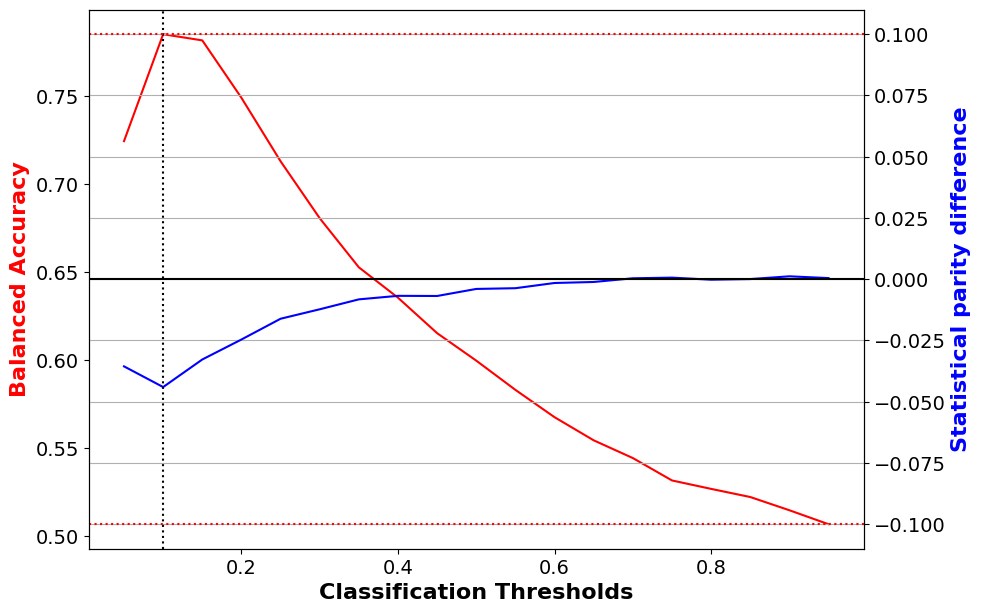

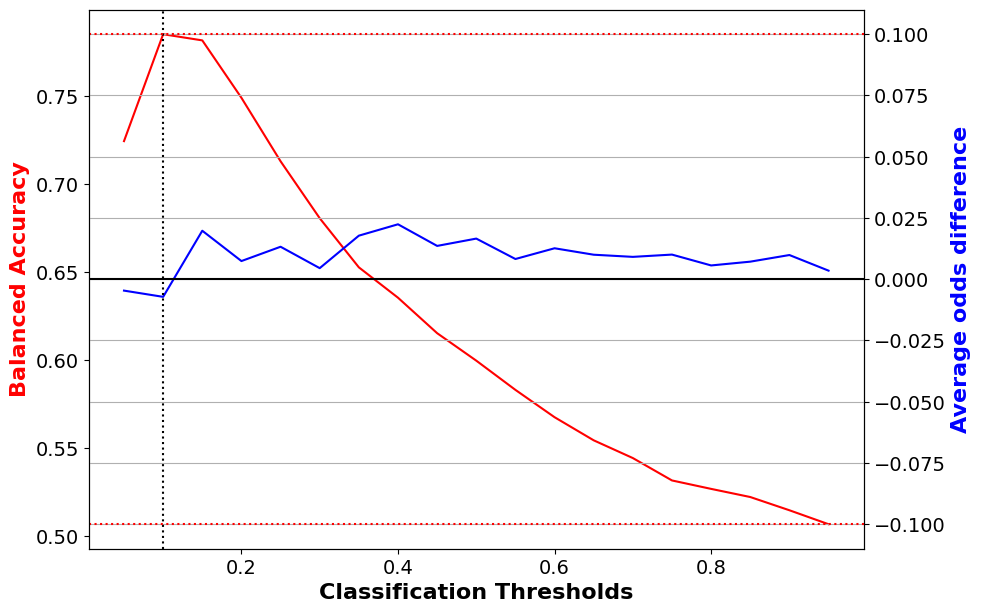

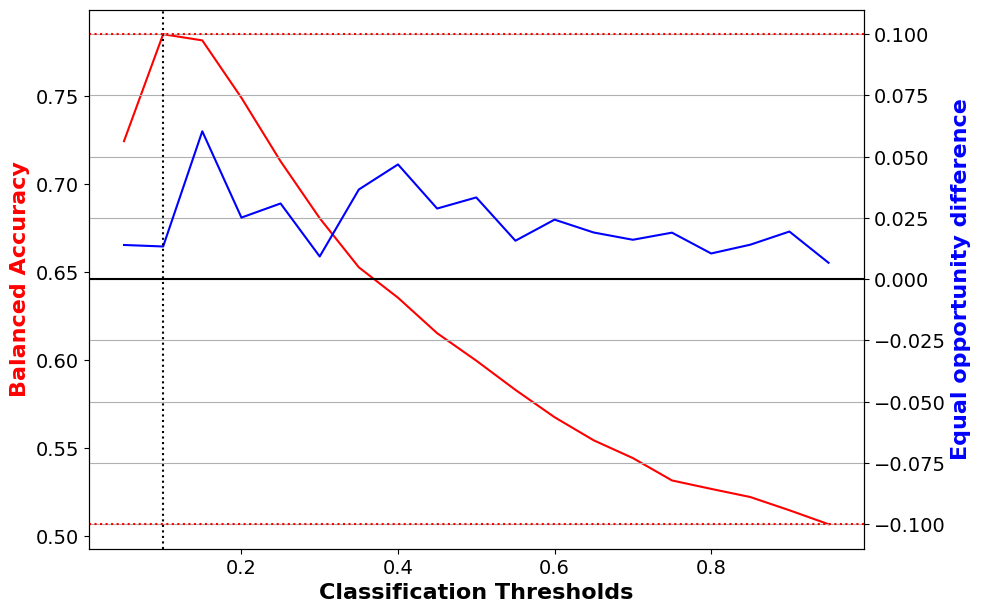

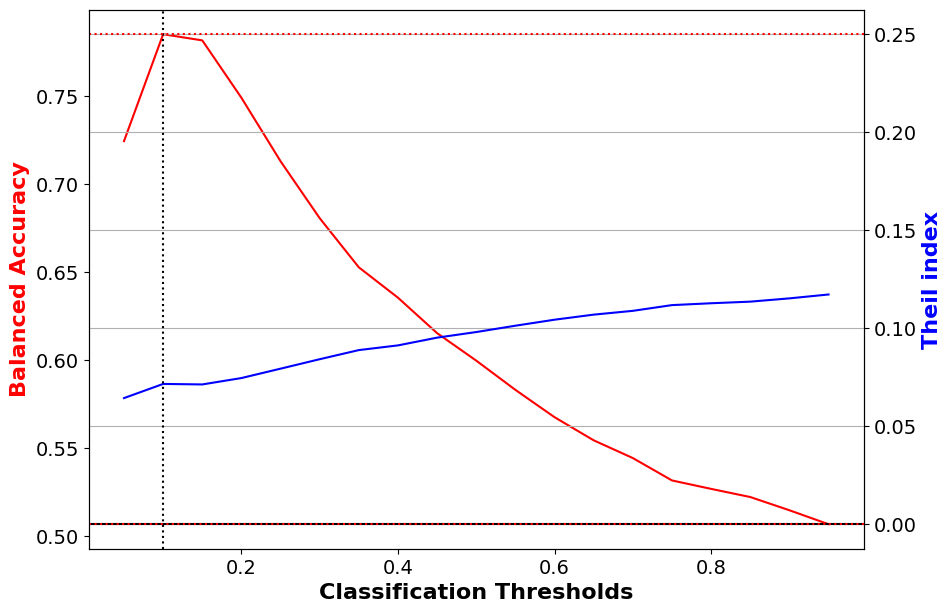

In [ ]:
arr=[RW_disp_imp_arr, RW_stat_par_diff_arr, RW_avg_odds_diff_arr, RW_eq_opp_diff_arr, RW_theil_ind_arr]

for i in range(2,len(metrics)):
  plot_metric(thresh_arr, 'Classification Thresholds', RW_thresh_arr_best_ind, RW_bal_acc_arr, 'Balanced Accuracy', arr[i-2] , metrics[i] )

### Plot of balanced accuracy and output fairness vs threshold

#### The graph illustrates the affect on fairness metrics for various values of threshold

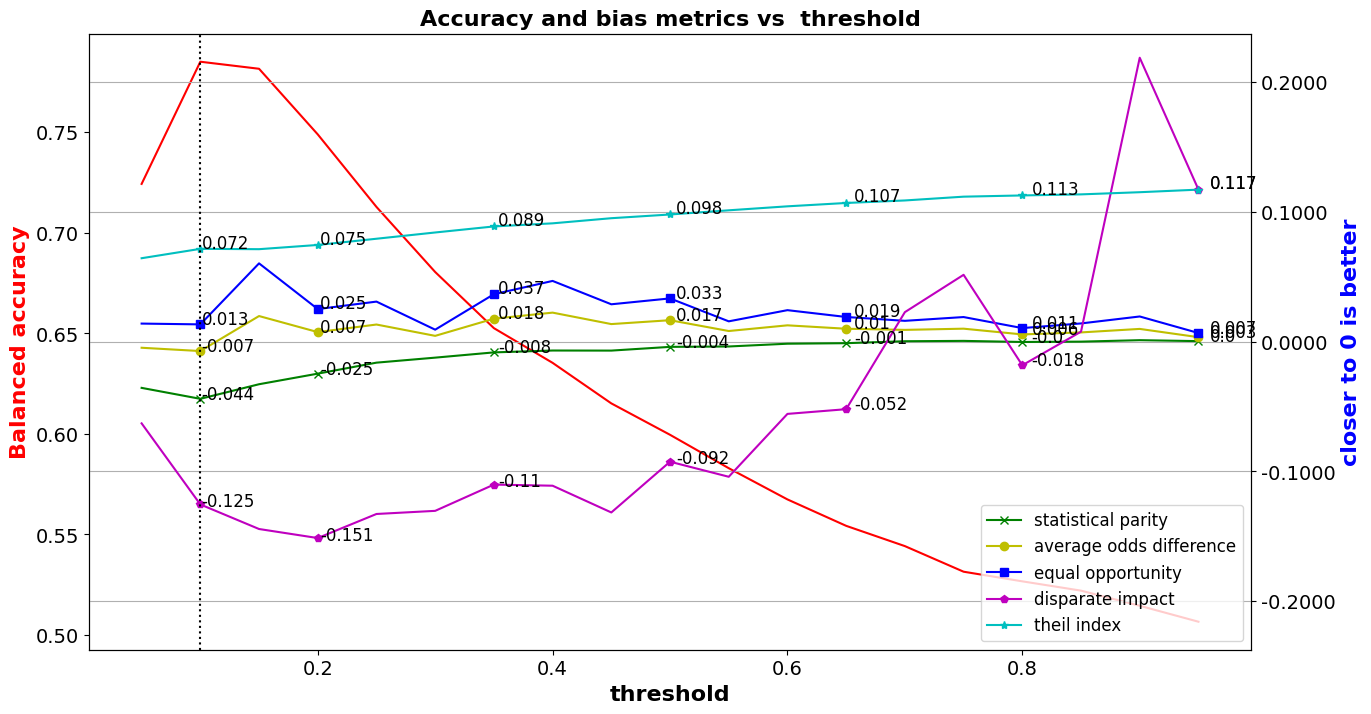

In [ ]:
plot_all_metrics(RW_stat_par_diff_arr,RW_avg_odds_diff_arr, RW_eq_opp_diff_arr, RW_disp_imp_arr, RW_theil_ind_arr, RW_bal_acc_arr, RW_thresh_arr, RW_thresh_arr_best_ind, 1 , 18 , 7, 'threshold'  )

### Plot of balanced accuracy and output fairness vs threshold

#### The graph illustrates the affect on fairness metrics for various values of threshold

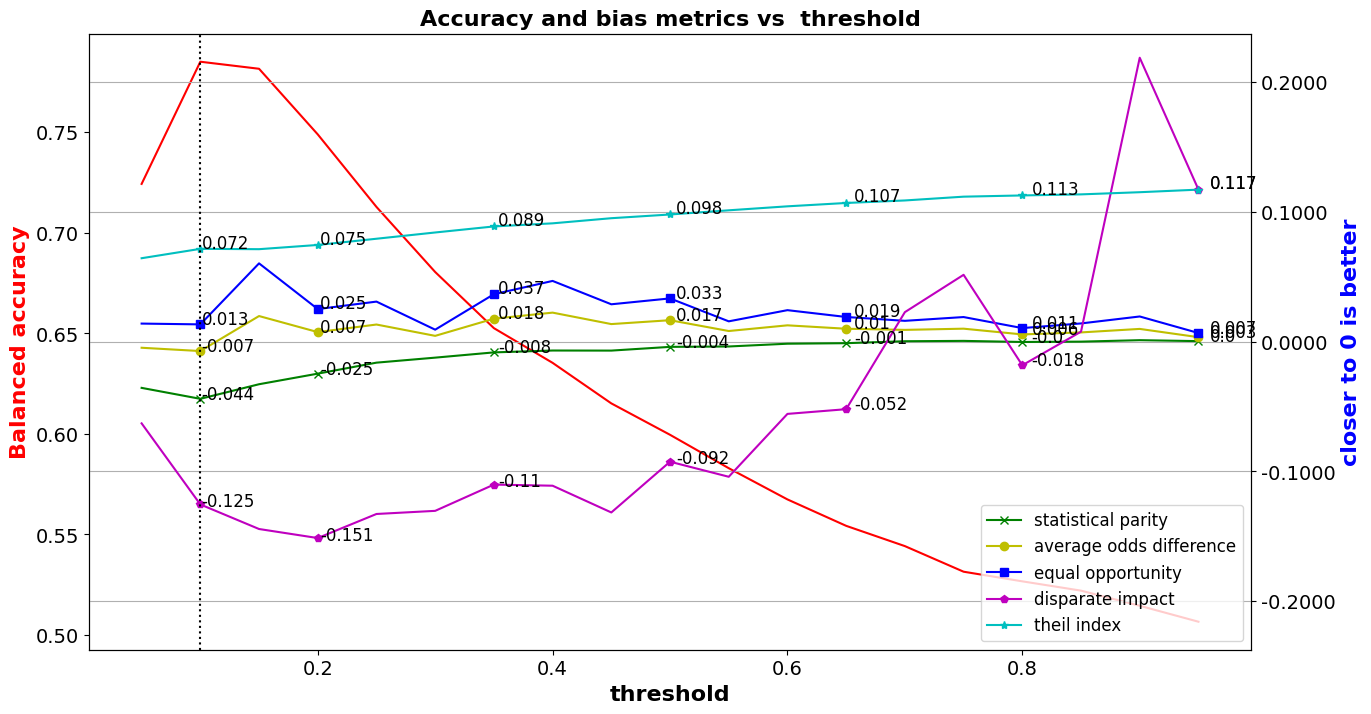

In [ ]:
plot_all_metrics(RW_stat_par_diff_arr,RW_avg_odds_diff_arr, RW_eq_opp_diff_arr, RW_disp_imp_arr, RW_theil_ind_arr, RW_bal_acc_arr, RW_thresh_arr, RW_thresh_arr_best_ind, 1 , 18 , 7, 'threshold'  )

In [ ]:
RW_dataset_orig_test_pred = dataset_orig_test.copy(deepcopy=True)
X_test = scale_orig.transform(RW_dataset_orig_test_pred.features)
y_test = RW_dataset_orig_test_pred.labels
RW_dataset_orig_test_pred.scores = LR_RW.predict_proba(X_test)[:,fav_idx].reshape(-1,1)
RW_dataset_orig_test_pred.labels = (RW_dataset_orig_test_pred.scores > RW_thresh_arr_best).astype(np.double)

In [ ]:
RW_metric_test = compute_metrics(RW_dataset_orig_test, RW_dataset_orig_test_pred,
                unprivileged_groups, privileged_groups)
RW_metrics=[]
for m in metrics:
  RW_metrics.append(RW_metric_test.get(m))

Balanced accuracy = 0.7950
Accuracy = 0.7424
Disparate impact = 0.9032
Statistical parity difference = -0.0350
Average odds difference = -0.0162
Equal opportunity difference = -0.0221
Theil index = 0.0705


<ipython-input-4-929b97642671>:60: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(metrics), i+1)


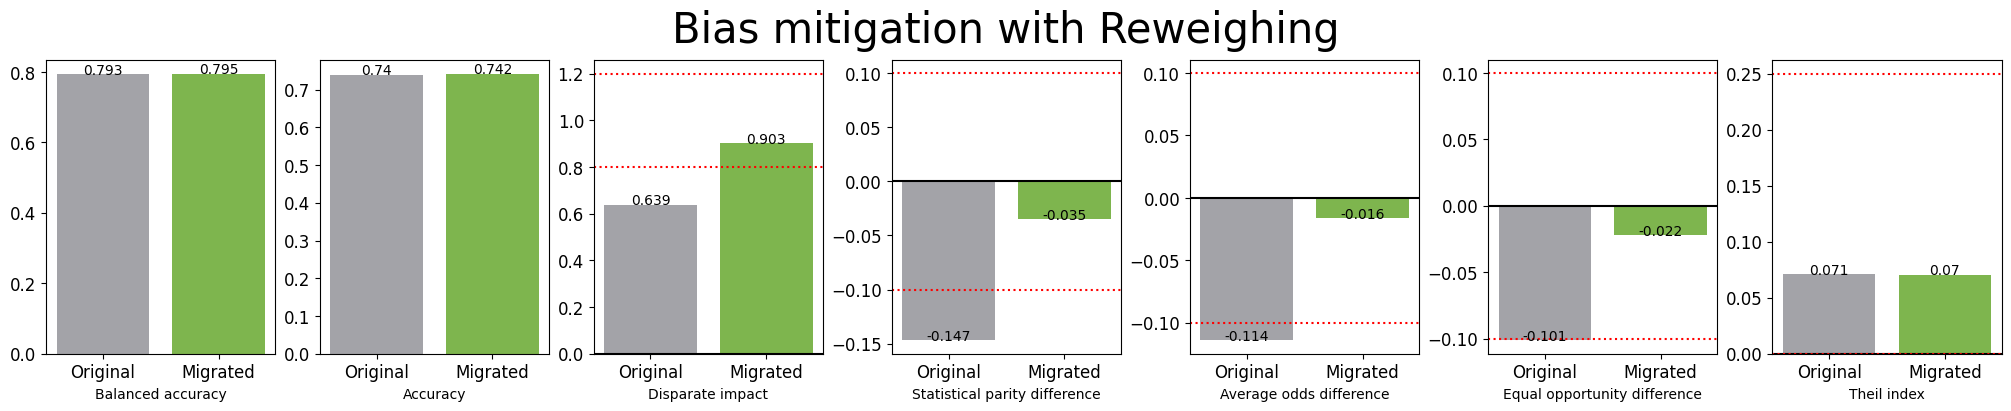

#### For method Reweighing :

Bias against unprivileged group detected in **0** out of 5 metrics

Balanced accuracy variation **0.002** 

In [ ]:
barplot_metrics(OR_metrics, RW_metrics, 'Reweighing' )

Από τα διαγράμματα διαπιστώνεται πως μετά την εφαρμογή της μεθόδου το bias είναι εντός ορίων, σύμφωνα και με τα πέντε bias metrics χωρίς να έχει μειωθεί τόσο η accuracy όσο και η balanced accuracy.


##Disparate Impact Remover (DIR)

Η μέθοδος Disparate Impact Remover αποτελεί μια ακόμη pre-proccesing μέθοδο για την μείωση του bias.

Το repair level είναι η παράμετρος της μεθόδου που θα πρέπει να ορισθεί απο τον χρήστη.

Για να βρεθεί το optimal repair level για την μείωση του bias, θα χρησιμοποιηθούν διάφορες τιμές για το repair level στο έυρος τιμών 0-1 ώστε να τροποιηθούν οι τιμές των attributes στο training dataset. Έπειτα βάση των τροποποιημένων dataset θα εκπαιδευτουν μοντέλα Logistic Regression και να αξιολογηθεί η απόδοση τους.

Πηγή: https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_disparate_impact_remover.ipynb

In [ ]:
DIR_dataset_orig_train = dataset_orig_train.copy(deepcopy=True)
DIR_dataset_orig_valid = dataset_orig_valid.copy(deepcopy=True)
DIR_dataset_orig_test = dataset_orig_test.copy(deepcopy=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=False).fit(DIR_dataset_orig_train.features)

DIR_dataset_orig_train.features = scaler.transform(DIR_dataset_orig_train.features)
DIR_dataset_orig_valid.features = scaler.transform(DIR_dataset_orig_valid.features)
DIR_dataset_orig_test.features = scaler.transform(DIR_dataset_orig_test.features)


In [ ]:
!pip install BlackBoxAuditing
DIR_bal_acc_arr = []
DIR_acc_arr = []
DIR_disp_imp_arr = []
DIR_stat_par_diff_arr = []
DIR_avg_odds_diff_arr = []
DIR_eq_opp_diff_arr = []
DIR_theil_ind_arr = []

levels = 11
DIR_repair_level_arr = np.linspace(0., 1., levels)


index = DIR_dataset_orig_train.feature_names.index(dataset_orig_train.protected_attribute_names[0])

thresh = 0.10

for level in tqdm(DIR_repair_level_arr):
    DIR = DisparateImpactRemover(repair_level=level)
    DIR_dataset_transf_train = DIR.fit_transform(DIR_dataset_orig_train)
    DIR_dataset_transf_valid = DIR.fit_transform(DIR_dataset_orig_valid)

    X_train = np.delete(DIR_dataset_transf_train.features, index, axis=1)
    y_train = DIR_dataset_transf_train.labels.ravel()
    X_valid = np.delete(DIR_dataset_transf_valid.features, index, axis=1)


    LR_DIR = LogisticRegression(solver='liblinear')
    LR_DIR.fit(X_train, y_train, sample_weight=DIR_dataset_transf_train.instance_weights)

    DIR_dataset_transf_valid_pred = DIR_dataset_transf_valid.copy()

    DIR_dataset_transf_valid_pred.scores = LR_DIR.predict_proba(X_valid)[:,fav_idx].reshape(-1,1)

    DIR_dataset_transf_valid_pred.labels = (DIR_dataset_transf_valid_pred.scores > thresh).astype(np.double)

    DIR_metric_valid = compute_metrics(DIR_dataset_transf_valid, DIR_dataset_transf_valid_pred,
                                      unprivileged_groups, privileged_groups,
                                      disp = False)

    DIR_bal_acc_arr.append(DIR_metric_valid["Balanced accuracy"])
    DIR_acc_arr.append(DIR_metric_valid["Accuracy"])
    DIR_disp_imp_arr.append(DIR_metric_valid["Disparate impact"])
    DIR_stat_par_diff_arr.append(DIR_metric_valid["Statistical parity difference"])
    DIR_avg_odds_diff_arr.append(DIR_metric_valid["Average odds difference"])
    DIR_eq_opp_diff_arr.append(DIR_metric_valid["Equal opportunity difference"])
    DIR_theil_ind_arr.append(DIR_metric_valid["Theil index"])

DIR_repair_level_best_ind = np.where(DIR_bal_acc_arr == np.max(DIR_bal_acc_arr))[0][0]
DIR_thresh_arr_best = DIR_repair_level_arr[DIR_repair_level_best_ind]

DIR_best_bal_acc = DIR_bal_acc_arr[DIR_repair_level_best_ind]

print(".")
print("Best balanced accuracy  = %.4f" % DIR_best_bal_acc)
print("Optimal repair level  = %.4f" % DIR_thresh_arr_best)
print("Accuracy = %.4f" % DIR_acc_arr[DIR_repair_level_best_ind])
print("Disparate impact = %.4f" % DIR_disp_imp_arr[DIR_repair_level_best_ind])
print("Statistical parity difference = %.4f" % DIR_stat_par_diff_arr[DIR_repair_level_best_ind])
print("Average odds difference = %.4f" % DIR_avg_odds_diff_arr[DIR_repair_level_best_ind])
print("Equal opportunity difference = %.4f" % DIR_eq_opp_diff_arr[DIR_repair_level_best_ind])
print("Theil index = %.4f" % DIR_theil_ind_arr[DIR_repair_level_best_ind])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394754 sha256=704eb051e72628031506fec3554f81c7b4e0aeac0c9e8a167362a2f4299a8cc2
  Stored in directory: /root/.cache/pip/wheels/c0/4f/b1/80e1b0790df07536470758fe0a4f9ff8fa942fd9fe30bbb192
Successfully built BlackBoxAuditing


100%|██████████| 11/11 [00:59<00:00,  5.41s/it]

.
Best balanced accuracy  = 0.7764
Optimal repair level  = 0.0000
Accuracy = 0.7219
Disparate impact = 0.7811
Statistical parity difference = -0.0853
Average odds difference = -0.0510
Equal opportunity difference = -0.0327
Theil index = 0.0726


Το μοντέλο με την μεγαλύτερη balanced accuracy είναι αυτό που εκπαιδεύτηκε στο dataset όπου το repair level είναι μηδέν και κατά συνέπεια το training dataset δεν έχει τροποποιηθεί από την μέθοδο Disparate Impact Remover.

Το αποτέλεσμα αυτό είναι σε αρκετές περιπτώσεις αναμενόμενο καθώς η μείωση του bias μπορεί να επιφέρει μια μικρή μείωση στην accuracy του αλγορίθμου.

Από τα bias metrics το μόνο που είναι εκτός ορίων είναι το Disparate impact, που αποτελεί όμως το βασικό bias metric της μεθόδου. Για τον λόγο αυτό θα επιλεγεί να εφαρμοστεί το μικρότερο repair level που θέτει το metric disparate impact εντός ορίων.

Βάση του διαγράμματος που απεικονίζει την εξέλιξη της τιμής του disparate impact σε σχέση με το repair level φαίνεται πως η τιμή 0,4 είναι η τιμή που πληροί το κριτήρια που τέθηκε παραπάνω, οπότε και θα χρησιμοποιηθεί ως παράμετρος της μεθόδου.


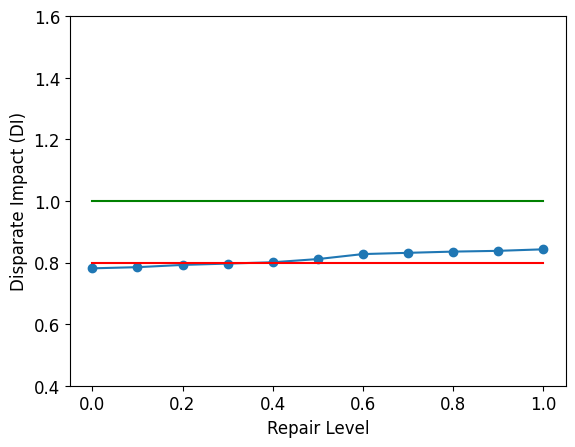

In [ ]:
%matplotlib inline
plt.plot(DIR_repair_level_arr, DIR_disp_imp_arr, marker='o')
plt.plot([0, 1], [1, 1], 'g')
plt.plot([0, 1], [0.8, 0.8], 'r')
plt.ylim([0.4, 1.6])
plt.ylabel('Disparate Impact (DI)')
plt.xlabel('Repair Level')
plt.show()

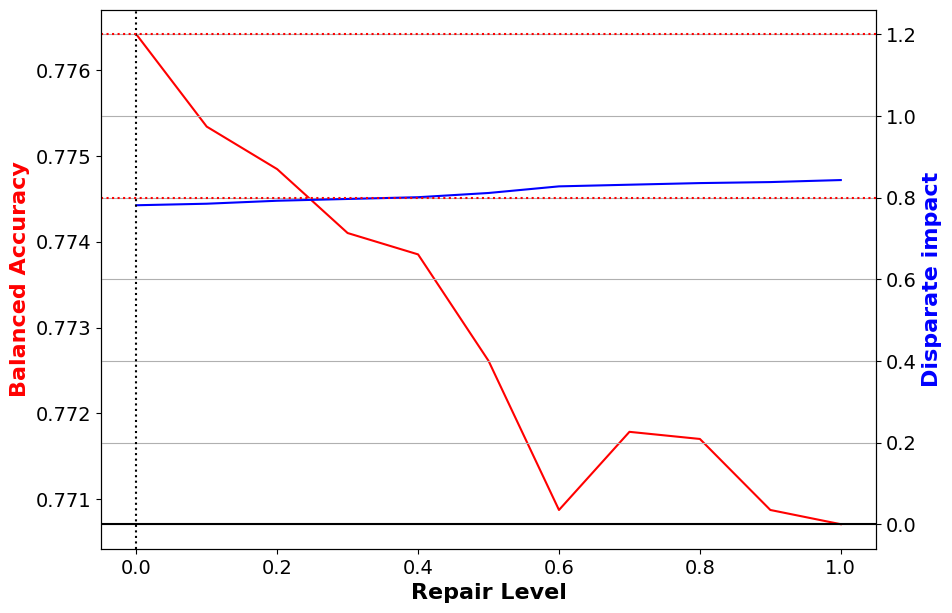

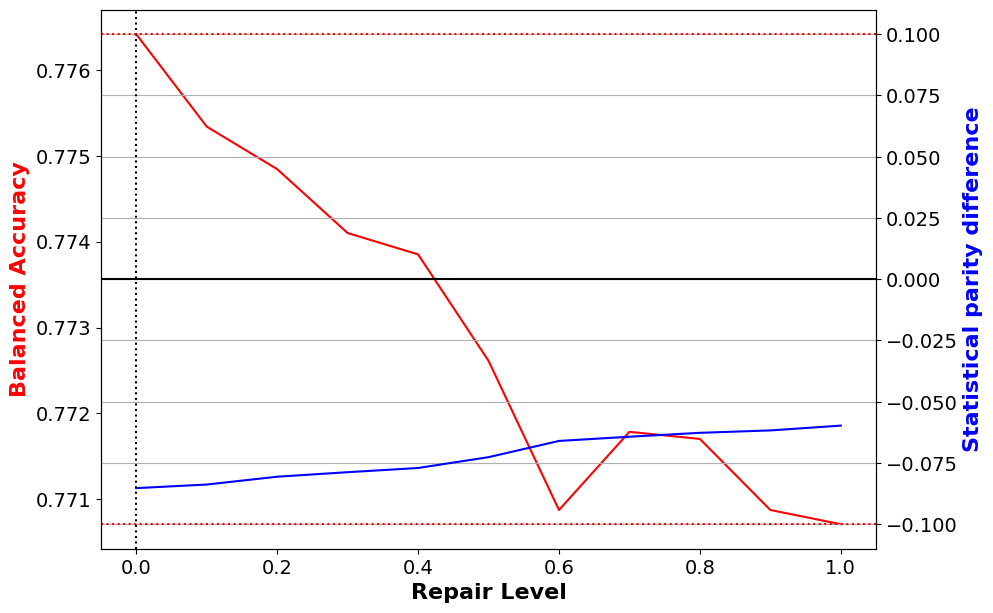

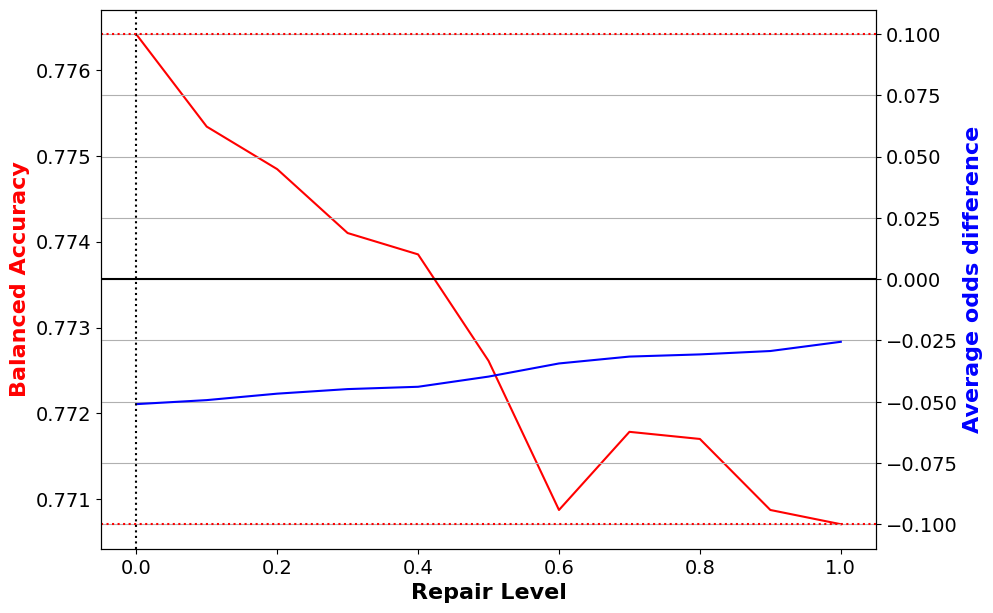

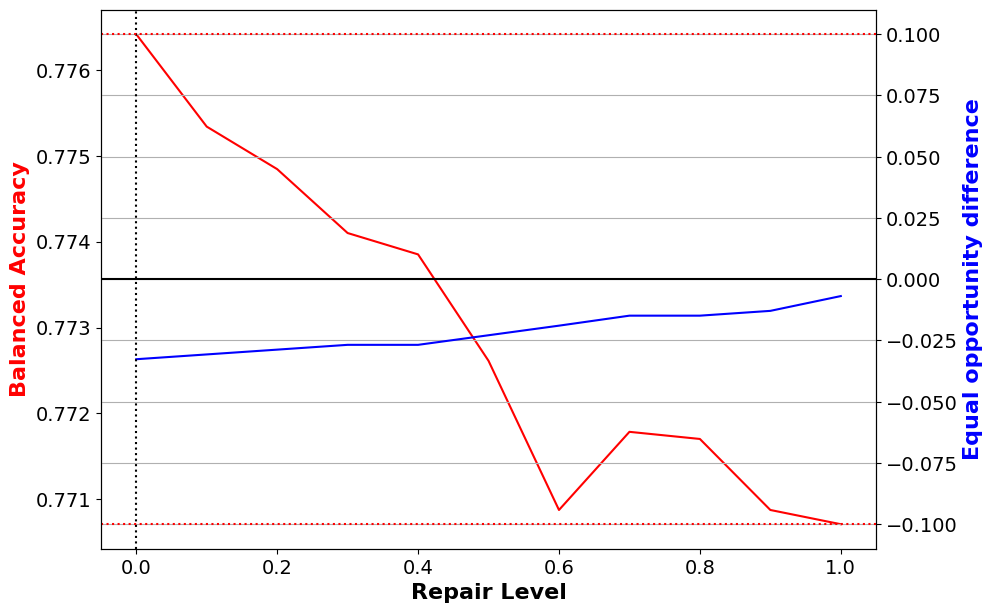

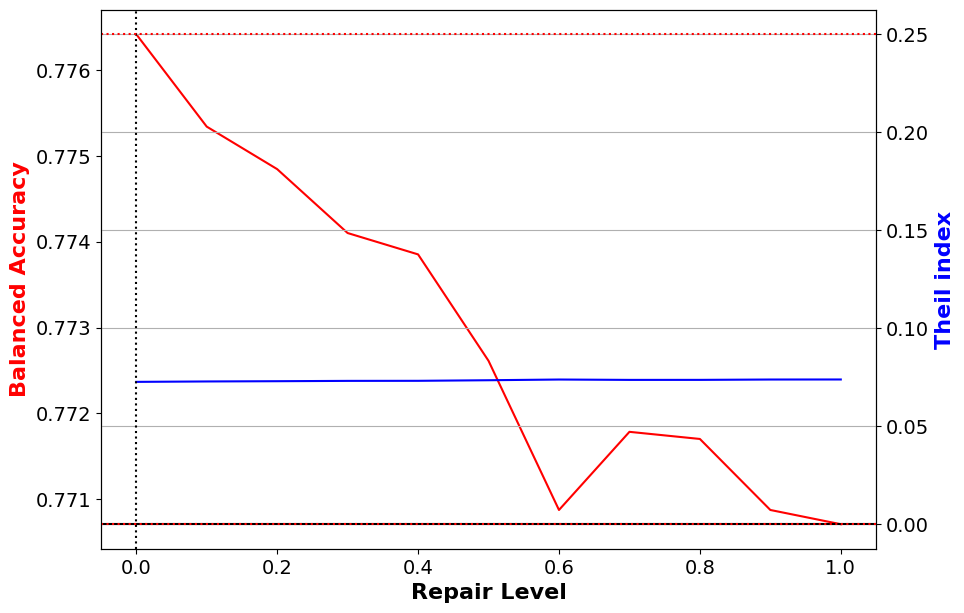

In [ ]:
arr=[DIR_disp_imp_arr, DIR_stat_par_diff_arr, DIR_avg_odds_diff_arr, DIR_eq_opp_diff_arr, DIR_theil_ind_arr]

for i in range(2,len(metrics)):
  plot_metric(DIR_repair_level_arr, 'Repair Level', DIR_repair_level_best_ind, DIR_bal_acc_arr, 'Balanced Accuracy', arr[i-2] , metrics[i] )

### Plot of balanced accuracy and output fairness vs Repair Level

#### The graph illustrates the affect on fairness metrics for various values of Repair Level

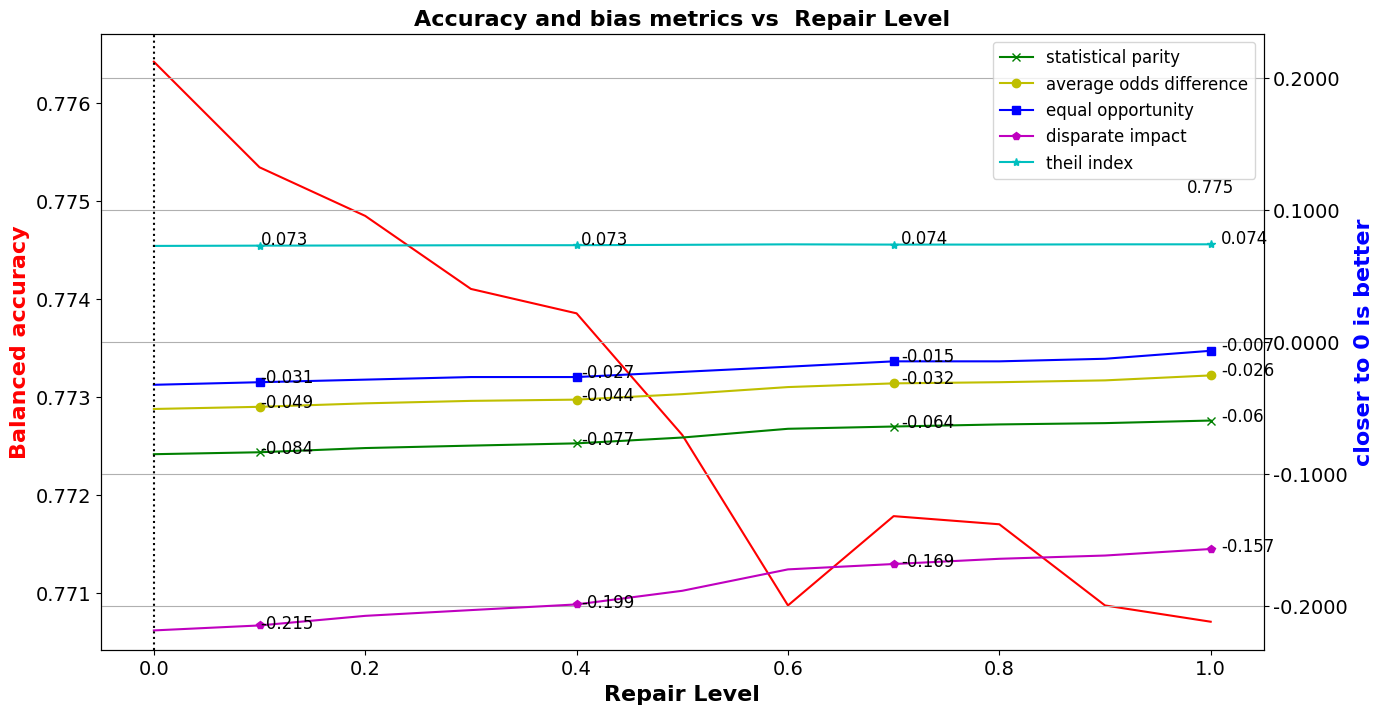

In [ ]:
plot_all_metrics(DIR_stat_par_diff_arr,DIR_avg_odds_diff_arr, DIR_eq_opp_diff_arr, DIR_disp_imp_arr, DIR_theil_ind_arr, DIR_bal_acc_arr,DIR_repair_level_arr, DIR_repair_level_best_ind, 1, 10, 4, 'Repair Level' )

In [ ]:

DIR = DisparateImpactRemover(repair_level=0.4)
DIR_dataset_transf_train = DIR.fit_transform(DIR_dataset_orig_train)
DIR_dataset_transf_test = DIR.fit_transform(DIR_dataset_orig_test)

X_train = np.delete(DIR_dataset_transf_train.features, index, axis=1)
y_train = DIR_dataset_transf_train.labels.ravel()
X_test = np.delete(DIR_dataset_transf_test.features, index, axis=1)


LR_DIR = LogisticRegression(solver='liblinear')
LR_DIR.fit(X_train, y_train, sample_weight=DIR_dataset_transf_train.instance_weights)


DIR_dataset_transf_test_pred = DIR_dataset_transf_test.copy()


DIR_dataset_transf_test_pred.scores = LR_DIR.predict_proba(X_test)[:,fav_idx].reshape(-1,1)

DIR_dataset_transf_test_pred.labels = (DIR_dataset_transf_test_pred.scores > thresh).astype(np.double)

In [ ]:
DIR_metric_test = compute_metrics(DIR_dataset_transf_test, DIR_dataset_transf_test_pred,
                unprivileged_groups, privileged_groups)
DIR_metrics=[]
for m in metrics:
  DIR_metrics.append(DIR_metric_test.get(m))

Balanced accuracy = 0.7798
Accuracy = 0.7212
Disparate impact = 0.8740
Statistical parity difference = -0.0487
Average odds difference = -0.0224
Equal opportunity difference = -0.0171
Theil index = 0.0731


<ipython-input-4-929b97642671>:60: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(metrics), i+1)


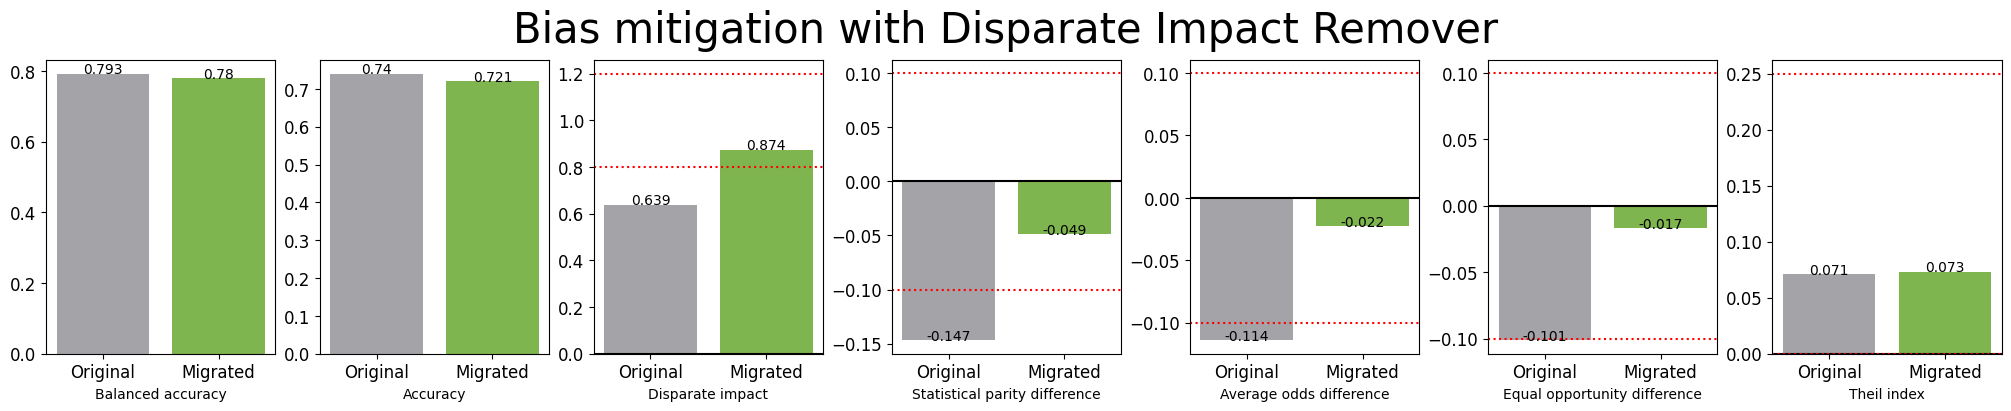

#### For method Disparate Impact Remover :

Bias against unprivileged group detected in **0** out of 5 metrics

Balanced accuracy variation **-0.013** 

In [ ]:
barplot_metrics(OR_metrics, DIR_metrics, 'Disparate Impact Remover' )

Μια αρχική διαπίσττωση είναι πως η τιμή του repair level εκτός της disparate impact δεν επηρεάσε σε μεγάλο βαθμό τις τιμές των υπολοίπων bias metrics. Από την περαιτέρω αξιολόγηση του επιλεγμένου μοντέλου διαπιστώνεται πως η επιλογή ενός μεγαλύτερου repair level οδήγησε σε πολύ μικρή μείωση της balanced accuracy, ενώ από την άλλη παρατηρείται μια μικρή αύξηση της accuracy.

##Learning Fair Representations (LFR)

To Learning Fair Representations είναι η τελευταία Pre-Processing μέθοδος που θα δοκιμαστεί. Βασική παράμετρος της μεθόδου είναι αριθμός των prototypes (k) που θα υπάρξουν και θα αποτελούν τις ενδιάμεσες αναπαράστασης αντικειμένων.

Το προεπιλεγμένο πλήθος των prototypes είναι 5 αλλά για τις ανάγκες της εργασίας θα δοκιμαστεί η απόδοση της μεθόδου υλοποιώντας σενάρια όπου το πλήθος των prototypes είναι 5,9,13,17,21,25 και 29.


Πηγή: https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_lfr.ipynb

In [ ]:
LFR_dataset_orig_train = dataset_orig_train.copy(deepcopy=True)
LFR_dataset_orig_valid = dataset_orig_valid.copy(deepcopy=True)
LFR_dataset_orig_test = dataset_orig_test.copy(deepcopy=True)

In [ ]:
scale_orig = StandardScaler()
LFR_dataset_orig_train.features = scale_orig.fit_transform(LFR_dataset_orig_train.features)
LFR_dataset_orig_valid.features = scale_orig.transform(LFR_dataset_orig_valid.features)
LFR_dataset_orig_test.features = scale_orig.transform(LFR_dataset_orig_test.features)

In [ ]:
LFR_bal_acc_arr = []
LFR_acc_arr = []
LFR_disp_imp_arr = []
LFR_stat_par_diff_arr = []
LFR_avg_odds_diff_arr = []
LFR_eq_opp_diff_arr = []
LFR_theil_ind_arr = []



thresh = 0.10

steps = 7
LFR_thresh_arr = np.linspace(5, 29, steps)

for k in tqdm(LFR_thresh_arr):
  LFR_ = LFR(unprivileged_groups=unprivileged_groups,
          privileged_groups=privileged_groups,
          k = int(k), Ax=0.1, Ay=1.0, Az=2.0,
          verbose=1, seed=1
          )



  LFR_ = LFR_.fit(LFR_dataset_orig_train, maxiter=5000, maxfun=5000)



  LFR_dataset_transf_train = LFR_.transform(LFR_dataset_orig_train)
  LFR_dataset_transf_valid = LFR_.transform(LFR_dataset_orig_valid)


  X_train = LFR_dataset_transf_train.features
  y_train = LFR_dataset_transf_train.labels.ravel()

  LR_LFR = LogisticRegression()
  LR_LFR.fit(X_train, y_train, sample_weight=LFR_dataset_transf_train.instance_weights)
  fav_idx = int(LFR_dataset_transf_train.favorable_label)


  LFR_dataset_transf_valid_pred = LFR_dataset_transf_valid.copy()
  X_valid = LFR_dataset_transf_valid_pred.features
  y_valid = LFR_dataset_transf_valid_pred.labels

  LFR_dataset_transf_valid_pred.scores = LR_LFR.predict_proba(X_valid)[:,fav_idx].reshape(-1,1)

  LFR_dataset_transf_valid_pred.labels = (LFR_dataset_transf_valid_pred.scores > thresh).astype(np.double)

  print(k)

  LFR_metric_valid = compute_metrics(LFR_dataset_transf_valid, LFR_dataset_transf_valid_pred,
                                        unprivileged_groups, privileged_groups,
                                        disp = True)

  LFR_bal_acc_arr.append(LFR_metric_valid["Balanced accuracy"])
  LFR_acc_arr.append(LFR_metric_valid["Accuracy"])
  LFR_disp_imp_arr.append(LFR_metric_valid["Disparate impact"])
  LFR_stat_par_diff_arr.append(LFR_metric_valid["Statistical parity difference"])
  LFR_avg_odds_diff_arr.append(LFR_metric_valid["Average odds difference"])
  LFR_eq_opp_diff_arr.append(LFR_metric_valid["Equal opportunity difference"])
  LFR_theil_ind_arr.append(LFR_metric_valid["Theil index"])




  0%|          | 0/7 [00:00<?, ?it/s]

step: 0, loss: 0.7772367745108925, L_x: 2.4548920232435565,  L_y: 0.4659812453358446,  L_z: 0.032883163425346106
step: 250, loss: 0.63825903376829, L_x: 2.4480495886160023,  L_y: 0.3470930219233359,  L_z: 0.02318052649167688
step: 500, loss: 0.5911760131362432, L_x: 2.413722758400744,  L_y: 0.3383681958861088,  L_z: 0.0057177707050300565
step: 750, loss: 0.5879804264802169, L_x: 2.4108657647232397,  L_y: 0.3373996596447688,  L_z: 0.004747095181562017
step: 1000, loss: 0.5731055612951147, L_x: 2.355517725382895,  L_y: 0.3286479542655973,  L_z: 0.004452917245613997
step: 1250, loss: 0.5156366004154466, L_x: 2.0904914503674044,  L_y: 0.292850884991476,  L_z: 0.006868285193615075
step: 1500, loss: 0.4920367248192884, L_x: 1.902059452676343,  L_y: 0.28842091523370517,  L_z: 0.00670493215897445
step: 1750, loss: 0.47766301868197614, L_x: 1.884844318560479,  L_y: 0.2819298096262908,  L_z: 0.0036243885998187425
step: 2000, loss: 0.47055295401965835, L_x: 1.8733261870115805,  L_y: 0.28045171097

 14%|█▍        | 1/7 [03:01<18:10, 181.67s/it]

5.0
Balanced accuracy = 0.9973
Accuracy = 0.9948
Disparate impact = 1.0209
Statistical parity difference = 0.0007
Average odds difference = -0.0003
Equal opportunity difference = 0.0000
Theil index = 0.0020
step: 0, loss: 0.7139699545971501, L_x: 2.4684119046629744,  L_y: 0.44443915615249163,  L_z: 0.011344803989180469
step: 250, loss: 0.6574386217679866, L_x: 2.465546190427036,  L_y: 0.3892976952104623,  L_z: 0.010793153757410369
step: 500, loss: 0.6256371635273998, L_x: 2.4556061791537624,  L_y: 0.3614342873424844,  L_z: 0.00932112913476958
step: 750, loss: 0.622767070600113, L_x: 2.452583712727213,  L_y: 0.3598348501709025,  L_z: 0.008836924578244617
step: 1000, loss: 0.6023099445863722, L_x: 2.4090915821709897,  L_y: 0.35404141204937006,  L_z: 0.003679687159951567
step: 1250, loss: 0.5936907356951973, L_x: 2.366918460330612,  L_y: 0.34536791094548697,  L_z: 0.005815489358324539
step: 1500, loss: 0.5912430597405788, L_x: 2.3532872134222074,  L_y: 0.3437678537539709,  L_z: 0.00607324

 29%|██▊       | 2/7 [05:58<14:55, 179.11s/it]

9.0
Balanced accuracy = 0.9968
Accuracy = 0.9938
Disparate impact = 0.9652
Statistical parity difference = -0.0012
Average odds difference = 0.0004
Equal opportunity difference = 0.0000
Theil index = 0.0024
step: 0, loss: 0.7383098536332876, L_x: 2.458938419081244,  L_y: 0.4789690288166414,  L_z: 0.006723491454260876
step: 250, loss: 0.6773815693019242, L_x: 2.456533177076956,  L_y: 0.41859551111406196,  L_z: 0.006566370240083269
step: 500, loss: 0.6059179555877823, L_x: 2.441009678116348,  L_y: 0.35056609193040905,  L_z: 0.005625447922869213
step: 750, loss: 0.6023889193012795, L_x: 2.43947008159376,  L_y: 0.34750696290625865,  L_z: 0.005467474117822376
step: 1000, loss: 0.5998961545809597, L_x: 2.435446353166954,  L_y: 0.3459249778329177,  L_z: 0.005213270715673299
step: 1250, loss: 0.594854580391962, L_x: 2.421532389279472,  L_y: 0.3437952117644609,  L_z: 0.004453064849776971
step: 1500, loss: 0.5852897808649047, L_x: 2.38839551974438,  L_y: 0.3393826267675923,  L_z: 0.0035338010614

 43%|████▎     | 3/7 [09:23<12:42, 190.70s/it]

13.0
Balanced accuracy = 0.9968
Accuracy = 0.9938
Disparate impact = 0.7500
Statistical parity difference = -0.0089
Average odds difference = 0.0009
Equal opportunity difference = 0.0000
Theil index = 0.0024
step: 0, loss: 0.7846699449575728, L_x: 2.501737321090393,  L_y: 0.523471317196753,  L_z: 0.005512447825890254
step: 250, loss: 0.7846699735815051, L_x: 2.5017373594709666,  L_y: 0.5234713444754576,  L_z: 0.005512446579475409
step: 500, loss: 0.7277258327370058, L_x: 2.499643727296721,  L_y: 0.4668832119269821,  L_z: 0.005439124040175751
step: 750, loss: 0.6255577000115686, L_x: 2.481256990173298,  L_y: 0.366813985148961,  L_z: 0.005309007922638899
step: 1000, loss: 0.6213550367745362, L_x: 2.480179018717103,  L_y: 0.36309927998619246,  L_z: 0.005118927458316689
step: 1250, loss: 0.6165593502377898, L_x: 2.4760806876497674,  L_y: 0.3589594288191408,  L_z: 0.00499592632683616
step: 1500, loss: 0.6105583294162317, L_x: 2.4653388062784756,  L_y: 0.35482723800403576,  L_z: 0.0045986053

 57%|█████▋    | 4/7 [13:47<10:59, 219.77s/it]

17.0
Balanced accuracy = 0.9960
Accuracy = 0.9922
Disparate impact = 0.5959
Statistical parity difference = -0.0105
Average odds difference = -0.0029
Equal opportunity difference = 0.0000
Theil index = 0.0030
step: 0, loss: 0.8001719783683089, L_x: 2.502039151981624,  L_y: 0.5368400866340007,  L_z: 0.00656398826807288
step: 250, loss: 0.8001720200798353, L_x: 2.5020391771814308,  L_y: 0.5368401258713242,  L_z: 0.00656398824518401
step: 500, loss: 0.7459748006772028, L_x: 2.5004708624007206,  L_y: 0.482873181462076,  L_z: 0.006527266487527406
step: 750, loss: 0.615234659553208, L_x: 2.4830192535975493,  L_y: 0.3546465303194738,  L_z: 0.0061431019369896514
step: 1000, loss: 0.6152346634410126, L_x: 2.4830192576622268,  L_y: 0.35464653023951764,  L_z: 0.00614310371763613
step: 1250, loss: 0.612370889117896, L_x: 2.47717854997026,  L_y: 0.35262316453779086,  L_z: 0.006014934791539536
step: 1500, loss: 0.6057222248241793, L_x: 2.456497091214324,  L_y: 0.3487968130678621,  L_z: 0.00563785131

 71%|███████▏  | 5/7 [18:38<08:10, 245.28s/it]

21.0
Balanced accuracy = 0.9970
Accuracy = 0.9941
Disparate impact = 0.7911
Statistical parity difference = -0.0075
Average odds difference = -0.0016
Equal opportunity difference = 0.0000
Theil index = 0.0022
step: 0, loss: 0.8831691970860236, L_x: 2.4860279277817163,  L_y: 0.6248647538023746,  L_z: 0.004850825252738666
step: 250, loss: 0.8831692360835078, L_x: 2.486027941087344,  L_y: 0.624864783593897,  L_z: 0.00485082919043821
step: 500, loss: 0.8155085081124989, L_x: 2.4850458228391235,  L_y: 0.5573506800593212,  L_z: 0.004826622884632663
step: 750, loss: 0.8155085101757374, L_x: 2.485045901865621,  L_y: 0.557350682754722,  L_z: 0.004826618617226641
step: 1000, loss: 0.6192551220313157, L_x: 2.4706875067139435,  L_y: 0.3629652413021723,  L_z: 0.00461056502887451
step: 1250, loss: 0.619255114448842, L_x: 2.470687471558124,  L_y: 0.36296523751551435,  L_z: 0.004610564888757622
step: 1500, loss: 0.6146765172426574, L_x: 2.461904663494383,  L_y: 0.359680279230112,  L_z: 0.0044028858315

 86%|████████▌ | 6/7 [23:54<04:29, 269.55s/it]

25.0
Balanced accuracy = 0.9994
Accuracy = 0.9988
Disparate impact = 0.8069
Statistical parity difference = -0.0011
Average odds difference = 0.0005
Equal opportunity difference = 0.0000
Theil index = 0.0005
step: 0, loss: 0.8504904183591842, L_x: 2.4923530571669255,  L_y: 0.5943078398302275,  L_z: 0.0034736364061320833
step: 250, loss: 0.8504903868142939, L_x: 2.492353071648533,  L_y: 0.5943078069979557,  L_z: 0.0034736363257424317
step: 500, loss: 0.7964431070135981, L_x: 2.4914919797630892,  L_y: 0.5403669313039002,  L_z: 0.003463488866694477
step: 750, loss: 0.7964426778068269, L_x: 2.4914919925252645,  L_y: 0.540366500017574,  L_z: 0.003463489268363228
step: 1000, loss: 0.6116855963538459, L_x: 2.4764374538792913,  L_y: 0.3574607252510762,  L_z: 0.003290562857420306
step: 1250, loss: 0.6116854923925009, L_x: 2.4764374649123106,  L_y: 0.35746062133506745,  L_z: 0.003290562283101186
step: 1500, loss: 0.6060444164893513, L_x: 2.465773296098952,  L_y: 0.35314467433827795,  L_z: 0.0031

100%|██████████| 7/7 [30:05<00:00, 257.97s/it]

29.0
Balanced accuracy = 0.9993
Accuracy = 0.9985
Disparate impact = 0.6621
Statistical parity difference = -0.0007
Average odds difference = -0.0003
Equal opportunity difference = 0.0000
Theil index = 0.0006


In [ ]:
LFR_k_best_ind = np.where(LFR_bal_acc_arr == np.max(LFR_bal_acc_arr))[0][0]


LFR_best_bal_acc = LFR_bal_acc_arr[LFR_k_best_ind]

print(".")
print("Best balanced accuracy  = %.4f" % LFR_best_bal_acc)
print("Optimal number of prototypes  = %.4f" % LFR_thresh_arr[LFR_k_best_ind])
print("Accuracy = %.4f" % LFR_acc_arr[LFR_k_best_ind])
print("Disparate impact = %.4f" % LFR_disp_imp_arr[LFR_k_best_ind])
print("Statistical parity difference = %.4f" % LFR_stat_par_diff_arr[LFR_k_best_ind])
print("Average odds difference = %.4f" % LFR_avg_odds_diff_arr[LFR_k_best_ind])
print("Equal opportunity difference = %.4f" % LFR_eq_opp_diff_arr[LFR_k_best_ind])
print("Theil index = %.4f" % LFR_theil_ind_arr[LFR_k_best_ind])

.
Best balanced accuracy  = 0.9994
Optimal number of prototypes  = 25.0000
Accuracy = 0.9988
Disparate impact = 0.8069
Statistical parity difference = -0.0011
Average odds difference = 0.0005
Equal opportunity difference = 0.0000
Theil index = 0.0005


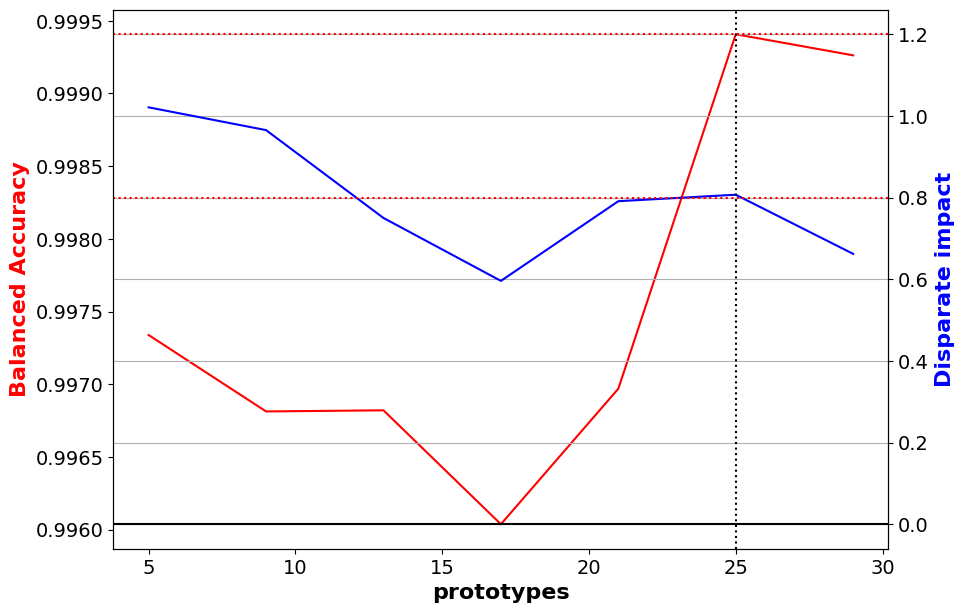

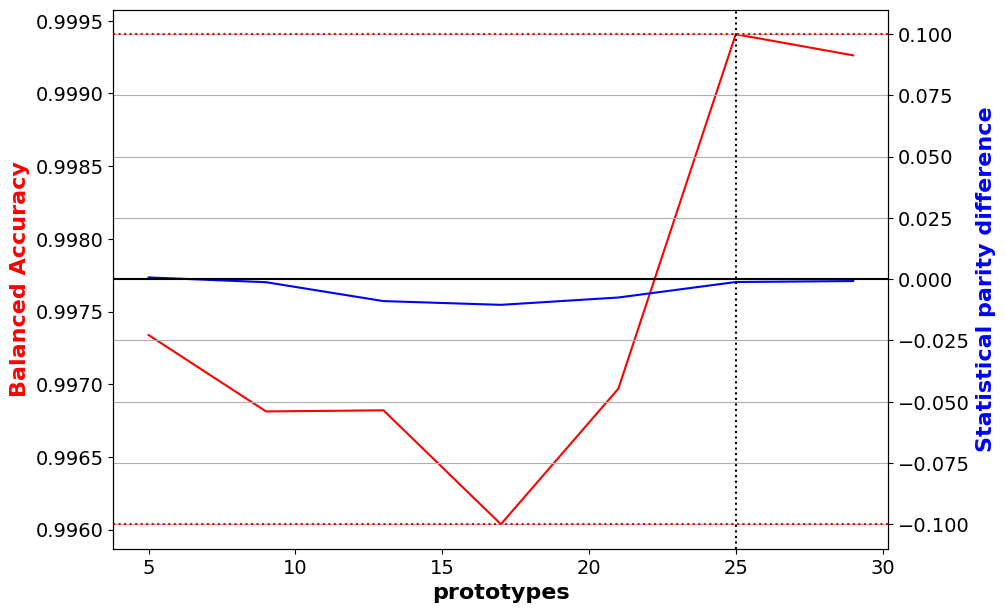

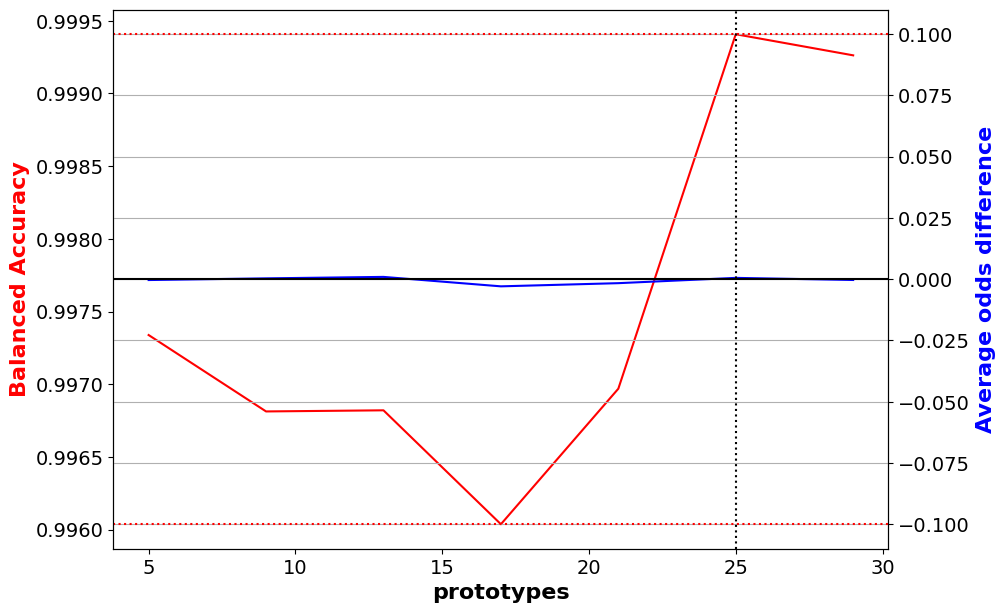

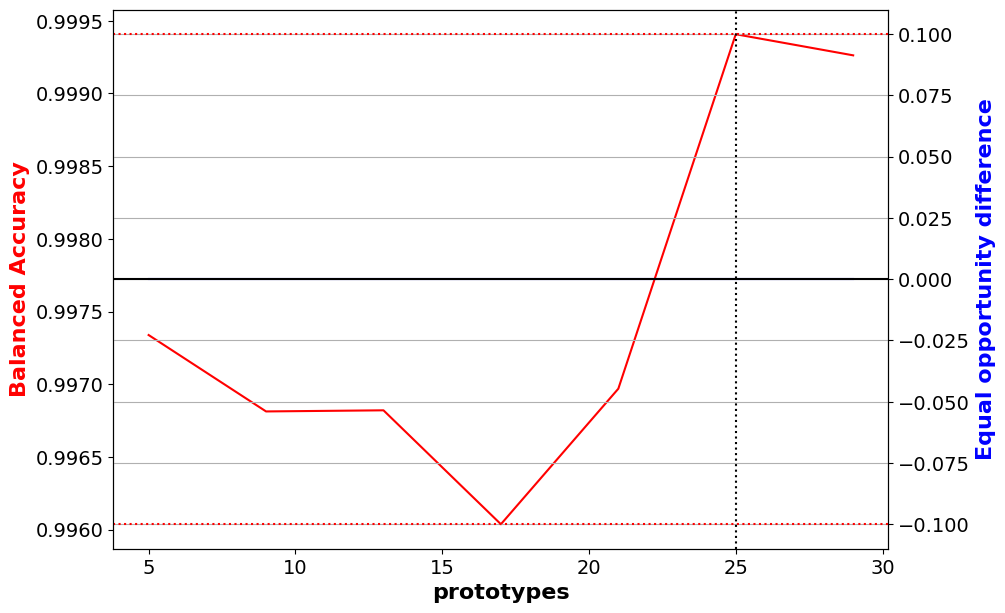

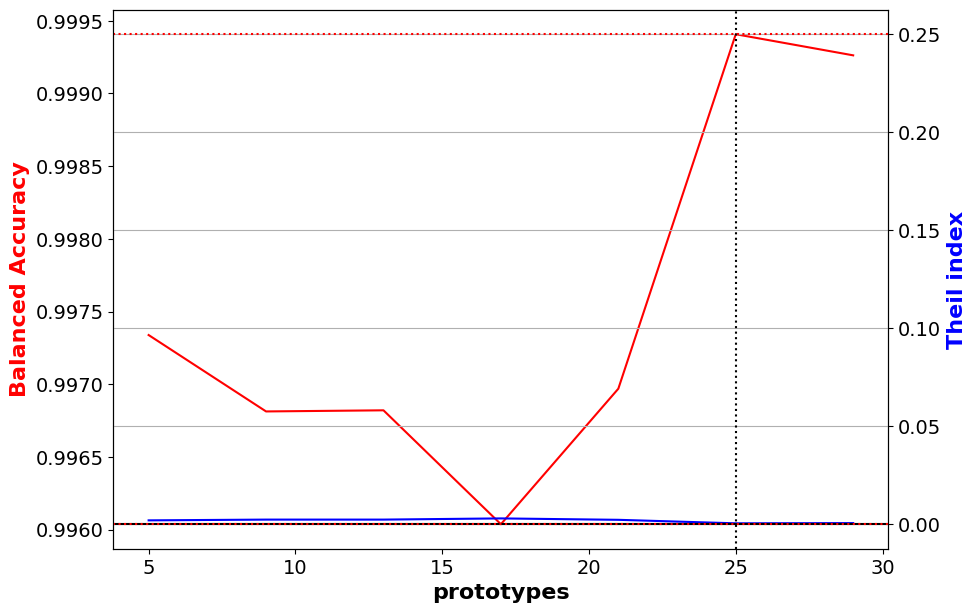

In [ ]:
arr=[LFR_disp_imp_arr, LFR_stat_par_diff_arr, LFR_avg_odds_diff_arr, LFR_eq_opp_diff_arr, LFR_theil_ind_arr]

for i in range(2,len(metrics)):
  plot_metric(LFR_thresh_arr, 'prototypes', LFR_k_best_ind, LFR_bal_acc_arr, 'Balanced Accuracy', arr[i-2] , metrics[i] )

### Plot of balanced accuracy and output fairness vs prototypes

#### The graph illustrates the affect on fairness metrics for various values of prototypes

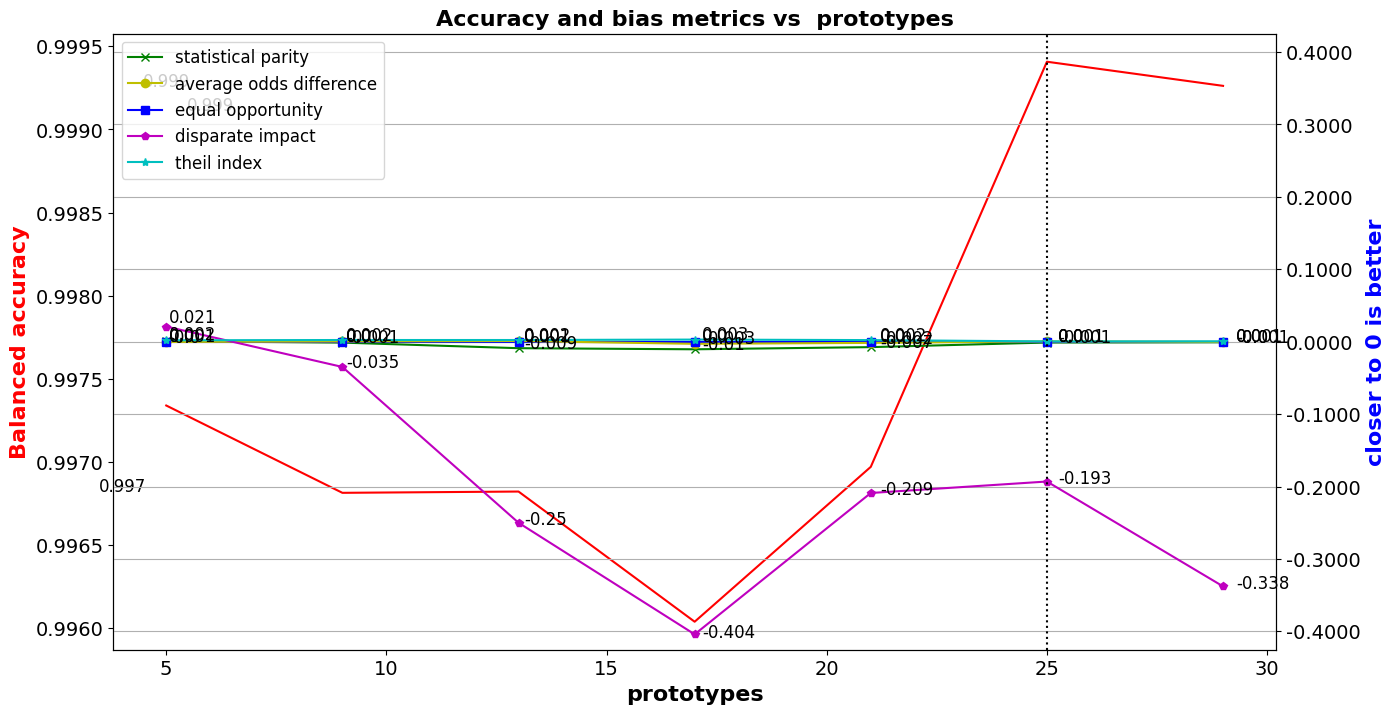

In [ ]:
plot_all_metrics(LFR_stat_par_diff_arr,LFR_avg_odds_diff_arr, LFR_eq_opp_diff_arr, LFR_disp_imp_arr, LFR_theil_ind_arr, LFR_bal_acc_arr, LFR_thresh_arr, LFR_k_best_ind, 0 , 6 , 7, 'prototypes'  )

Εξετάζοντας το διάγραμμα με την εξέλιξη των τιμών της balanced accuracy και των bias metrics σε σχέση με τον αριθμό των prototypes, παρατηρείται καταρχάς πως ο αριθμός των prototypes που απέδωσε την μέγιστη balanced accuracy είναι το 25. Επίσης παρατηρείται πως το πλήθος των prototypes δεν διαφοροποιεί σημαντικά τόσο τα bias metrics όσο και την balanced accuracy καθώς σε όλα τα σενάρια της μεθόδου Learning Fair Representations οι τιμές τους παρουσιάζουν πολλές μικρές μεταβολές και είναι κοντά στην βέλτιστη τιμή. Εξαίρεση αποτελεί η μετρική disparate impact όπου φαίνεται πως η τιμή της έχει πολύ μεγάλες μεταβολές οι οποίες ακολουθούν τις πολύ μικρές μεταβολές της τιμής της balanced accuracy. Μάλιστα υπάρχουν και περιπτώσεις όπου η τιμή της είναι ακόμη και κάτω από το κατώτατο όριο του fairness.

In [ ]:
LFR_ = LFR(unprivileged_groups=unprivileged_groups,
      privileged_groups=privileged_groups,
      k = int(LFR_thresh_arr[LFR_k_best_ind]), Ax=0.1, Ay=1.0, Az=2.0,
      verbose=1, seed=1
      )

LFR_ = LFR_.fit(LFR_dataset_orig_train, maxiter=5000 , maxfun=5000)



LFR_dataset_transf_train = LFR_.transform(LFR_dataset_orig_train)
LFR_dataset_transf_test = LFR_.transform(LFR_dataset_orig_test)


X_train = LFR_dataset_transf_train.features
y_train = LFR_dataset_transf_train.labels.ravel()

LR_LFR = LogisticRegression()
LR_LFR.fit(X_train, y_train, sample_weight=LFR_dataset_transf_train.instance_weights)
fav_idx = int(LFR_dataset_transf_train.favorable_label)


LFR_dataset_transf_test_pred = LFR_dataset_transf_test.copy()
X_test = LFR_dataset_transf_test_pred.features
y_test = LFR_dataset_transf_test_pred.labels

LFR_dataset_transf_test_pred.scores = LR_LFR.predict_proba(X_test)[:,fav_idx].reshape(-1,1)

LFR_dataset_transf_test_pred.labels = (LFR_dataset_transf_test_pred.scores > thresh).astype(np.double)

step: 0, loss: 0.8831691970860236, L_x: 2.4860279277817163,  L_y: 0.6248647538023746,  L_z: 0.004850825252738666
step: 250, loss: 0.8831692360835078, L_x: 2.486027941087344,  L_y: 0.624864783593897,  L_z: 0.00485082919043821
step: 500, loss: 0.8155085081124989, L_x: 2.4850458228391235,  L_y: 0.5573506800593212,  L_z: 0.004826622884632663
step: 750, loss: 0.8155085101757374, L_x: 2.485045901865621,  L_y: 0.557350682754722,  L_z: 0.004826618617226641
step: 1000, loss: 0.6192551220313157, L_x: 2.4706875067139435,  L_y: 0.3629652413021723,  L_z: 0.00461056502887451
step: 1250, loss: 0.619255114448842, L_x: 2.470687471558124,  L_y: 0.36296523751551435,  L_z: 0.004610564888757622
step: 1500, loss: 0.6146765172426574, L_x: 2.461904663494383,  L_y: 0.359680279230112,  L_z: 0.004402885831553579
step: 1750, loss: 0.6086922219156905, L_x: 2.4465060608025064,  L_y: 0.3559322261597658,  L_z: 0.004054694837837051
step: 2000, loss: 0.6086922218908041, L_x: 2.446506032985911,  L_y: 0.3559322279555231,

In [ ]:
LFR_metric_test = compute_metrics(LFR_dataset_transf_test, LFR_dataset_transf_test_pred,
                unprivileged_groups, privileged_groups)
LFR_metrics=[]
for m in metrics:
  LFR_metrics.append(LFR_metric_test.get(m))

Balanced accuracy = 0.9985
Accuracy = 0.9971
Disparate impact = 0.8819
Statistical parity difference = -0.0007
Average odds difference = 0.0000
Equal opportunity difference = 0.0000
Theil index = 0.0011


<ipython-input-4-929b97642671>:60: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(metrics), i+1)


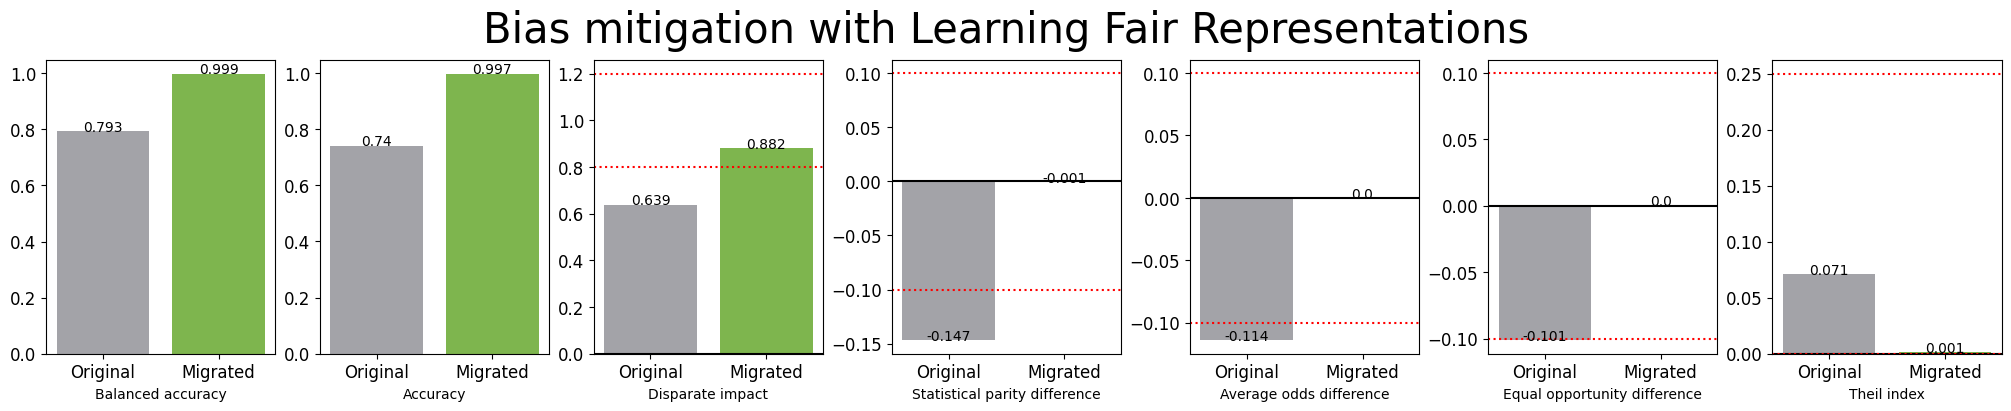

#### For method Learning Fair Representations :

Bias against unprivileged group detected in **0** out of 5 metrics

Balanced accuracy variation **0.206** 

In [ ]:
barplot_metrics(OR_metrics, LFR_metrics, 'Learning Fair Representations' )

Ορίζοντας ως επιθυμητό πλήθος prototypes το 25 και ζητώντας από το μοντέλο να προβλέψει το testing dataset, οδηγούμαστε σε ένα πολύ ιδανικό αποτέλεσμα όπου το bias έχει εξαλειφθεί πλήρως καθώς και τα πέντε bias metrics είναι εντός ορίων και ειδικότερα τρία από αυτά να έχουν την βέλτιστη τιμή. Όμως εξετάζοντας την balanced accuracy και την accuracy διαπιστώνεται πως οι τιμές τους είναι σχεδόν 100%. Το γεγονός αυτό σε συνδυασμό με το γεγονός ότι το αρχικό dataset είναι imbalanced οδηγεί στο συμπέρασμα ότι καθώς τα αντικείμενα που ανήκουν στην favorite class είναι πολύ λίγα πιθανώς το μοντέλο να κατηγοριοποιεί το σύνολο των δειγμάτων στην unfavorable class.

# **In-Processing**

##Adversarial Debiasing (AD)

Πηγή: https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_adversarial_debiasing.ipynb

In [ ]:
from aif360.algorithms.inprocessing.adversarial_debiasing import AdversarialDebiasing
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
AD_dataset_orig_train = dataset_orig_train.copy(deepcopy=True)
AD_dataset_orig_test = dataset_orig_test.copy(deepcopy=True)

min_max_scaler = MaxAbsScaler()

AD_dataset_orig_train.features = min_max_scaler.fit_transform(dataset_orig_train.features)
AD_dataset_orig_test.features = min_max_scaler.transform(dataset_orig_test.features)

In [ ]:
sess = tf.compat.v1.Session()


plain_model = AdversarialDebiasing(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups,
                          scope_name='plain_classifier',
                          debias=False,
                          sess=sess)

In [ ]:
plain_model.fit(AD_dataset_orig_train)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


epoch 0; iter: 0; batch classifier loss: 0.695159
epoch 0; iter: 200; batch classifier loss: 0.256992
epoch 1; iter: 0; batch classifier loss: 0.361499
epoch 1; iter: 200; batch classifier loss: 0.207904
epoch 2; iter: 0; batch classifier loss: 0.374696
epoch 2; iter: 200; batch classifier loss: 0.323131
epoch 3; iter: 0; batch classifier loss: 0.265226
epoch 3; iter: 200; batch classifier loss: 0.324410
epoch 4; iter: 0; batch classifier loss: 0.302326
epoch 4; iter: 200; batch classifier loss: 0.302200
epoch 5; iter: 0; batch classifier loss: 0.255892
epoch 5; iter: 200; batch classifier loss: 0.294835
epoch 6; iter: 0; batch classifier loss: 0.285771
epoch 6; iter: 200; batch classifier loss: 0.266733
epoch 7; iter: 0; batch classifier loss: 0.223398
epoch 7; iter: 200; batch classifier loss: 0.223359
epoch 8; iter: 0; batch classifier loss: 0.252612
epoch 8; iter: 200; batch classifier loss: 0.200912
epoch 9; iter: 0; batch classifier loss: 0.275521
epoch 9; iter: 200; batch classi

In [ ]:
# Apply the plain model to test data
dataset_nodebiasing_test = plain_model.predict(AD_dataset_orig_test)

In [ ]:
AD_metric_test_bef = compute_metrics(AD_dataset_orig_test, dataset_nodebiasing_test,
                                      unprivileged_groups, privileged_groups,
                                      disp = True)

Balanced accuracy = 0.6758
Accuracy = 0.8990
Disparate impact = 0.7271
Statistical parity difference = -0.0218
Average odds difference = -0.0093
Equal opportunity difference = -0.0109
Theil index = 0.0891


In [ ]:
AD_metrics_bef=[]
for m in metrics:
  AD_metrics_bef.append(AD_metric_test_bef[m])

In [ ]:
sess.close()
tf.compat.v1.reset_default_graph()
sess = tf.compat.v1.Session()

In [ ]:
# Learn parameters with debias set to True
debiased_model = AdversarialDebiasing(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups,
                          scope_name='debiased_classifier',
                          debias=True,
                          sess=sess)

In [ ]:
debiased_model.fit(AD_dataset_orig_train)

epoch 0; iter: 0; batch classifier loss: 0.693255; batch adversarial loss: 0.689364
epoch 0; iter: 200; batch classifier loss: 0.352639; batch adversarial loss: 0.675270
epoch 1; iter: 0; batch classifier loss: 0.299480; batch adversarial loss: 0.677435
epoch 1; iter: 200; batch classifier loss: 0.281094; batch adversarial loss: 0.668727
epoch 2; iter: 0; batch classifier loss: 0.197966; batch adversarial loss: 0.683043
epoch 2; iter: 200; batch classifier loss: 0.303554; batch adversarial loss: 0.677718
epoch 3; iter: 0; batch classifier loss: 0.254298; batch adversarial loss: 0.654068
epoch 3; iter: 200; batch classifier loss: 0.233987; batch adversarial loss: 0.658119
epoch 4; iter: 0; batch classifier loss: 0.265095; batch adversarial loss: 0.680790
epoch 4; iter: 200; batch classifier loss: 0.220672; batch adversarial loss: 0.682041
epoch 5; iter: 0; batch classifier loss: 0.272420; batch adversarial loss: 0.685250
epoch 5; iter: 200; batch classifier loss: 0.269165; batch adversa

In [ ]:
# Apply the plain model to test data
dataset_debiasing_test = debiased_model.predict(AD_dataset_orig_test)

In [ ]:
AD_metric_test_aft = compute_metrics(AD_dataset_orig_test, dataset_debiasing_test,
                                      unprivileged_groups, privileged_groups,
                                      disp = True)

Balanced accuracy = 0.6364
Accuracy = 0.8931
Disparate impact = 1.7878
Statistical parity difference = 0.0340
Average odds difference = 0.1345
Equal opportunity difference = 0.2500
Theil index = 0.0988


In [ ]:
AD_metrics_aft=[]
for m in metrics:
  AD_metrics_aft.append(AD_metric_test_aft[m])

<ipython-input-4-929b97642671>:60: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(metrics), i+1)


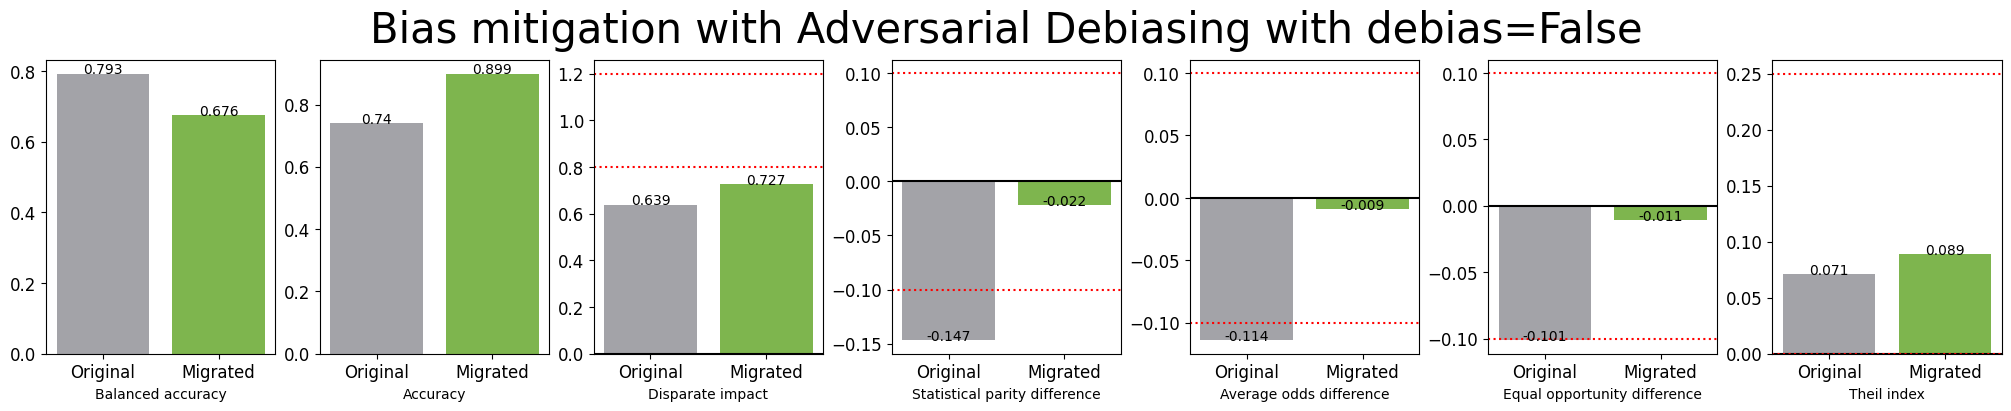

#### For method Adversarial Debiasing with debias=False :

Bias against unprivileged group detected in **1** out of 5 metrics

Balanced accuracy variation **-0.117** 

In [ ]:
barplot_metrics(OR_metrics, AD_metrics_bef, 'Adversarial Debiasing with debias=False' )

<ipython-input-4-929b97642671>:60: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(metrics), i+1)


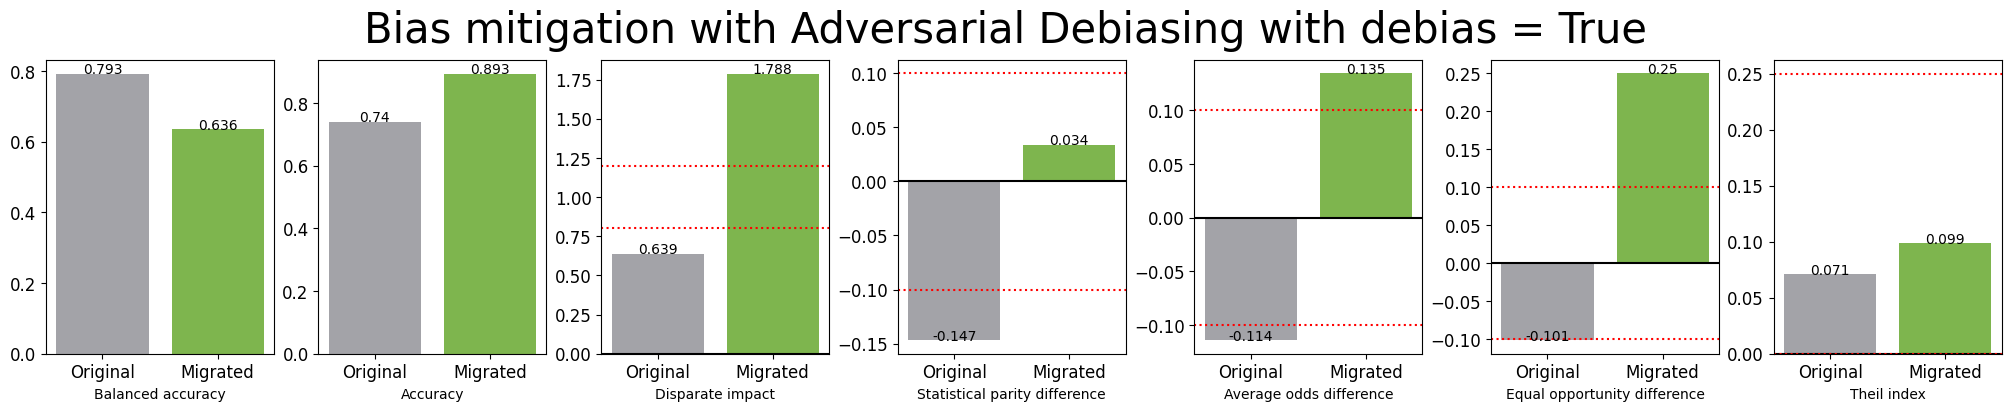

#### For method Adversarial Debiasing with debias = True :

Bias against unprivileged group detected in **3** out of 5 metrics

Balanced accuracy variation **-0.156** 

In [ ]:
barplot_metrics(OR_metrics, AD_metrics_aft, 'Adversarial Debiasing with debias = True' )

Από την αξιολόγηση των αποτελεσμάτων του, φαίνεται πως ο αλγόριθμος κατάφερε να αντιστρέψει το bias καθώς τρία από τα πέντε bias metrics είναι πάνω από το ανώτατο όριο γεγονός που υποδηλώνει ότι υπάρχει μεροληψία υπέρ του unprivileged group. Ένα ακόμη ενδιαφέρον στοιχείο είναι ότι η balanced accuracy μειώθηκε κατά 15% ενώ η accuracy αυξήθηκε κατά το ίδιο ποσοστό, γεγονός που οφείλεται στο ότι η accuracy δεν μπορεί να χειριστεί με επιτυχία τα imbalanced datasets.

##Prejudice Remover (PRE)

Πηγή: https://aif360.readthedocs.io/en/stable/modules/generated/aif360.algorithms.inprocessing.PrejudiceRemover.html#aif360.algorithms.inprocessing.PrejudiceRemover

In [ ]:
from aif360.algorithms.inprocessing import PrejudiceRemover

In [ ]:
PRE_dataset_orig_train = dataset_orig_train.copy(deepcopy=True)
PRE_dataset_orig_valid = dataset_orig_valid.copy(deepcopy=True)
PRE_dataset_orig_test = dataset_orig_test.copy(deepcopy=True)

In [ ]:
protected_attr = dataset_orig_train.protected_attribute_names[0]

In [ ]:
scaler = StandardScaler()
PRE_dataset_orig_train.features = scaler.fit_transform(PRE_dataset_orig_train.features)
PRE_dataset_orig_valid.features = scaler.transform(PRE_dataset_orig_valid.features)
PRE_dataset_orig_test.features = scaler.transform(PRE_dataset_orig_test.features)

In [ ]:
steps = 15
PRE_thresh_arr = np.linspace(1, 100, steps)



PRE_bal_acc_arr = []
PRE_acc_arr = []
PRE_disp_imp_arr = []
PRE_stat_par_diff_arr = []
PRE_avg_odds_diff_arr = []
PRE_eq_opp_diff_arr = []
PRE_theil_ind_arr = []


for thresh in tqdm(PRE_thresh_arr):
    thresh = int(thresh)
    debiased_model = PrejudiceRemover(sensitive_attr= protected_attr, eta = round(thresh))
    debiased_model.fit(PRE_dataset_orig_train)
    PRE_dataset_transf_valid_pred = PRE_dataset_orig_valid.copy(deepcopy=True)

    PRE_dataset_transf_valid_pred = debiased_model.predict(PRE_dataset_orig_valid)



    PRE_metric_valid = compute_metrics(PRE_dataset_orig_valid, PRE_dataset_transf_valid_pred,
                                        unprivileged_groups, privileged_groups,
                                        disp = False)

    PRE_bal_acc_arr.append(PRE_metric_valid["Balanced accuracy"])
    PRE_acc_arr.append(PRE_metric_valid["Accuracy"])
    PRE_disp_imp_arr.append(PRE_metric_valid["Disparate impact"])
    PRE_stat_par_diff_arr.append(PRE_metric_valid["Statistical parity difference"])
    PRE_avg_odds_diff_arr.append(PRE_metric_valid["Average odds difference"])
    PRE_eq_opp_diff_arr.append(PRE_metric_valid["Equal opportunity difference"])
    PRE_theil_ind_arr.append(PRE_metric_valid["Theil index"])

PRE_thresh_arr_best_ind = np.where(PRE_bal_acc_arr == np.max(PRE_bal_acc_arr))[0][0]
PRE_thresh_arr_best = np.array(PRE_thresh_arr)[PRE_thresh_arr_best_ind]

PRE_best_bal_acc = PRE_bal_acc_arr[PRE_thresh_arr_best_ind]

print(".")
print("Best balanced accuracy = %.4f" % PRE_best_bal_acc)
print("Optimal eta value  = %.4f" % PRE_thresh_arr_best)
print("Accuracy = %.4f" % PRE_acc_arr[PRE_thresh_arr_best_ind])
print("Disparate impact = %.4f" % PRE_disp_imp_arr[PRE_thresh_arr_best_ind])
print("Statistical parity difference = %.4f" % PRE_stat_par_diff_arr[PRE_thresh_arr_best_ind])
print("Average odds difference = %.4f" % PRE_avg_odds_diff_arr[PRE_thresh_arr_best_ind])
print("Equal opportunity difference = %.4f" % PRE_eq_opp_diff_arr[PRE_thresh_arr_best_ind])
print("Theil index = %.4f" % PRE_theil_ind_arr[PRE_thresh_arr_best_ind])


100%|██████████| 15/15 [17:58<00:00, 71.91s/it]

.
Best balanced accuracy = 0.5953
Optimal eta value  = 1.0000
Accuracy = 0.8955
Disparate impact = 0.6764
Statistical parity difference = -0.0148
Average odds difference = -0.0157
Equal opportunity difference = -0.0254
Theil index = 0.0990


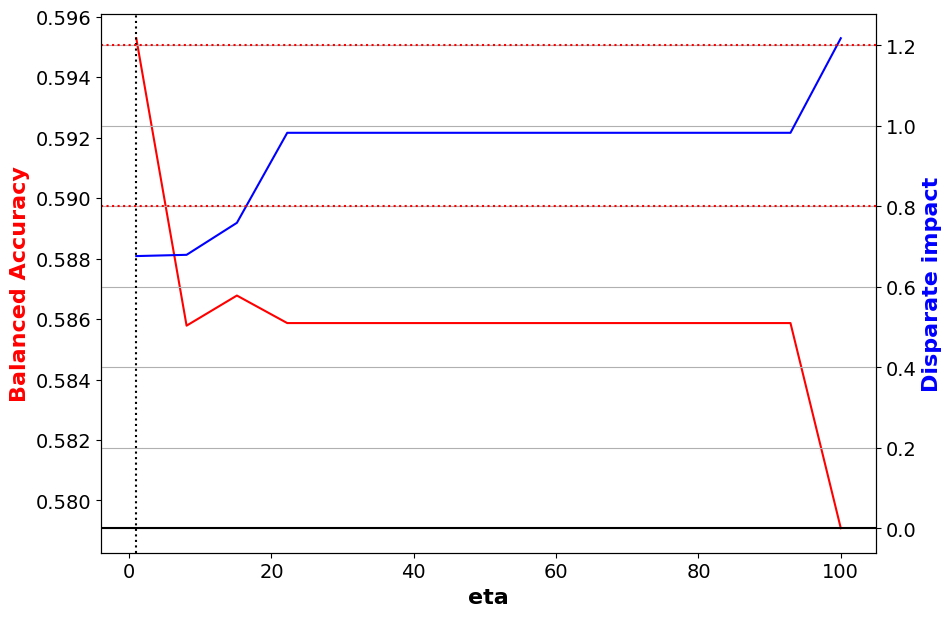

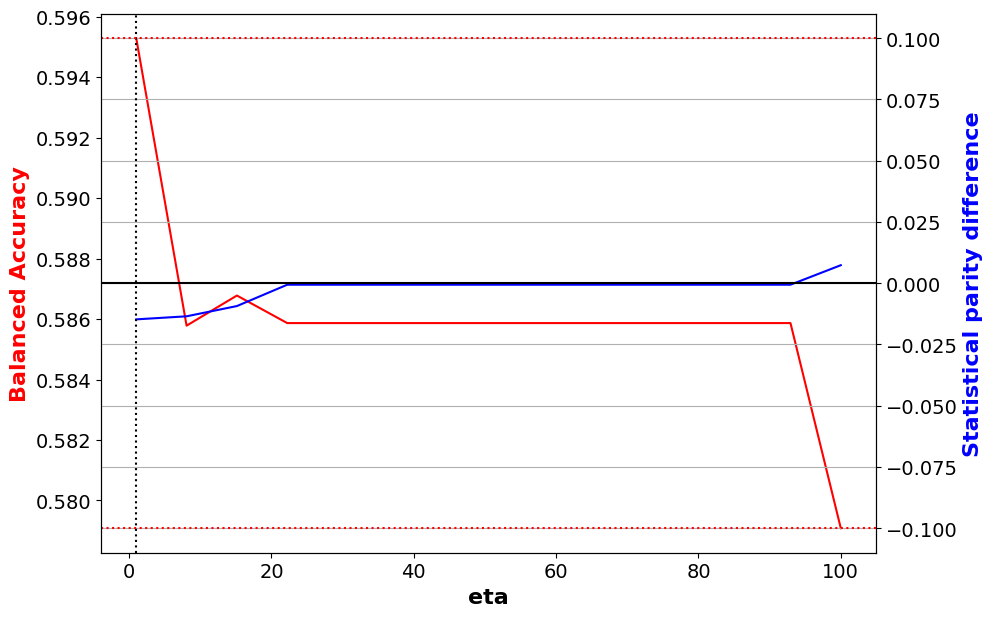

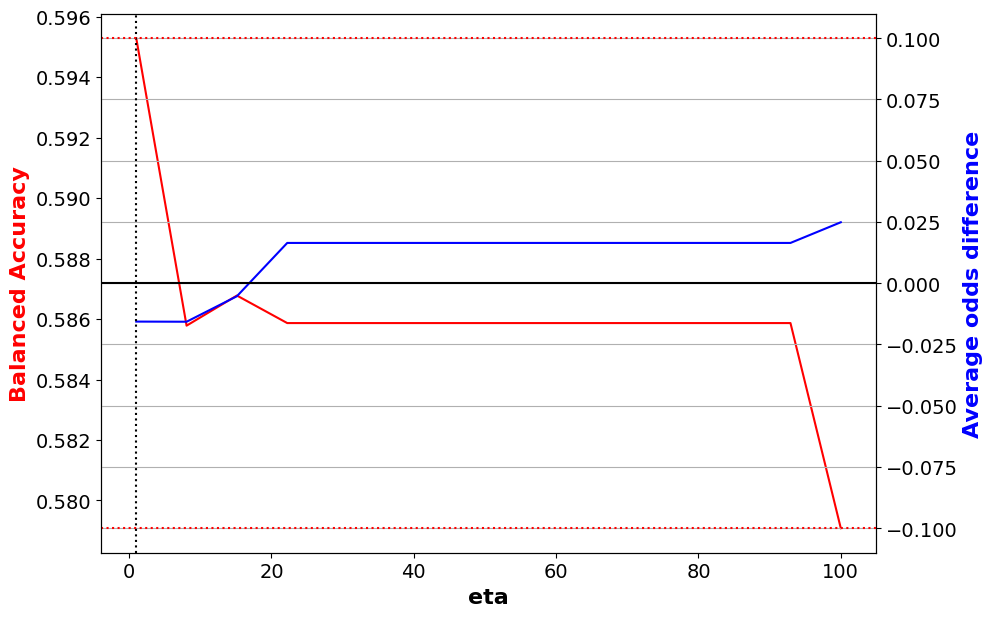

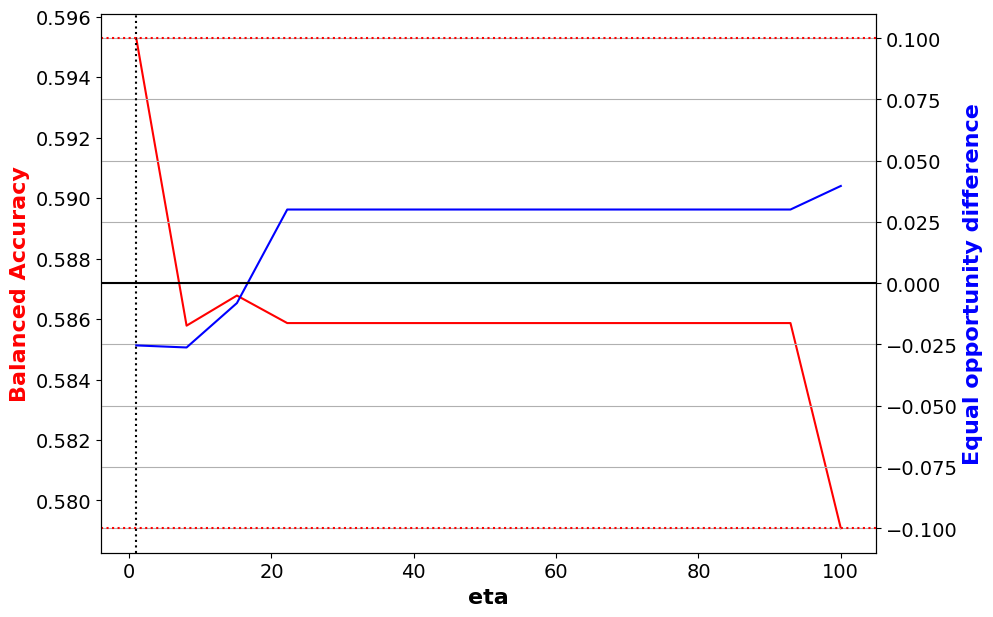

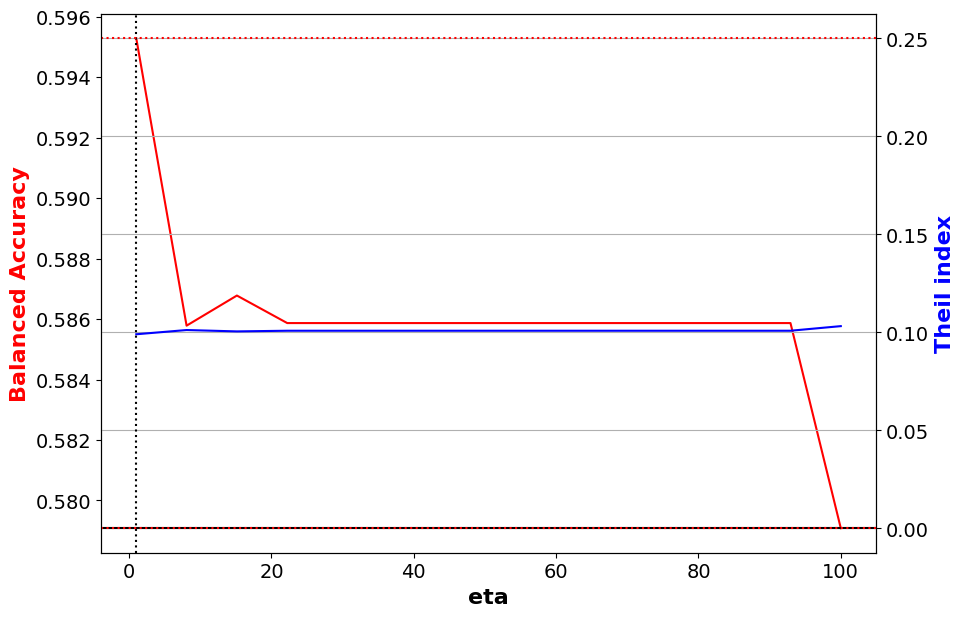

In [ ]:
arr=[PRE_disp_imp_arr, PRE_stat_par_diff_arr, PRE_avg_odds_diff_arr, PRE_eq_opp_diff_arr, PRE_theil_ind_arr]

for i in range(2,len(metrics)):
  plot_metric(PRE_thresh_arr, 'eta', PRE_thresh_arr_best_ind, PRE_bal_acc_arr, 'Balanced Accuracy', arr[i-2] , metrics[i] )

### Plot of balanced accuracy and output fairness vs eta

#### The graph illustrates the affect on fairness metrics for various values of eta

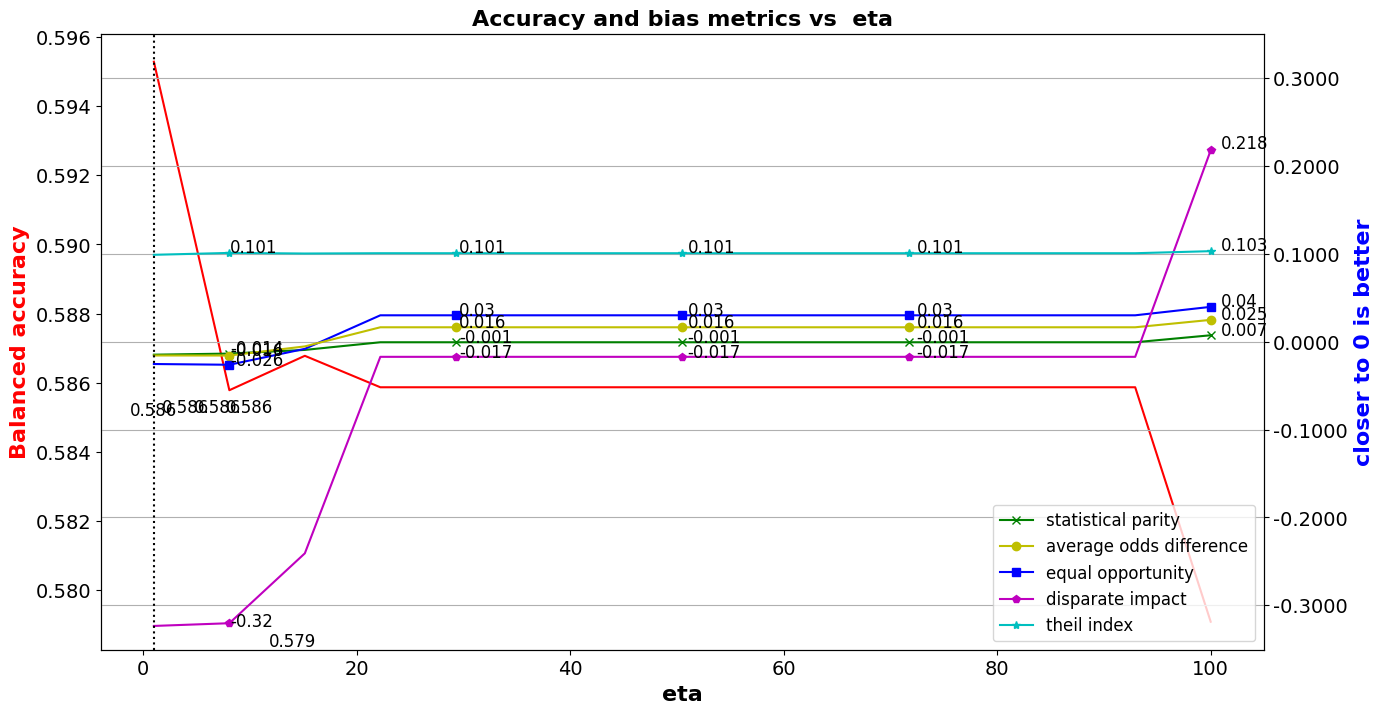

In [ ]:
plot_all_metrics(PRE_stat_par_diff_arr,PRE_avg_odds_diff_arr, PRE_eq_opp_diff_arr, PRE_disp_imp_arr, PRE_theil_ind_arr, PRE_bal_acc_arr, PRE_thresh_arr, PRE_thresh_arr_best_ind, 1, 14, 5 , 'eta')

Χρησιμοποιώντας το validation dataset διαπιστώνεται πως η τιμή του eta που αποδίδει την μέγιστη balanced accuracy είναι το 1. Όταν η τιμή του eta είναι στο εύρος 20-90 φαίνεται ότι οι τιμές όλων των μετρικών παραμένουν ίδιες και κοντά στη βέλτιστη τιμή τους, ενώ οι τιμές τους αρχίζουν να μεταβάλλονται ξανά όταν το eta είναι πάνω από 90. Ένα ακόμη χαρακτηριστικό που αξίζει να επισημανθεί είναι πως η τιμή της balanced accuracy είναι πολύ μικρή και μεταβάλλεται αντιστρόφως ανάλογα με την ύπαρξη του bias.

In [ ]:
PRE_thresh_arr

array([  1.        ,   8.07142857,  15.14285714,  22.21428571,
        29.28571429,  36.35714286,  43.42857143,  50.5       ,
        57.57142857,  64.64285714,  71.71428571,  78.78571429,
        85.85714286,  92.92857143, 100.        ])

In [ ]:
PRE_metrics=[]
PRE_metrics.append(PRE_bal_acc_arr[PRE_thresh_arr_best_ind])
PRE_metrics.append(PRE_acc_arr[PRE_thresh_arr_best_ind])
PRE_metrics.append(PRE_disp_imp_arr[PRE_thresh_arr_best_ind])
PRE_metrics.append(PRE_stat_par_diff_arr[PRE_thresh_arr_best_ind])
PRE_metrics.append(PRE_avg_odds_diff_arr[PRE_thresh_arr_best_ind])
PRE_metrics.append(PRE_eq_opp_diff_arr[PRE_thresh_arr_best_ind])
PRE_metrics.append(PRE_theil_ind_arr[PRE_thresh_arr_best_ind])

In [ ]:
debiased_model = PrejudiceRemover(sensitive_attr= protected_attr, eta = PRE_thresh_arr_best)
debiased_model.fit(PRE_dataset_orig_train)

PRE_dataset_transf_test_pred = debiased_model.predict(PRE_dataset_orig_test)


PRE_metric_test = compute_metrics(PRE_dataset_orig_test, PRE_dataset_transf_test_pred,
                                    unprivileged_groups, privileged_groups,
                                    disp = False)

<ipython-input-4-929b97642671>:60: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(metrics), i+1)


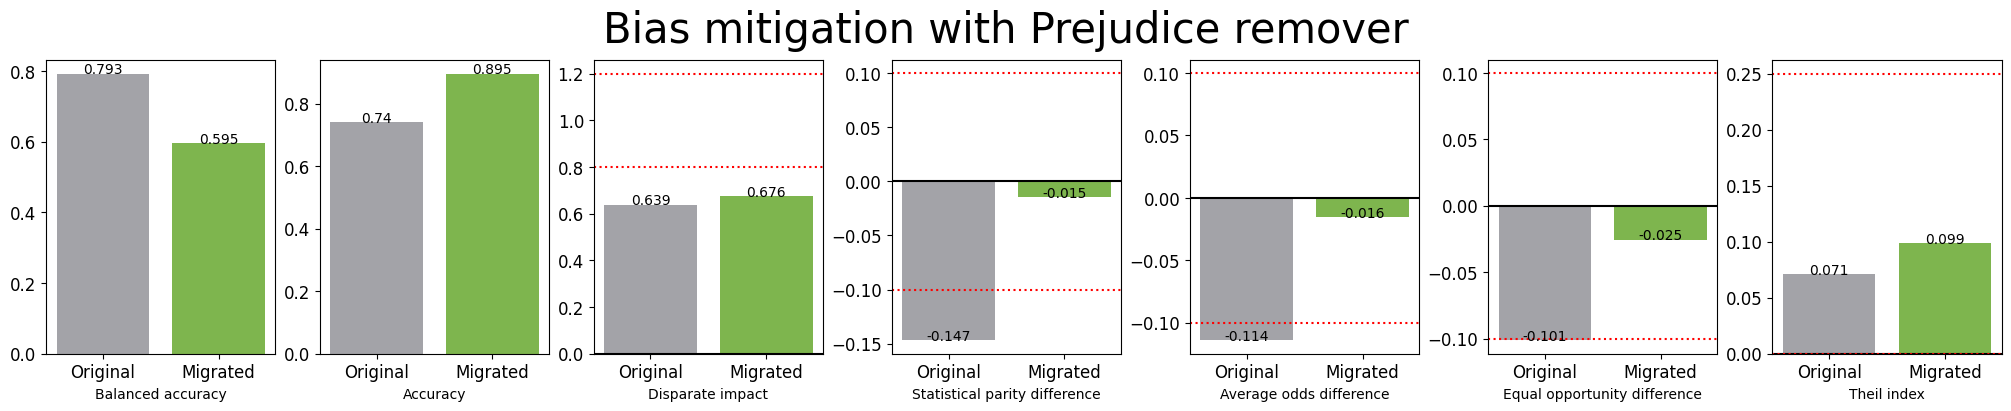

#### For method Prejudice remover :

Bias against unprivileged group detected in **1** out of 5 metrics

Balanced accuracy variation **-0.197** 

In [ ]:
barplot_metrics(OR_metrics, PRE_metrics, 'Prejudice remover' )

Είναι ευδιάκριτο στα αποτέλεσμα της πρόβλεψης του testing dataset ότι η  balanced accuracy έχει μειωθεί πολύ. Αν και το bias έχει εξαλειφθεί πλήρως καθώς και οι πέντε μετρικές για το bias είναι εντός ορίων, η μείωση της balanced accuracy είναι τόσο μεγάλη που καθιστά το μοντέλο σχεδόν μη παραγωγικό.


#**Post-Processing**

##Reject Option Classification (ROC)

Πηγή: https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_reject_option_classification.ipynb

Η μέθοδος δίνει την δυνατότητα στον χρήστη να επιλέξει βάση ποιάς μετρικής θα γίνει η βελτιστοποίηση (optimization) των αποτελεσμάτων. Οι επιτρεπόμενες μετρικές είναι η Statistical parity difference, η Average odds difference και η Equal opportunity difference, με την Statistical parity difference να αποτελεί την προεπιλογή του αλγορίθμου.

In [ ]:
from aif360.algorithms.postprocessing.reject_option_classification\
        import RejectOptionClassification

In [ ]:
# Metric used (should be one of allowed_metrics)
metric_name = "Statistical parity difference"

# Upper and lower bound on the fairness metric used
metric_ub = 0.05
metric_lb = -0.05

#random seed for calibrated equal odds prediction
np.random.seed(1)

# Verify metric name
allowed_metrics = ["Statistical parity difference",
                   "Average odds difference",
                   "Equal opportunity difference"]
if metric_name not in allowed_metrics:
    raise ValueError("Metric name should be one of allowed metrics")

In [ ]:
ROC_bal_acc_arr = []
ROC_acc_arr = []
ROC_disp_imp_arr = []
ROC_stat_par_diff_arr = []
ROC_avg_odds_diff_arr = []
ROC_eq_opp_diff_arr = []
ROC_theil_ind_arr = []

In [ ]:
for m in allowed_metrics:
  ROC = RejectOptionClassification(unprivileged_groups=unprivileged_groups,
                                 privileged_groups=privileged_groups,
                                 low_class_thresh=0.01, high_class_thresh=0.99,
                                  num_class_thresh=100, num_ROC_margin=50,
                                  metric_name=m,
                                  metric_ub=metric_ub, metric_lb=metric_lb)
  ROC = ROC.fit(dataset_orig_valid, dataset_orig_valid_pred)
  ROC_dataset_transf_valid_pred = ROC.predict(dataset_orig_valid_pred)
  display(Markdown("#### %s" % m))
  ROC_metric_valid = compute_metrics(dataset_orig_valid, ROC_dataset_transf_valid_pred,
                unprivileged_groups, privileged_groups)

  ROC_bal_acc_arr.append(ROC_metric_valid["Balanced accuracy"])
  ROC_acc_arr.append(ROC_metric_valid["Accuracy"])
  ROC_disp_imp_arr.append(ROC_metric_valid["Disparate impact"])
  ROC_stat_par_diff_arr.append(ROC_metric_valid["Statistical parity difference"])
  ROC_avg_odds_diff_arr.append(ROC_metric_valid["Average odds difference"])
  ROC_eq_opp_diff_arr.append(ROC_metric_valid["Equal opportunity difference"])
  ROC_theil_ind_arr.append(ROC_metric_valid["Theil index"])


#### Statistical parity difference

Balanced accuracy = 0.7939
Accuracy = 0.7950
Disparate impact = 0.8569
Statistical parity difference = -0.0410
Average odds difference = -0.0034
Equal opportunity difference = 0.0174
Theil index = 0.0703


#### Average odds difference

Balanced accuracy = 0.7965
Accuracy = 0.7956
Disparate impact = 0.7358
Statistical parity difference = -0.0800
Average odds difference = -0.0392
Equal opportunity difference = -0.0146
Theil index = 0.0696


#### Equal opportunity difference

Balanced accuracy = 0.7965
Accuracy = 0.7956
Disparate impact = 0.7358
Statistical parity difference = -0.0800
Average odds difference = -0.0392
Equal opportunity difference = -0.0146
Theil index = 0.0696


Χρησιμοποιώντας το validation dataset για την εύρεση της βέλτιστης μετρικής διαπιστώνεται πως οι μετρικές Average odds difference και Equal opportunity difference απέδωσαν ακριβώς τα ίδια αποτελέσματα τόσο στις τιμές των bias metrics όσο και στην τιμή της balanced accuracy, ενώ στην περίπτωση που χρησιμοποιήθηκε η μετρική Statistical parity difference υπάρχει μια πολύ μικρή μείωση της balanced accuracy, αλλά και τα πέντε bias metrics βρίσκονται εντός των ορίων του fairness. Για τον λόγο αυτό, στην αξιολόγηση του μοντέλου με το testing θα χρησιμοποιηθεί η μετρική Statistical parity difference.


### Plot of balanced accuracy and output fairness vs metrics

#### The graph illustrates the affect on fairness metrics for various values of metrics

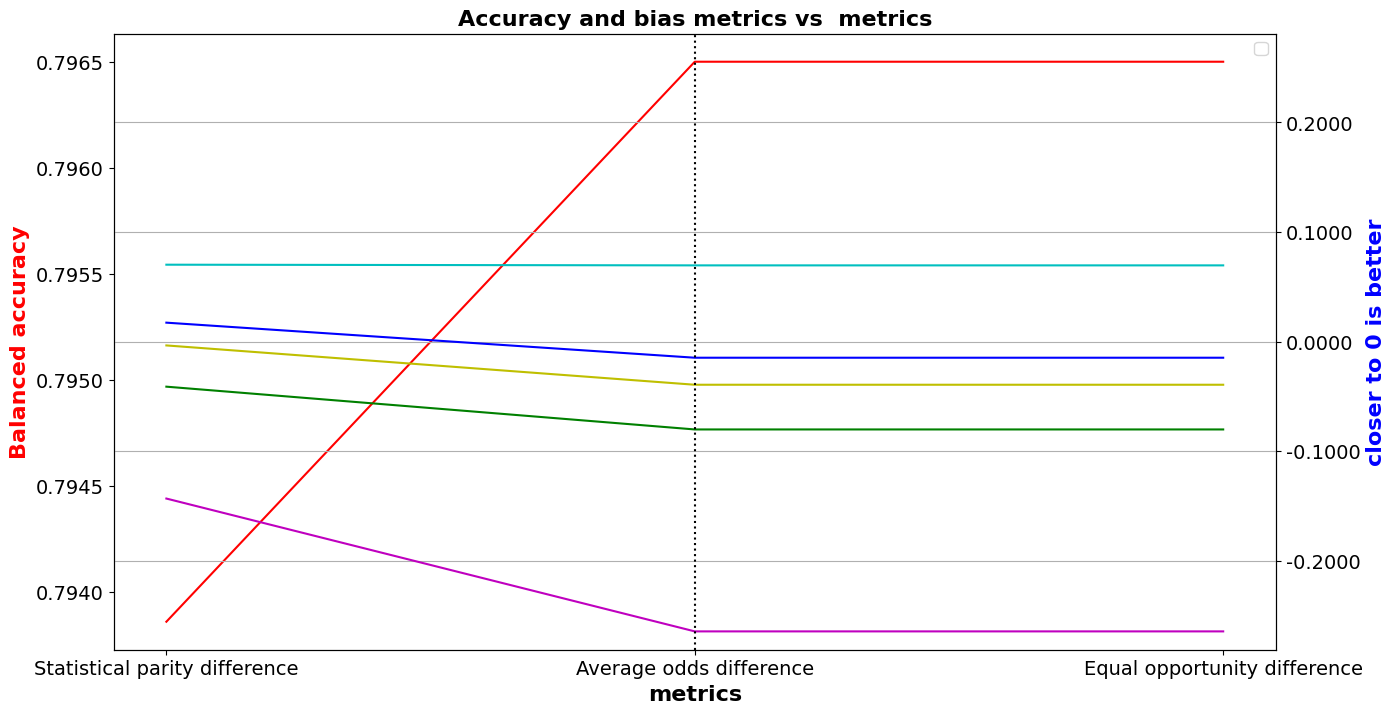

In [ ]:
plot_all_metrics(ROC_stat_par_diff_arr,ROC_avg_odds_diff_arr, ROC_eq_opp_diff_arr, ROC_disp_imp_arr, ROC_theil_ind_arr, ROC_bal_acc_arr, allowed_metrics, 1, 0, 2, 0  , 'metrics')

### Plot of balanced accuracy and output fairness vs metrics

#### The graph illustrates the affect on fairness metrics for various values of metrics

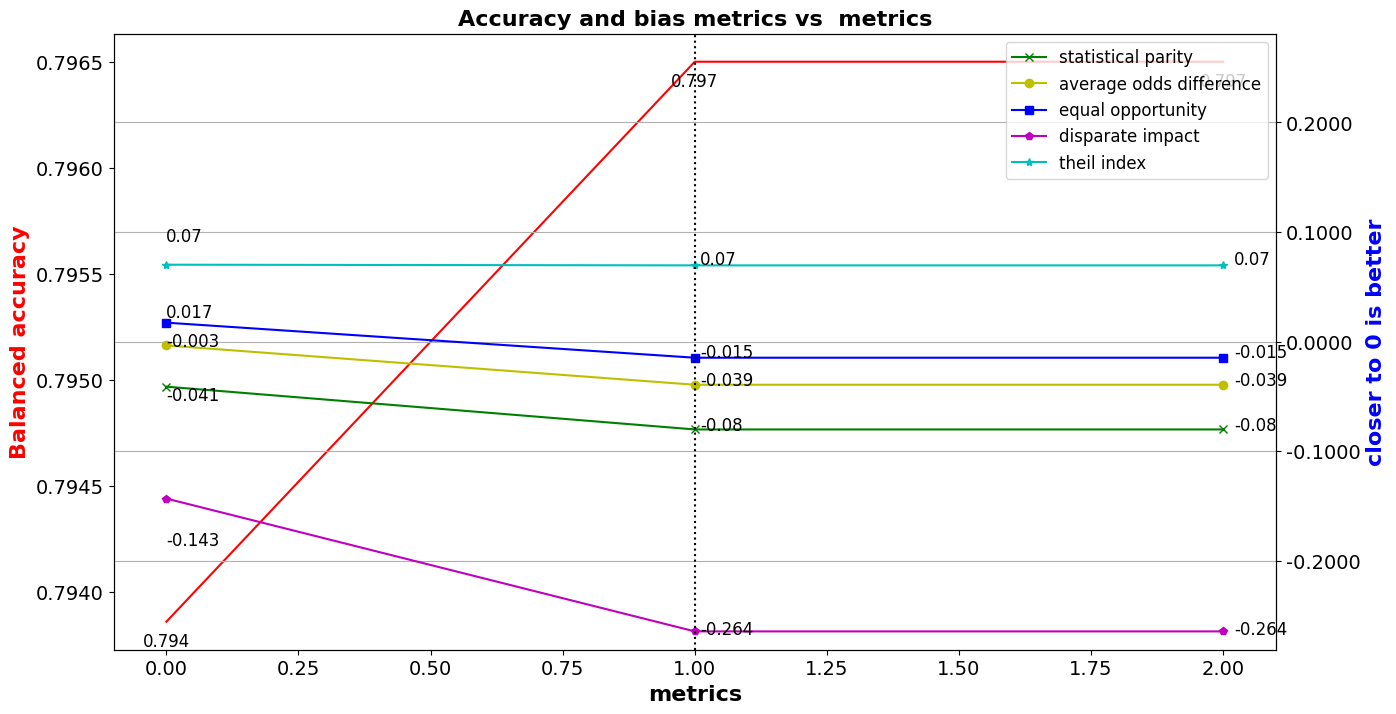

In [ ]:
plot_all_metrics(ROC_stat_par_diff_arr,ROC_avg_odds_diff_arr, ROC_eq_opp_diff_arr, ROC_disp_imp_arr, ROC_theil_ind_arr, ROC_bal_acc_arr, [0,1,2] , 1, 0, 2, 3  , 'metrics')

In [ ]:
ROC = RejectOptionClassification(unprivileged_groups=unprivileged_groups,
                                 privileged_groups=privileged_groups,
                                 low_class_thresh=0.01, high_class_thresh=0.99,
                                  num_class_thresh=100, num_ROC_margin=50,
                                  metric_name=metric_name,
                                  metric_ub=metric_ub, metric_lb=metric_lb)
ROC = ROC.fit(dataset_orig_test, dataset_orig_test_pred)

In [ ]:
print("Optimal classification threshold (with fairness constraints) = %.4f" % ROC.classification_threshold)
print("Optimal ROC margin = %.4f" % ROC.ROC_margin)

Optimal classification threshold (with fairness constraints) = 0.1189
Optimal ROC margin = 0.0170


In [ ]:
# Transform the test set
ROC_dataset_transf_test_pred = ROC.predict(dataset_orig_test_pred)

display(Markdown("#### Test set"))
display(Markdown("##### Transformed predictions - With fairness constraints"))
ROC_metric_test = compute_metrics(dataset_orig_test, ROC_dataset_transf_test_pred,
                unprivileged_groups, privileged_groups)

#### Test set

##### Transformed predictions - With fairness constraints

Balanced accuracy = 0.7978
Accuracy = 0.7971
Disparate impact = 0.8659
Statistical parity difference = -0.0392
Average odds difference = -0.0196
Equal opportunity difference = -0.0247
Theil index = 0.0714


In [ ]:
ROC_metrics=[]
for m in metrics:
  ROC_metrics.append(ROC_metric_test.get(m))

In [ ]:
ROC_metrics

[0.7978373839172168,
 0.7971099970510174,
 0.8658858181994883,
 -0.039154798930539636,
 -0.01959650969644744,
 -0.024723495910250137,
 0.07142580831014338]

<ipython-input-4-929b97642671>:60: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(metrics), i+1)


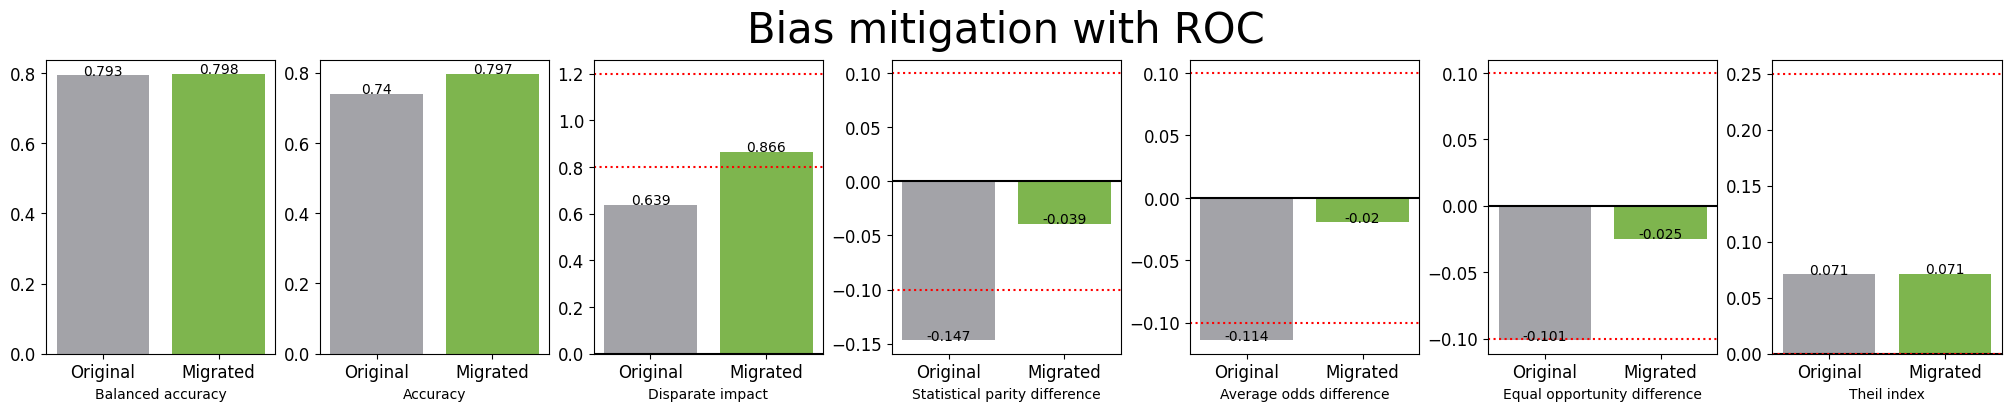

#### For method ROC :

Bias against unprivileged group detected in **0** out of 5 metrics

Balanced accuracy variation **0.005** 

In [ ]:
barplot_metrics(OR_metrics, ROC_metrics, 'ROC' )

Μελετώντας τα αποτελέσματα του μοντέλου που προέκυψαν απο το testing dataset φαίνεται πως η μέθοδος κατάφερε να πετύχει τα αποτελέσματα του μοντέλου να μην περιέχουν bias σύμφωνα και με τις πέντε μετρικές ενώ ταυτόχρονα κατάφερε να επιφέρει και μια μικρή αύξηση στην balanced accuracy

##Calibrated Equalized Odds Post-processing (CPP)

Πηγή: https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_calibrated_eqodds_postprocessing.ipynb

Όπως και στην προηγούμενη μέθοδο έτσι και εδώ δίνεται στον χρήστη η δυνατότητα να επιλέξει την μεταβλητή βάση της οποίας θα γίνει το optimization της μεθόδου. Όμως στην περίπτωση αυτή ο χρήστης δεν έχει να επιλέξει ανάμεσα σε κάποια bias metrics αλλά μεταξύ των cost constraint fpr, fnr και weighted όπου αποτελεί ένα συνδυασμό των δύο προηγούμενων επιλογών.


In [ ]:
from aif360.algorithms.postprocessing.calibrated_eq_odds_postprocessing import CalibratedEqOddsPostprocessing
# cost constraint
# fnr will optimize generalized false negative rates
# fpr will optimize generalized false positive rates
# weighted will optimize a weighted combination of both
randseed = 1

In [ ]:
constraint_list = [ "fnr", "fpr", "weighted"]
CPP_bal_acc_arr = []
CPP_acc_arr = []
CPP_disp_imp_arr = []
CPP_stat_par_diff_arr = []
CPP_avg_odds_diff_arr = []
CPP_eq_opp_diff_arr = []
CPP_theil_ind_arr = []

In [ ]:
for c in constraint_list:
  CPP = CalibratedEqOddsPostprocessing(privileged_groups = privileged_groups,
                                      unprivileged_groups = unprivileged_groups,
                                      cost_constraint= c,
                                      seed=randseed)
  CPP = CPP.fit(dataset_orig_valid, dataset_orig_valid_pred)
  CPP_dataset_valid_pred = CPP.predict(dataset_orig_valid_pred)
  display(Markdown("#### %s" % c))
  CPP_metric_valid = compute_metrics(dataset_orig_valid, CPP_dataset_valid_pred,
                unprivileged_groups, privileged_groups)
  CPP = CPP.fit(dataset_orig_valid, dataset_orig_valid_pred)
  CPP_bal_acc_arr.append(CPP_metric_valid["Balanced accuracy"])
  CPP_acc_arr.append(CPP_metric_valid["Accuracy"])
  CPP_disp_imp_arr.append(CPP_metric_valid["Disparate impact"])
  CPP_stat_par_diff_arr.append(CPP_metric_valid["Statistical parity difference"])
  CPP_avg_odds_diff_arr.append(CPP_metric_valid["Average odds difference"])
  CPP_eq_opp_diff_arr.append(CPP_metric_valid["Equal opportunity difference"])
  CPP_theil_ind_arr.append(CPP_metric_valid["Theil index"])

#### fnr

Balanced accuracy = 0.5814
Accuracy = 0.8934
Disparate impact = 0.8374
Statistical parity difference = -0.0061
Average odds difference = 0.0077
Equal opportunity difference = 0.0177
Theil index = 0.1021


#### fpr

Balanced accuracy = 0.5674
Accuracy = 0.8931
Disparate impact = 0.0000
Statistical parity difference = -0.0476
Average odds difference = -0.1210
Equal opportunity difference = -0.2192
Theil index = 0.1047


#### weighted

Balanced accuracy = 0.5674
Accuracy = 0.8931
Disparate impact = 0.0000
Statistical parity difference = -0.0476
Average odds difference = -0.1210
Equal opportunity difference = -0.2192
Theil index = 0.1047


Όπως στην προηγούμενη μέθοδο, έτσι και σε αυτή την περίπτωση δημιουργήθηκαν τρία διαφορετικά μοντέλα, που έγιναν optimized με μια από τις cost constraint και διαπιστώθηκε πως η πιο αποδοτική περίπτωση ήταν όταν το μοντέλο έγινε optimized με την fnr καθώς πέτυχε τόσο την υψηλότερη balanced accuracy αλλά και την μετρική disparate impact να είναι εντός των ορίων του fairness. Ένα ακόμη σημείο που θα αξίζει να τονιστεί είναι πως οι cost constraint fnr και weighted είχαν ακριβώς τις ίδιες τιμές σε όλες τις μετρικές και ειδικότερα η τιμή της disparate impact ήταν πολύ μακριά από το κατώτατο όριο του fairness.


### Plot of balanced accuracy and output fairness vs constraint

#### The graph illustrates the affect on fairness metrics for various values of constraint

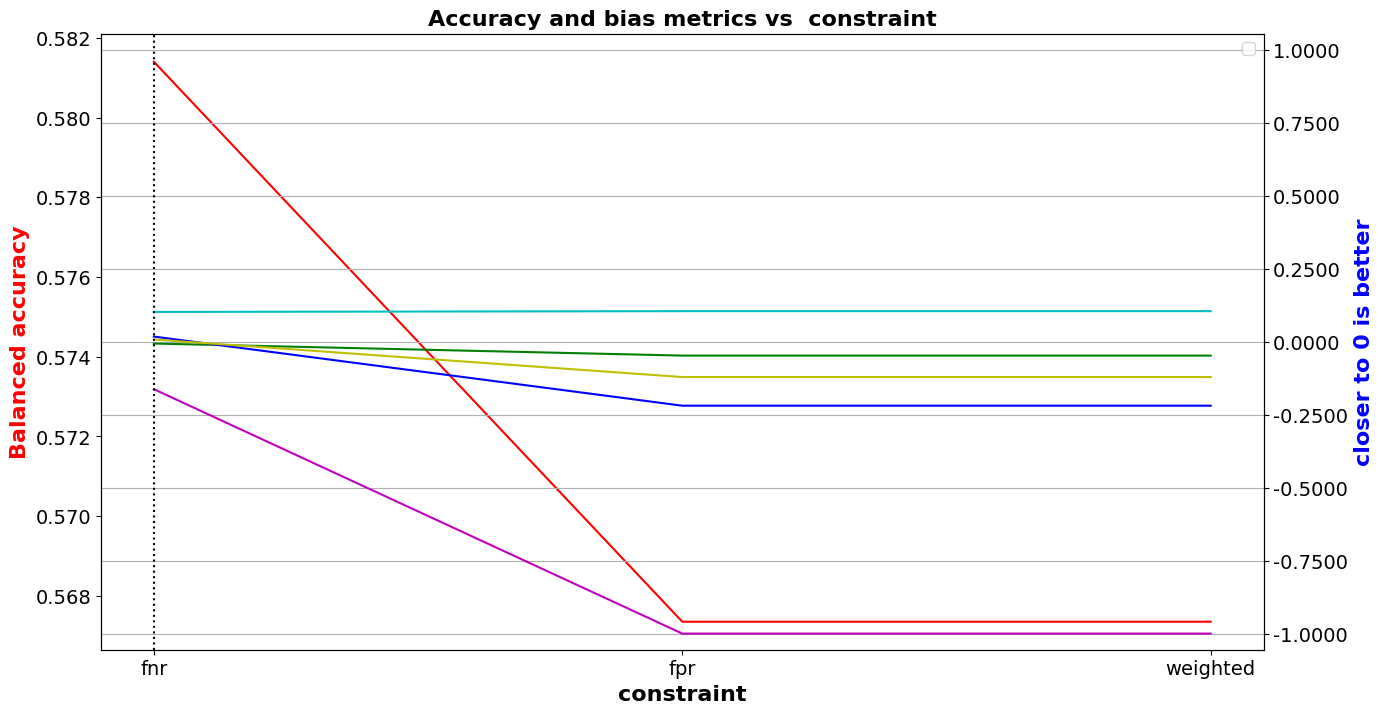

In [ ]:
plot_all_metrics(CPP_stat_par_diff_arr,CPP_avg_odds_diff_arr, CPP_eq_opp_diff_arr, CPP_disp_imp_arr, CPP_theil_ind_arr, CPP_bal_acc_arr, constraint_list, 0, 0, 2, 0  , 'constraint')

### Plot of balanced accuracy and output fairness vs constraint

#### The graph illustrates the affect on fairness metrics for various values of constraint

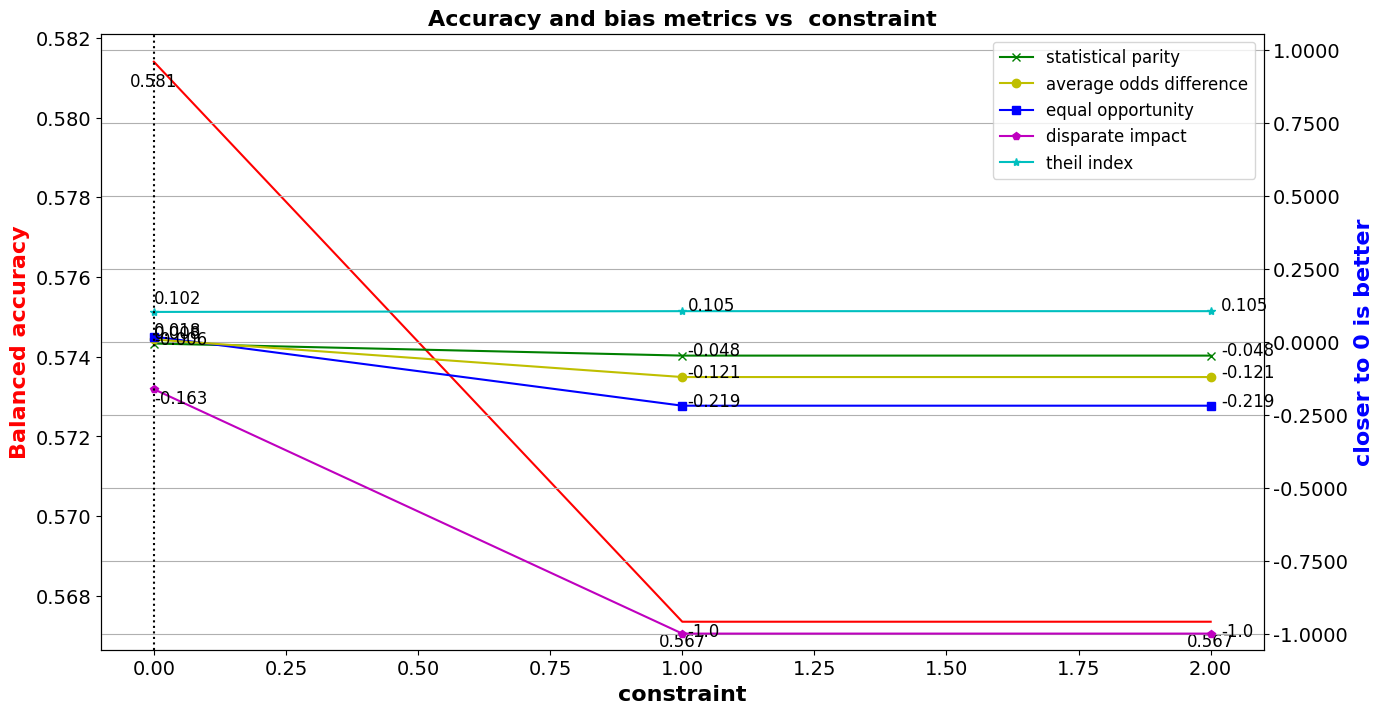

In [ ]:
plot_all_metrics(CPP_stat_par_diff_arr,CPP_avg_odds_diff_arr, CPP_eq_opp_diff_arr, CPP_disp_imp_arr, CPP_theil_ind_arr, CPP_bal_acc_arr, [0,1,2], 0, 0, 2, 3  , 'constraint')

In [ ]:
cost_constraint = "fnr" # "fnr", "fpr", "weighted"

In [ ]:

CPP = CalibratedEqOddsPostprocessing(privileged_groups = privileged_groups,
                                     unprivileged_groups = unprivileged_groups,
                                     cost_constraint=cost_constraint,
                                     seed=randseed)
CPP = CPP.fit(dataset_orig_test, dataset_orig_test_pred)

In [ ]:
CPP_dataset_test_pred = CPP.predict(dataset_orig_test_pred)

display(Markdown("#### Test set"))
display(Markdown("##### Transformed predictions - With fairness constraints"))
CPP_metric_test = compute_metrics(dataset_orig_test, CPP_dataset_test_pred,
                unprivileged_groups, privileged_groups)

#### Test set

##### Transformed predictions - With fairness constraints

Balanced accuracy = 0.5864
Accuracy = 0.8840
Disparate impact = 0.7189
Statistical parity difference = -0.0127
Average odds difference = -0.0032
Equal opportunity difference = 0.0002
Theil index = 0.1116


In [ ]:
CPP_metrics=[]
for m in metrics:
  CPP_metrics.append(CPP_metric_test.get(m))

<ipython-input-4-929b97642671>:60: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(metrics), i+1)


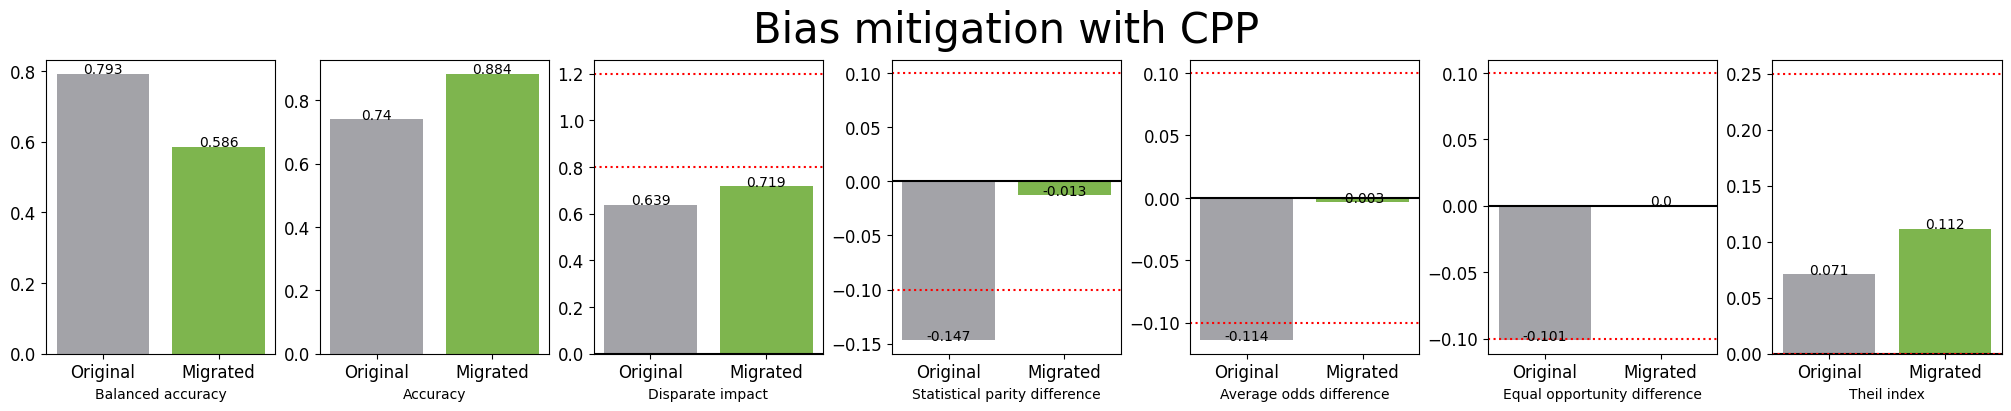

#### For method CPP :

Bias against unprivileged group detected in **1** out of 5 metrics

Balanced accuracy variation **-0.206** 

In [ ]:
barplot_metrics(OR_metrics, CPP_metrics, 'CPP' )

Τέλος αξιολογώντας το μοντέλο με το testing dataset γίνεται φανερό πως η μετρική disparate impact είναι η μονή μετρική που είναι εκτός ορίων, ενώ η balanced accuracy έχει μειωθεί δραματικά κατά 20%

# **Summary**

Παρότι πάνω από τις μισές μεθόδους οδήγησαν στην μείωση της balanced accuracy, εντούτοις φαίνεται πως η accuracy έχει αυξηθεί και μάλιστα κατά πολύ σχεδόν σε όλες τις περιπτώσεις, αφού οι αλγόριθμοι κατηγοροποιούσαν τα δείγματα στην κλάση με τα περισσότερα αντικείμενα.
Επίσης οι μέθοδοι Prejudice Remover (PRE) και Calibrated Equalized Odds Post-processing (CPP) μείωσαν την balanced accuracy κατά πολύ μεγάλο βαθμό ώστε να κυμαίνεται στο 58% και για τις δύο μεθόδους. Το γεγονός αυτό οδήγησε τα μοντέλα στα οποία εφαρμόστηκαν οι μέθοδοι να είναι μη παραγωγικά αφού η ακρίβεια στις προβλέψεις είναι μόλις λίγο καλύτερη σε σχέση με ένα random classifier.


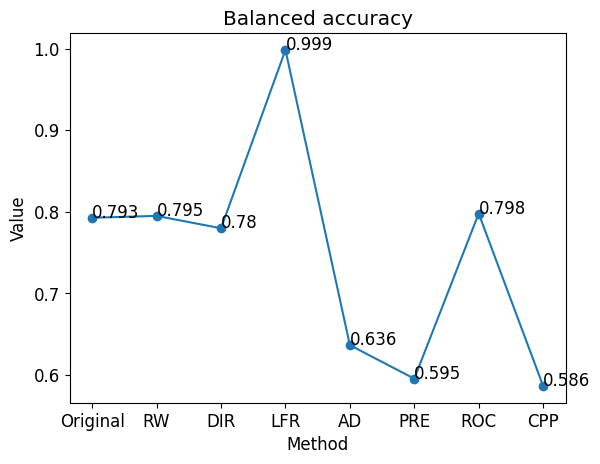

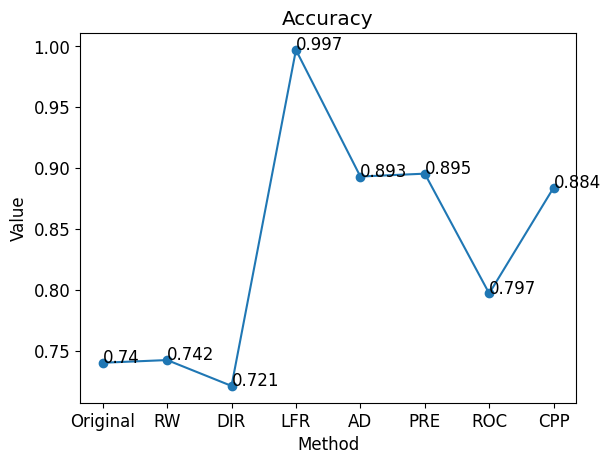

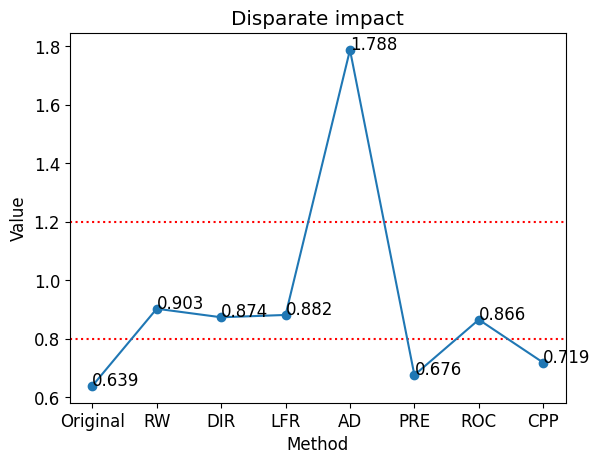

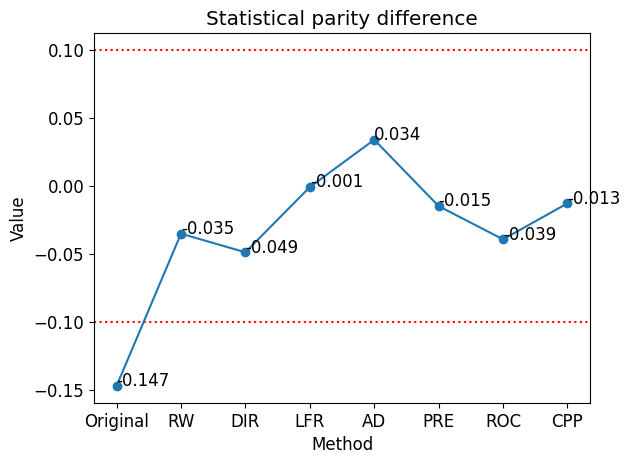

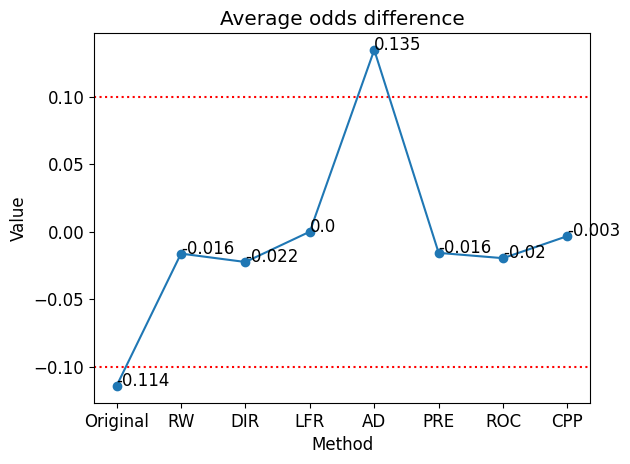

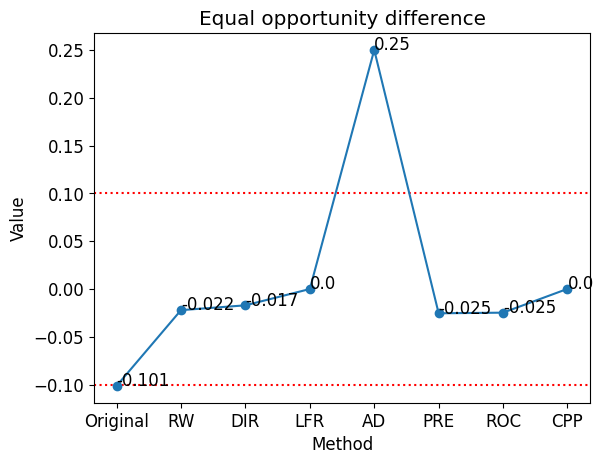

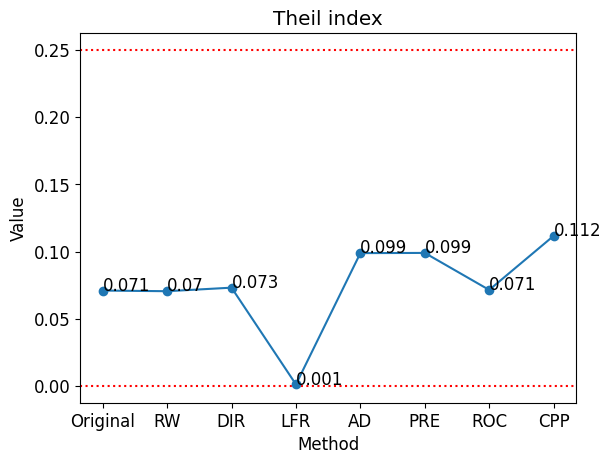

In [ ]:
bounds=[[0.8,1.2],[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0,0.25]]
i=0
for m in metrics:
  y=np.array([OR_METR[i] ,RW_METR[i], DIR_METR[i], LFR_METR[i], AD_METR[i], PRE_METR[i], ROC_METR[i], CPP_METR[i]])
  x=['Original' ,'RW', 'DIR', 'LFR', 'AD', 'PRE', 'ROC', 'CPP']
  for w in np.arange(0, len(x)):
    plt.text(x[w], y[w] , round(y[w], 3), fontsize=12)
  if i > 1:
    plt.axhline(bounds[i-2][0], color='r', linestyle=':')
    plt.axhline(bounds[i-2][1], color='r', linestyle=':')
  plt.plot(x, y, marker='o')
  plt.xlabel("Method")
  plt.ylabel("Value")
  plt.title(m)
  plt.show()
  i=i+1


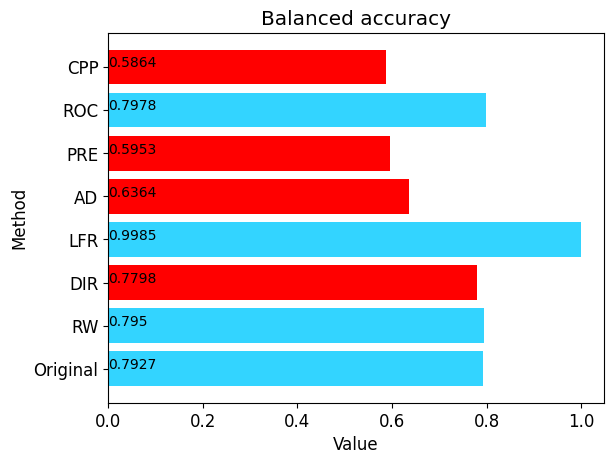

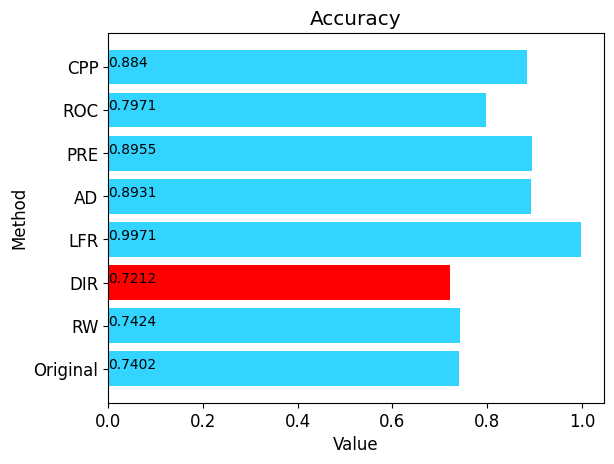

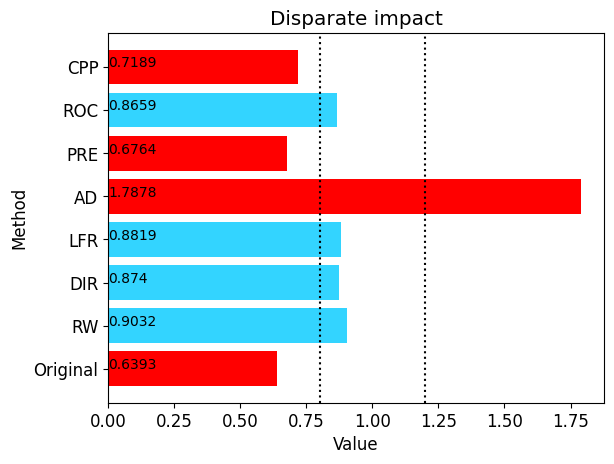

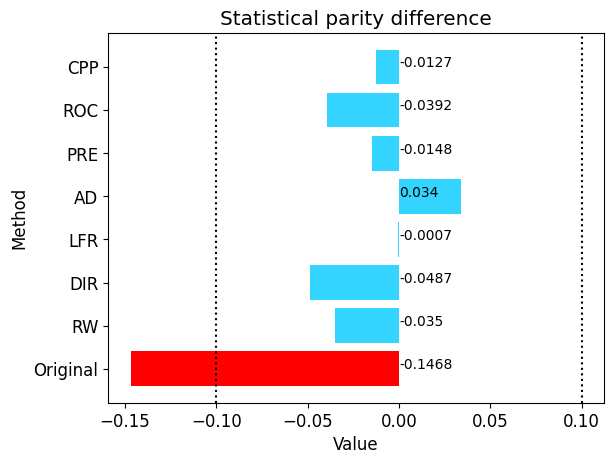

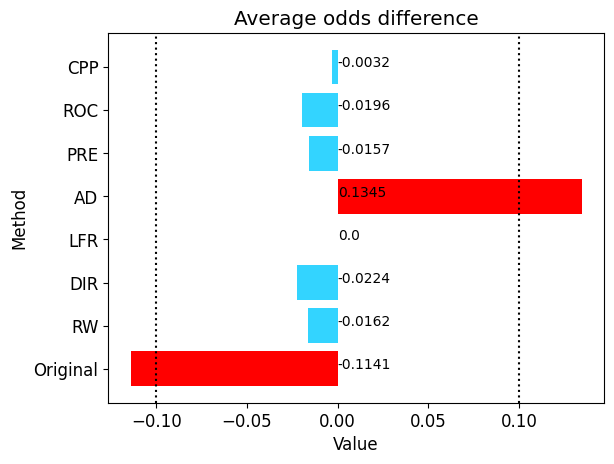

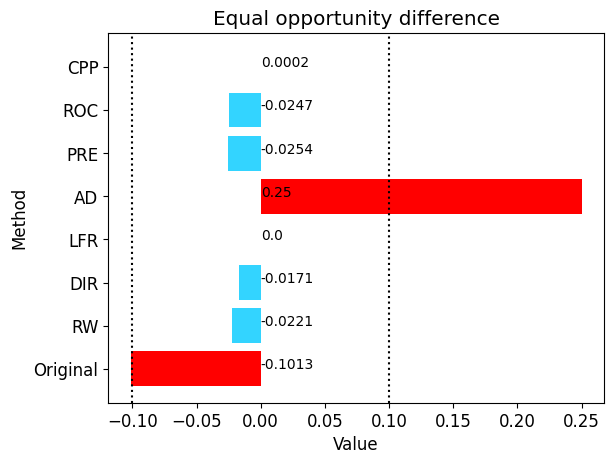

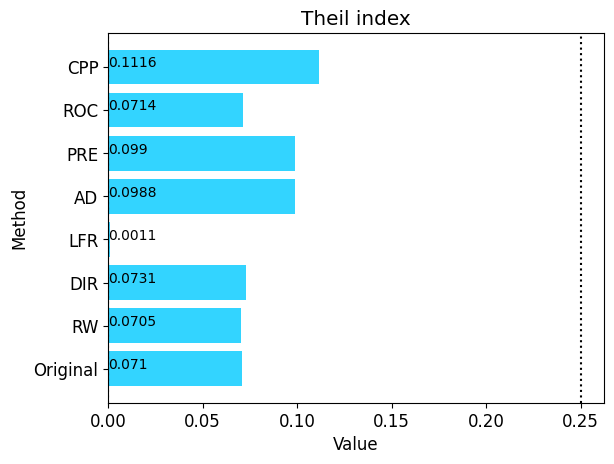

In [ ]:
i=0
for m in metrics:
  bounds=[[0.8,1.2],[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0,0.25]]
  y=['Original' ,'RW', 'DIR', 'LFR', 'AD', 'PRE', 'ROC', 'CPP']
  x=np.array([OR_METR[i] ,RW_METR[i], DIR_METR[i], LFR_METR[i], AD_METR[i], PRE_METR[i], ROC_METR[i], CPP_METR[i]])


  if i > 1:
    color = ['#33D4FF'  if (bounds[i-2][0] < v < bounds[i-2][1]) else 'red' for v in df[m]]
  else:
    color = ['#33D4FF' if ( v >= df[m]['Original']) else 'red' for v in df[m]]


  plt.barh(y, x, color=color)

  # setting label of y-axis
  plt.ylabel("Method")

  for w in range(len(x)):
    plt.text(0, w, round(x[w], 4) , fontsize=10)#, ha = 'center')


  plt.xlabel("Value")
  plt.title(m)
  if i > 1:
    plt.axvline(bounds[i-2][0], color='k', linestyle=':')
    plt.axvline(bounds[i-2][1], color='k', linestyle=':')
  plt.show()
  i=i+1

Αξιολογώντας τα αποτελέσματα των bias metrics διαπιστώνεται πως όλες οι μέθοδοι για την μείωση του bias διατήρησαν την μετρική Theil Index εντός των ορίων . Ακόμη, σύμφωνα με τα αποτελέσματα των μετρικών Average odds difference και Equal opportunity difference, σχεδόν στο σύνολο τους πέτυχαν να μειώσουν το bias και να είναι εντός των ορίων του fairness. Εξαίρεση αποτελεί η μέθοδος Adversarial debiasing όπου αντέστρεψε το bias, αφού οι τιμές τόσο της Average odds difference όσο και της Equal opportunity difference έχουν υπερβεί το επάνω όριο του fairness και κατά συνέπεια μετά την εφαρμογή τους υπάρχει μεροληψία υπέρ του unprivileged group.

Όμως το μεγαλύτερο ενδιαφέρον παρουσιάζεται στις μετρικές Disparate Impact και Statistical parity difference. Ενώ οι δύο μετρικές παρουσιάζουν μεγάλη ομοιότητα στον τρόπο υπολογισμού τους καθώς η πρώτη είναι ο λόγος ενώ η δεύτερη η διαφορά της πιθανότητας του unprivileged group να λάβει ένα θετικό αποτέλεσμα σε σχέση με την πιθανότητα του privileged group να λάβει ένα θετικό αποτέλεσμα, τα αποτελέσματα τους απέχουν αρκετά. Κατά την Disparate impact εντοπίζεται ακόμη bias σε τρία από τα επτά μοντέλα που προέκυψαν μετά την εφαρμογή των διαφόρων μεθόδων, ενώ σύμφωνα με την Statistical parity difference το bias έχει εξαλειφθεί σε όλες τις περιπτώσεις


In [ ]:
OR_METR=np.array(OR_metrics)
RW_METR=np.array(RW_metrics)
DIR_METR=np.array(DIR_metrics)
LFR_METR=np.array(LFR_metrics)
AD_METR=np.array(AD_metrics_aft)
PRE_METR=np.array(PRE_metrics)
ROC_METR=np.array(ROC_metrics)
CPP_METR=np.array(CPP_metrics)


df = pd.DataFrame([OR_METR ,RW_METR, DIR_METR, LFR_METR, AD_METR, PRE_METR, ROC_METR, CPP_METR ],
     index=['Original' ,'RW', 'DIR','LFR',  'AD', 'PRE', 'ROC', 'CPP' ],
     columns = metrics)
df.style.background_gradient(cmap='Blues', )

Με τη βοήθεια του Πίνακα συμπεραίνεται πως οι δύο πιο αποτελεσματικές μέθοδοι για την μείωση του bias είναι η Reweighing (RW) και η Reject Option Classification (ROC) αφού όχι μόνο πέτυχαν να εξαλείψουν το bias σύμφωνα και με τις πέντε μετρικές, αλλά κατάφεραν αυτό να επιτευχθεί χωρίς να μειωθεί η balanced accuracy των μοντέλων.


In [ ]:
runtime_end = time.time()
print(f"Time taken: {(runtime_end-runtime_start)/60:.02f} min")

Time taken: 60.34 min
